In [1]:
from ELIZA3 import analyze
import re
import numpy as np
import pandas
from datascience import *

In [2]:
with open('dialogues_edit.txt', 'r') as f:
    raw = f.read()

In [3]:
pattern = r'\n([A-Z]+\.?\s?(?:[A-Z]|[0-9])*?:|(?:C|T)[0-9]+)'
split_dialogue = re.split(pattern, raw)

In [4]:
sans_tags = split_dialogue[::2]
rogers = sans_tags[::2]
clients = sans_tags[1::2]

In [5]:
client = [" I don't know. I'm really new. So transfer. And I was just wondering if I'm quite ready for a transfer. I mentioned that it's annoying, that woman talk or been yelling like that, but I really rather like that ward. And I had been hoping, I had thought maybe I could go home from there. I know being transferred and I don't feel quite up to that.",
 ' You get kind of oriented to one place.',
 " I meant to correct one thing when I said no before. I didn't mean I was talking to that doctor. I just meant  that I was ready - that I wondered why I couldn't go home.",
 " He thought I was being blunt and I just meant, no. I didn't want to talk to him anymore.",
 ' I thought that he thought I -',
 " Yes. That's what I had thought and that isn't what I meant. I don't know. I'm wondering if that transfer is a good thing. I mean they make you feel so important around here you aren't, but then when I go over to Two, I know that's an open ward. That's dormitory. And I've been wearing not so many of my own clothes, because I don't like to loan them quite ready for that change.",
 " But my father and aunt don't come to visit me or anything. So I don't get out at all on weekends or anything.",
 " That's really it. I'm important, but I'm really not. I probably would be on the other ward if - well I know that you're not very important when you're moved to that ward.",
 ' Even less so.',
 " I think it means working the laundry and I'm not quite ready for that. I mentioned earlier that I had this tickling sensation in my knees when I was on 6C. When I was getting and .And I asked the doctor if at that time if he would move me so I could go to work and work in the laundry. And transfer came today. I didn't ask to be transferred over to them.",
 " I don't know - there isn't much to face. It's kind of confusing I think.",
 " I don't know what I mean. I just know that -",
 " Well I know that there's Anita on that ward that I didn't trust very far because she's the one that put me on shock treatments.",
 ' Well I think she did anyway. And still she put her arm around my shoulder when I came back, but she was the one that told me I had to go on it, and that I had done this, and that I knew of to be put on that kind of treatment.',
 " That's right. Of course she said it was doctor's orders, but I hadn't talked to a doctor that I knew of at the time. And I know that they gave even though that was a work ward, they had them go over to the treatment ward and then back to the work ward, and then to work.",
 " Well I don't trust people anyway any more. That's why I don't want them to trust me. I either believe in them or I don't believe them.",
 " And I don't think I quite believe in her very much.",
 " That's true. I don't trust them. Either believe them or I don't believe, or I'm not quite certain whether I believe them yet or not. But I don't believe in trust anymore.",
 " No. I don't trust them. You can get hurt much too easily by trusting people.",
 " I don't have any trust. That's why I can't let any trust .",
 ' You just get hurt by it.',
 " That's the way I have been hurt.",
 " I don't mind being moved. I mean if it's another thing toward going home, but I don't get out anyway and I don't know that he - my brother - I wrote a letter, but I didn't get any answer from him. He never came.",
 ' Am I quite ready for that.',
 " I don't think I'm going to like working in the laundry. That I know, because I didn't like either the other two times. And I don't think I care too much working in the food center over there either, because I worked there before and I didn't care for it. Well I didn't have anything - The first day I worked or the second day I worked for about a half an hour and I blacked out. I tried it three more days and I blacked out each day. So I just quit trying to work there. It was too much electricity or something.",
 " It did. I blacked out completely. If I hadn't gone and sat down, I would've have fainted.",
 " No. I didn't feel desperate. I just - I didn't understand it. I didn't know why I blacked out.",
 " It did frighten me though. I just couldn't work so I .",
 " Because I don't have epilepsy seizures or anything like that. So I couldn't imagine what it was. I don't - I'm not. I don't usually have fainting spells.",
 " What it was. Yeah. I tried. So I couldn't work and they wanted me to work. So sometimes I think you could be put back on treatment if you refuse to work.",
 ' Well it would appear that way from what everybody says, but I don\'t think I was even - I don\'t know why they even gave it to me in the first place. I was just beginning to come to enough to realize that I was in an institution I think. And the next thing I knew, they said, "You\'re already on treatment". And I said, "Why? I didn\'t do anything. I haven\'t had any fight or anything with anybody." And they said, "Well, doctor\'s orders". And I said, "Well I haven\'t even talked to the doctor", because I hadn\'t talked to one. At least, I didn\'t know if I had.',
 ' I was just beginning to realize I was in the hospital when they put me on it. And they put me to work the same day.',
 " I began talking very badly and everything. I still haven't forgotten some of the things they said.",
 " If I had - it was like it wasn't even me talking.",
 ' Then I went home weekends and I got in trouble there because I talked so much. Of course, I was getting sodium amytal too. So it might hive been the combination of the two, not just the one thing.',
 ' It was a combination I think. As you noticed, I move my feet.',
 " As I said, my knees tickle. I don't know if it's the drugs I'm getting or what, but it's something I can't help. It isn't that I'm so terribly nervous that I can't sit still. That isn't it. I do that at group meetings or anything, and I can't control them. It's rather embarrassing.",
 " I'm not do- Something I can't control.",
 " In my knees and therefore, and my feet just move. If I am sitting up there in the corner alone, that isn't so much, but my knees still tickle. But when I get in a group and that - my - my knee just moved.",
 " Well I have it when I'm alone sometimes too. I think it's medication I'm given.",
 " I think it's the gray medication I'm getting. I don't even know what it is because I haven't asked . I think these meetings are very enlightening.",
 " Well, if she can't think quite clear at this time, you can think about it later.",
 " I think I've been helped a lot by -",
 ' More by talking than I have by the pills .',
 " It seems to alleviate whatever the situation is. If it's created a situation that seems to alleviate (screaming in background) - I wish that woman would quit screaming.",
 " She can't stop. that's the worst of it. That gives you a terrible feeling, what's going to happen to you if you end up like that.",
 " Yes. Exactly. You think you could just about go out of your head just from hearing that all the time. That's been going on for three days now and why did they give her that much? If it's who I think it is, she was up on the ward for one of those GYN clinics and I sat next to her and she said something about liking to talk. An all of a sudden she just - she just began talking and didn't quit.",
 " She was perfectly all right, then calm. She wasn't or anything.",
 ' I should think - I thought they could relieve those, not make them worse.',
 " Yes. Considering it's an admission ward and they shouldn't be that far out of their heads. It's more like the drugs they're giving are doing it to them.",
 " That's right.",
 ' I think it is.',
 " Because after all, I'm getting drugs too and I wouldn't want to end up like that.",
 " That's right. And then once you're that way, what can you do about it. Only, only I know what they're like and I can see it. So I have enough control to hang onto myself not to keep from just batting my head against the wall like you - some of them have that feeling and they just can't control it. They - but I've seen so much, but it hurts so much of it, that I can't hang onto myself a little bit.",
 " I think that's why - pardon me. I think that's why my knees tingle all because rather than batting my head against the wall, I have that type of reaction.",
 ' It comes out . the tickle is terrible.',
 " Because, well I've seen my. So I mean I know that it's just futile to bat your head. Anyway I think my head is too valuable to bat against the wall. It's my own head and I like it.",
 " That's right. After all, God gave me that head. That's the head I want. I'm not going to bang it against the wall even if I like to, which I really wouldn't like to do anyway. How does that help that girl to be locked up like that and screaming like that? I mean what beneficial aid is she getting out of that?",
 ' Anything?',
 " No. I'm asking you.",
 " I don't know. I'm all mixed up. I want to go to building 1, but still, I know building 1 is not home, but if I can go home tomorrow, I'd say yes. I've been there before. I know it's going to be a great change from this building. I hate to leave this building because it's quite beautiful. But still maybe its better than listening to that girl screaming all day or everyday.",
 " But I hate to think that I'm going to have to go to work in the laundry all week. I'd rather - and there isn't as much to do around that ward as there is here. That much I know.",
 " Like people laugh in their sleep because you do have, but I don't think they do. I think they expect you to work if you come. They don't go that far as to just let you rest like you're in a hospital for a rest. Keep you working all the time.",
 " I don't think I'm ready for it. Because my knees tickle. Maybe that - I worked in the laundry before and I know. I got a long all right. I know I can get along now, but -",
 ' But why?',
 ' Well I packed my own I\'m more ready to go. I didn\'t say "No. I won\'t go", because I\'m always putting up a big fight about it. If it\'s an improvement, well I\'m willing to go along with it.',
 " I'd rather like to feel than admit it, although I can't say that I like to see them get worse. But when they improve, it's quite a joy to be where they're all coming in and going out.",
 ' I know that others get well',
 " I had thought - I had thought that I'd go home from here because I haven't done anything very serious or I hadn't had any violent struggle with anybody or anybody, anything like that.",
 " I haven't broken any I don't think.",
 " And you have to find - find out what the rules are because they don't tell you.",
 " But I haven't been too good though. can go over board about being good too. I don't believe in that either. I've been as good as I know how to be and I'm not letter perfect. I would like to be, but I'm not.",
 " Good. It's good how.",
 " Thank you very much. I know that you're very important people. That's what I've heard anyhow.",
 ' Thank you.',
 " This guy that you went to town with really told you that you were no good. Is that what you're saying? Did I get that right?",
 " And I guess the meaning of that, if I get it right, is that here's somebody that meant something to you. And what does he think of you? Why he's told you that he thinks you're no good at all. And that just really knocks the props up from and just brings the tears.",
 " You tell yourself you don't care at all. But somehow, I guess some part of you cares because some part of you weeps over it. I guess some part of you just feels here I am hit with another blow. As if I hadn't had enough blows like this during my life when I feel that people don't like me, here's someone I've begun to feel attached to. And now, he doesn't like me. And I'll say I don't care. I won't let it make any difference to me. But just the same, the tears run down my cheeks. ",
 " If I'm getting that right, it is that what makes it hurt worst of all is that when he tells you you're no good, well shucks, that's what you've always felt about yourself. Is that the meaning of what you're saying?",
 " Okay. And if things get bad to which you just feel real down, you have them call me. Because that's what I'm here for is to try to be of some help when you need it. And if you need it you have them call me.",
 " You feel as though you're beyond help. feel just completely hopeless about yourself. And I can understand that. I don't feel hopeless but I can realize that you do. Just feel as though nobody could help you and you're really beyond help. I guess you just feel so down. It's just awful. I just have one other thing and then I'm going to be busy here this afternoon till 4:00 p.m. maybe a little after. But if you should want to see me again this afternoon, drop around about 4:00 p.m.",
 " Okay? Otherwise I'll see you Friday noon unless I get a call from you. You could, if you're kind of concerned for fear anybody would see that you've been weeping a little, you can go out and sit for a while where you waited for me sit down in the waiting room there and read magazines it's okay. I guess you really hate to go.",
 " You don't want to go back to work. I brought a few magazines you can take with you if you want. I didn't hear from you since this time. Were you able to go to town that day?",
 " I don't know what but I realize it somehow makes me feel good that today you don't have your hand up to your face so that I can somehow kind of see you more. I was wondering why I felt as though you were a little more here than you are sometimes. And I realized well it's because you - I don't feel as though you're hiding behind your hand or something. And I think I sense, though I could be mistaken, I think I do sense that today just like some other days, when you come in here, it's just as though you let yourself sink down into feelings that run very deep in you. Sometimes they're very bad feelings like last time and sometimes probably they're not so bad. But I just kind of I think I understand that somehow when you come in here, it's as though you do let yourself down into those feelings. Now -",
 ' Hmm?',
 " You're going to take off. And really, run away from here? Is that what you mean? There must be some - what's the background of that? Can you tell me? Or I guess what I mean more accurately is, I know you don't like the place but it must be that something special came up recently.",
 " Um—hum. Okay. Um—hum. It isn't even that you want to get away from here to something. You're just willing to leave here and go away and die in a corner. I guess as I let that soak in, I really do sense how how deep that feeling sounds that you ... I guess that imagine that comes to my mind is sort of a wounded animal that wants to crawl away and die. It sounds as though that's kind of the way you feel that you just want to get away from here and vanish - perish and not exist.",
 " I think I got all of that but for a couple of days now; you just wished you could be dead. And you even prayed for that. I guess that the one way this strikes me is that to live is such an awful thing to you that you just wish you could die. And not live. It's that you've just been wishing and wishing that you were not living. You wish that life would pass away from you.",
 " Um—hum. Um—hum. As you wished for lots of things but boy, it seems as though this wish to not live is deeper and stronger than anything you've ever wished before. I can't help but wonder really it's still true that some things that's friends said to you are those still part of the thing that makes you feel so awful?",
 " The way I'm understanding that is that in a general way, the fact that he felt you were no good has just set off a whole flood of feeling in you which makes you really wish, wish, wish you weren't alive. Is that somewhere near it?",
 " Um—hum. Um—hum. You feel I'm not any good to another living person. So, why should I go on living? And I guess a part of that is that, here I'm kind of guessing and you can set me straight. I guess a part of that is you felt I tried to be good for something as far as he was concerned. I really tried. And now, if I'm no good to him - if he feels I'm no good then that sure proves that I'm just no good to anybody. Is that anywhere near it?",
 " Yeah. I see. But you feel if you go away what others several others have said then then you are no good. No good to anybody. I don't know whether this will help or not. But, I would just like to say that I think I can understand pretty well what it's like to feel that you're just no damn good to anybody because there was a time when I felt that way about myself. And I know it can be really rough. I see we've only got a few more minutes left. Should we make it next Tuesday at 11:00 a.m. the usual time? If you gave me any answer on that, I really didn't get it. Do you want to see me next Tuesday at 11:00 a.m.? ",
 " You just don't know. Right at this point, you just don't know whether you want to say yes to that or not. I guess you just feel so down and so awful that you just don't know whether you can see that far ahead. I'm going to give you that appointment at that time because I'd sure like to see you then. Another thing I would say is that if things continue to stay so rough for you, don't hesitate to have them call me. And if you should decide to take off, I would very much appreciate it if you would have them call me and so I could see you first. I wouldn't try to dissuade you; I'd just want to see you.",
 " You just feel that your mind is made up and that you're going to leave. You're not going to anywhere. You're just just going to leave.",
 ' Um—hum.',
 " Um—hum. That's why you wanted to because you really don't care about yourself. You just don't care what happens. And I guess I'd just like to say I care about you. And I care what happens.",
 ' I wish I could die. I wish I could die.',
 ' Yeah. ',
 ' Yeah.',
 " You don't have a cigarette, do you? ",
 ' Got matches.',
 ' The last time I talked about, the last time my feeling of "should" about having to sort of be responsible for this and yet feeling demands that I was unable to respond to and didn\'t want to respond to it. So it made sense this week, you now, "Why should I? This is the place where I do have limits and should have them."',
 " And uh, and be much better for me to recognize them and just ask them and not feel hostile about not being clear what my limits are on setting them straight. I think it's uh, have new meaning.",
 " Mm-h And I think that really touches a, a wide area in my life. I think it's been very hard for me to, to set limits and to feel that I have the right to have them, I guess.",
 " And so they've been way out someplace without my being able to call them for help sometimes.",
 ' Mm-hmm.',
 " Mm-h And thinking back I can not think of specific instances but I can certainly recall many times, I mean, as a total when I have, uh, felt I should do something. Felt called upon to volunteer thought I had to be the one to be responsible for it and then would have such a whole lot of things build up that finally I'd just feel overwhelmed by having so much to do. And now I feel very annoyed about the whole thing and resentful. And really, there's nobody to be mad at except me.",
 " And at first it's whole lot of in a way, I mean it seems like being willing to do things and being a nice person really it's being very, um, very self-opinionated, I think, to think that one can do all of that.",
 ' That I could do all of that.',
 ' So I, to think one has no limits.',
 " So I think it's going to be sort of a real relief to feel I don't have to be the kind of person who can do everything that everybody wants. Or everything that I want even but just sort of consider things and try to to really know what my limits are and what I can do and what's too much.",
 ' Mm-h',
 " And I guess it may take some practice, I don't know. I may become aware of these things although I think I am because I feel so. But I think what will happen is that it will hit me in the face. I mean this is a place where I do need to set them.",
 " Well I hope it will be that way. I'm not really; I guess I'm not really quite sure that's how it will happen. I'd sort of like it to be that way so that I know at the time rather than to make a, feel like it's trailing along behind and I sort of start to respond and then have to change my mind afterwards.",
 ' Mm-h',
 " Yes. I guess what I'm hoping is that will be the case so that I don't get involved. And I have been aware of my, not so much right now but, not too long ago in terms of maybe last year. I'm sort of aware of myself as this person who does have at times quite a bit of hostility.",
 " It would come out if I were very tired or something my defenses were low. And I'd sort of like to get to the bottom of that and I'm sure this is one thing and just talk about it.",
 " Uh, huh. I've been aware a little bit recently that uh, in a way I thought it might be. I sort of feel hostile to, towards women as they are in groups. I mean I get so tired of the feminine club where there's nothing but women and they have a business meeting. I feel so out of patience with this whole, I really don't know. The way they go about things. I find myself really enjoying a mixed group where there are men in the group much more.",
 ' And I\'m just wondering what that means because in the traditional sense of getting along with mother, I always have. I mean we seem to be much alike and we always had a good friendly relationship so that I can\'t seem to connect with anything of that.\nBut last Wednesday, for example, it came to my attention that I had to have an X-ray and I was in a room with other women who were waiting. And I had taken in some studying to do and I thought I could spend my time that way. And they were almost hysterical, I mean I was nervous. I was scared to death, they were sort of letting off steam in such a way that it was making me feel far worse. And I thought, "These females, what\'s the matter with them?" I thought if this were a group of men sitting together how much more comfortable it would be. They would be sort of more reassurance with them. It\'s just a way of functioning that isn\'t so hysterical I guess.',
 ' Mm-h',
 ' And yet on the other hand, I, on the other hand I do have good friends that I like a lot.',
 " But when I don't know them as I didn't with this group lots of noise I think they function as inefficient, scatterbrained women.",
 " Mm-h And in a way it's, I think it's sort of a relief to find that, that really I do enjoy men's company quite a bit and like it. So I'm able to see well I really do and I think that that's - I'm sort of pleased to sort of recognize that and be able to say it.\nBut on the other hand I'm a little bit, I don't like that I feel so impatient about women too. Well, I don't know I think that women's clubs really I don't think I do well have much to do with them.",
 " Uh, huh. I don't really know where to go from there. Because I can see that I do enjoy friends. I like to do things with them and yet I have this impatience in me too.",
 " Kindly just stay away from women in general. Don't get involved with women's organizations. It's that simple. But it seems like it would be something that I could explain. When did it start or whether that's important or not.",
 " Maybe as I think of this I think of my, when I was a very little girl when my grandmother used to live with our family. And I guess she was a regular mother-in-law of the worst kind. She was my father's mother. And I was very much aware from as early as I can remember, of the very poor relationship that existed between my mother and her. And, uh, my mother took the raw end of something and I was very much concerned about her. And, in fact, when I think of my childhood I think of being so worried about her because she didn't seem to be able to cope with the situation really. And sometimes I feel I never was really young because I was so worried. I mean sort of a-",
 ' I suppose the other kids were worried too but it was sort of a feeling of being older than my mother somehow or other.',
 " Because I was so sorry for her that she wasn't able to be happy and sort of cope with this old lady who was just sort of a dominating tyrant who was just nasty. And at the same time that I was angry with my grandmother for what she was doing to my mother, I was sorry for her too. There were all sorts of mixed up emotions, really too much for a child.",
 " Uh, huh. I'm thinking that maybe there may be a feeling of resentment that I may have had without my knowing. Somehow they couldn't work this thing out in some way. I mean why did my mother have to put up with it?",
 ' If she had said, "Well, let\'s..." maybe it wouldn\'t have happened.',
 ' Mm-h',
 " could be. And that may have, I don't know, may have given me a lack of belief in adults and because it seemed to be such a mess and it resulted in such awful experiences for me. Because sometimes the sort of undercurrent fights between them would spill over. My father would get into it and then he would lose his temper. That was his way of handling it. That was just ghastly. I would think he would leave and go away and then everything would sort of fall to pieces.",
 ' I guess it was sort of, I hadn\'t thought of that before. Because when I think of those times when he got into this real fury and anger, I had a feeling that he might - because I remember once he, I guess he had his slippers on. And he took his slippers off and put his shoes on; I thought he said he was leaving. And I thought, "Oh that was just the worst thing that could happen."',
 " And I think that in all of this feeling I've had about my father, that really I did very much want a good relationship with him. And I think that's the part of my upset that I wanted so much to have him care for me and I didn't seem to get what I really wanted.",
 " And yet keep on trying even, I guess even today in certain things. Because then when I, it used to be when I'd go on vacation and I'd find myself wanting to buy him a present first of all and send it. As though well my mother would understand it but that somehow I had to do something special for him. I'd keep on trying and trying. ",
 " Uh huh. And yet in a certain way, see I realize that he does. I mean he would say it but it just haven't get to me somehow that there's real caring. I mean it's words service, lip service. Or a caring that's, wants too much to hang on sort of control completely that's a frightening thing for me.",
 ' Uh, huh. Demands that I just feel too sort of tired to be able to come up to and so I respond to it by, "It\'s just too much."',
 " Because once I meet one then there's another and another and another. And I never really meet them. I mean it's sort of an endless demand.",
 " Uh huh. Knowing the kind of mother that he had, it's probably, oh I think it's possible that he was just trying to find a mother and never found one because his way of being a husband was to demand an awful lot from my mother in terms of just pure service. And that's another thing that makes me mad about her and was that she did it. At the final I think she just destroyed herself almost and physically just worn out by all that.",
 " And there again if she had set limits he would probably have accepted them. But she just didn't.",
 ' Uh, huh.',
 ' So in a sense you feel, "Here I am following in the same kind of pattern that she set."',
 " And really not wanting to be that kind of person myself and feeling that it's not a good way to be. And yet I think I've had some accountable efforts of the way you have to be in you intend to be thought a lot of and loved that kind of feeling too.",
 ' And so much of the time I\'d just feel, "Oh if she\'d only sit down and be with us a little bit." So, be a mother in the family group instead of always doing things. And, uh, it was only later when I was an adult that she started to do this as she got older, I think. And I feel that if she had done it when I was younger it would have meant so much because I didn\'t want her to be doing things all the time. She thought that was being a mother but really if she\'d just been there a little more.',
 ' Uh, huh. I was thinking the other night I was feeling really blue about the way I felt and I thought, "Well, maybe I wish I had my mother here in the way that she was." Because she used to be sort of reassuring when I was ill, she would do little things, make some little dish like custard or something. It was sort of reassuring to sort of have her around because I know that she wasn\'t able to be that way at all. I don\'t know what that all means. For a minute I thought, "Well, I really miss her. I sort of need a mother at this point and yet it\'s sort of impossible."',
 ' Uh, huh. And yet at the same time I felt, "Well, a little later, well maybe that wasn\'t what I needed. Maybe it was the more adult sort of companionship in some way rather than a mother." But I needed something, somebody.',
 ' And then in another sense I felt, "Well, maybe it\'s just something I have to go through alone."',
 " The thing that sort of has thrown me this week is that I feel better about this physical condition I talked of last week. And I have sort of made friends with my doctors. It makes me feel a little better in some ways not just quietly fighting without saying anything. And I think that I have more confidence. I know I read some, I read an article about this and it's very hard to diagnose so I don't hold that against anybody. But he feels that he has to be sure so he sort of himself and getting X-rays. I'm frightened because I kind of feel that they're having to be sure that it isn't cancer. And that really, really frightens me terribly.",
 " And uh, I think its when I let that thought come in, maybe it is and what if it is. That's when my thoughts are of dreadfully alone.",
 " It's really a frightening kind of loneliness because I don't know who could be with you at a time like this.",
 ' I don\'t know what it would feel like. I mean if there were somebody around so that I did feel I had someone to lean on in a sense. I don\'t know if it would make me feel better or not. I was trying to think, "Well if it\'s something that you just have to grown within yourself to sort of stand." Even just the thought of it, I mean, it will take two weeks I suppose before they know. Would it help if somebody else was around? Or is it just something that you just have to really be intensely alone in? Well, I just felt that way this week so dreadfully, dreadfully all by myself.',
 " I guess basically they're be a part of it you would have to do alone. I mean you just couldn't maybe take it even and pass along some of the feelings. And yet it would be sort of a comfort, I guess. I like to be alone. ",
 ' I guess I just have.',
 " And I think it is a comfort. And I guess the feeling that I have now as well. I'm probably looking at the very blackest part of it and maybe there's no real need to bother, you know? It may just take time to reassure me. I mean all of this may sort of be unimportant.",
 " Although I shan't forget, I'm sure.",
 " It's very. But it's sort of hard to be optimistic about it. I'm usually able to see the bright things but this is something that's thrown me, I guess.",
 ' Mm-h',
 ' I supposed it all has something to do with thoughts about death, I don\'t know, lots of implications to explore if I got down to it. Because there have been times when I\'ve thought, "Well, if I were to feel, keep on feeling the way I\'ve been feeling the last week forever, I really wouldn\'t want to stay long. There\'s that side to it also, a real not wanting to face death at this point, you know.',
 " But I suppose if I'm really ill it wouldn't be the worse thing.\nThe worse thing I guess would be the pain. I have a low tolerance for pain.",
 " I don't want to think of either one really. Not now anyway. Well I finding it very hard to get down to business these days. There are things that I'm supposed to do. I'm just worried, I guess. It's not so bad, the pain isn't there. If I can forget I can seem to get along. When it's there I'm just continually reminded of it and that's so frightening and really is uncomfortable.",
 ' Well, did I tell you anything about the nature of...',
 ' Well I went up to his house. I sort of hesitate to go into it. But the fact remains that it is homosexuality. And I want to change.',
 ' So I talked with Art about it about a year ago last summer. And we had a rather long interview and he just said that I should see someone but not him because the relationship is too close.',
 " So of course this is the first I've gotten down to business with it. And I've been thinking about it ever since. And I am confused mentally. I go around in circles. I don't know where to start. ",
 " And I have looked backwards just trying to find if I could find the cause if that would help any. It doesn't seem to and I don't think I could find it if I wanted to. And about the only thing I've figured out was that the important thing is to find out where I stand now and start from where I am now rather than psychoanalytically or something, go back in the past and try to dig up. I don't know.",
 " Yes, but I don't know where to start. I don't know how.",
 ' Yeah, sort of, yes. And to start from where I am now rather than to....',
 " To go back and try and find the cause of something and then, you can't go back in the past and eradicate the cause and try and up with a path solution choice. Of course that is what I always want. That is what I suppose everybody wants. An immediate solution or something, but I don't think it is going to be like that.",
 ' No.',
 " Well I looked for it in music and it was the same thing. I think it is sort of a carry over. I thought there a key to how to be a good musician. There is no key of course. You can't read it in a book. There is no..",
 ' That there is an immediate solution there. There is something that is going to make this thing all clear up.',
 ' No, it is ridiculous. And also I feel that all sorts of things are tied up. I mean one thing I found out when I went to Art was that shortly after that interview, which was sort of a catharsis, I gained ten pounds in two weeks. Which gave me something to think about anyway from the standpoint that probably the problems I have in thinking and music and anything else is all tied up. I mean everything is tied up very closely, problems with health or something like that, I don\'t know. But there is, I would say that, well when Art said something about he felt it had crept into my music from the standpoint that I was making mistakes where mistakes shouldn\'t be made. He says, "There is no reason for you to do these things." And I do them still. He says it is a form of self punishment. Well, I don\'t know. And too there is this, I think the thing is in the form of a neurosis. I want, I am afraid to go ahead. I have always been afraid of new things.',
 " To go into something entirely new, it carries over a little bit in music. I am sort of afraid to take up a new piece. I am sort of, I am afraid when in college, well further back than that actually. From high school going into college I was afraid rather afraid to go into the new situation and make all the new adjustments that had to be made. It wasn't so much coming to a school down here though.",
 " It has been for a long time, I don't know.",
 " Meeting new people, it sort of carries... So you have, well that was the idea. I'm going to have to give myself something. I am confused mentally. I mean I can't think straight. So I also understand that I am the one that has to solve the problem and not you but I sort of want you to do it for me or something, I don't know.",
 " Yeah, that is very close to it. It is amazing though. After thinking about this thing for a year and a half I have come up with nothing that remotely resembles an insight into it. I mean I just don't, as I said before it has just been going around in circles. I don't have a very clear perception or something.",
 " Yeah, that is exactly it. I just don't know how one goes about changing that sort of thing.",
 " Yes. Yeah well it, I go on dates all the time. Not all the time, but occasionally, because I can be attracted to women. And yet, I don't know that it, it just doesn't seem to be the real thing. I mean there is no real attraction. It is sort of forced. So the solution isn't just to go out all the time. It is some sort of mental attitude or something. I don't know. Or a neurosis, maybe. I'm just unwilling to change my subconscious. But it is something that I am willing to change. I don't know.",
 " Which I have to do anyway because society demands it. Which brings another point. It is one of the big reasons for wanting to change is simply society's attitude toward the whole thing. It is an impossible situation. For some people they like to defy convention and that's all right for them. But for me it is not. Because well, it is just such a social stigma attached to the whole thing. You get sort of tired of that.",
 " That is one of them. And another reason is simply that I don't think it is a rewarding, or it just is not a very happy relationship. Based on what I've, you know that it isn't. And also I look at when I get older, the picture changes. I mean when you are young it is one thing. When you are old, it is horrible. The fortyish and fiftyish men you see on the streets, it is just horrible. And I don't want to be like that. 0:10:28.0",
 ' It will be even less so later.',
 " And from what I see of the, of course I had an entirely different perspective on the ordinary heterosexual relationships in my age group. And from what I see of them they are satisfactory. Although there is an awful lot of nonsense that goes on there that I think is sort of stupid. But that has the approval of society for one thing. And still it seems to be workable. I mean more workable, more satisfying relationship all the way through. Of course there is the physiological element which is simply, who was it Jeed tried to justify it but it just can't be justified. But that is outside the realm of my experience so I don't know. ",
 " Yeah. It is a very loaded, just to use the word, it is a very loaded word. Because when you say that you are queer it automatically sets you apart. You lose your individuality immediately. You become one of a horrible group. They say they are abnormal people but they are really not. They are but they aren't. They are perfectly ordinary in every other respect. Although their sexual outlook of course colors their outlook in everything else and that would differ from other normal people. ",
 " That is why I don't like to use the word because you lose your name, you lose everything. I mean it is not something...",
 " Yeah. Puts you in a class that is not accepted. But I have, I myself have not been put in that category ever because I've always been acting a part. I've never had any homosexual associates really. But yet when you hear people talking you always make the connection mentally. Of course they don't know they are talking about you. Maybe it is me that puts myself in the class alone. I don't know.",
 " The only reason they don't is because they don't know. But they would. Except for a very rare few of them.",
 " That is what, you know, with a lot of them. Certainly with the family it is true. With a lot of my friends it is true. With some of them it isn't true at all. Well, I don't know where to do on. I go in cycles of upturns when I am more attracted to women. Sometimes almost entirely heterosexual in outlook. That happened at the school where I was before I came down here, for a while, for a short while. But then I always sort of lapse back into it. I don't know why. Maybe it is a retreat or something, I don't know. Or an escape, I don't know. 0:15:50.0",
 ' Or this is just too much. Why do I bother? That sort of thing hits me when walking down the street or something. I just give up.',
 ' Yeah, what is the use? And then I, it is mostly entirely mental. It has nothing to do with relationships or anything. It is just sort of a, but of course to all my, to two last people they said, "Well that is absolute nonsense. You are not homosexual. You don\'t act it. You don\'t go around with men. You are not." But it is the mental attitude. I mean, it is ridiculous. 0:16:55.8',
 ' Yeah. I would say it is, for those people that can see, it is evidenced outwardly by a certain lack of sincerity maybe or something. It is just, as I say it is an act. And it gets to be an act which I put on for society and it gets to be a drag because it takes a lot of energy. I mean you have to be...',
 ' You think of, you always have to be thinking about not what you would ordinarily do, what you would naturally do but what is the accepted thing to do and you have to do that.',
 ' Yeah. Whereas motivation is one thing and on the other hand is the purely insincere actions. I have no real basis of my personality or something, I mean there is nothing.',
 " Yeah, another direction. Sometimes they come together and sometimes they go further and further apart. When they go further apart I think I stop dating and, hmm I never thought of that. I have all sorts of devices for escaping. I go to movies. I read books. I do all sorts of things that are, hmm, yeah. I had a like despair shortly after I came down here to school because I went back in my old routine of, well I was constantly seeking some sort of entertainment. Or some sort of, something to get away from myself, I guess, or something. I don't know. Although I don't like really like to use that. 0:19:28.1",
 " Yes. I joined a fraternity down here. Which was all right for the first while. But they insist that you fall in the mold. And you have to go to parties every weekend. You always have to have a date. And I don't always feel like having a date. So the upshot of that was all I told everybody that I got out of the fraternity for other reasons, that was the actual reason I left. Because I simply didn't feel like playing the game all the time. And that is what you have to do.",
 " Indefinitely. I can't do it all the time. I don't think I could. As an act. I suppose wasting time comes into it somehow. I worry about wasting all that time. When I should be practicing I'm doing something else. I'm going to a movie. I'm doing almost anything to waste time. I wonder why that is.",
 ' I feel more compelled to waste time than I do to practice. Even though I like to practice very much. And then I think about, "Oh my gosh. Look at the amount of time that slipped by." I start getting either depressed or angry or something. 0:21:31.7',
 " Yeah, I get quite mad at myself. And then I don't remember what happens but I turn over a new leaf for about one day or something like that. And then I start wasting time again. Although I always manage to pull through school because school isn't anything much. My great battle is my piano. That is the thing I have to keep at all the time. And that is, I don't know. I've gotten further and further away from it. I mean putting in the time I should. I suppose that also, I don't see how, maybe I associate playing the piano with something. But I waste time when I'm sitting there practicing. I mean I putz, I improvise, I do almost anything but what I should be doing. Why is that? I somehow feel the two are tied together. I don't know. ",
 ' Not in the playing, in the practicing.',
 " Because the playing is a different thing. Once I get something under my fingers so that I can play it, it becomes a sort of a staple thing. And it has become part of the past which I don't mind going back to. It is the new things that I am almost afraid of. Not afraid of tackling but I want to get out doing. Maybe that is how it ties in. I get a new piece. I putz around it until I more or less can play it. And then I really can work on it because it has become so much easier. 0:23:28.9",
 ' Um hmm. I wonder if it is tied in with the idea of changing and being afraid. Or being sort of, not knowing how or something. How do I ever get under those circumstances. It is quite important because it takes me a much longer time than it takes other people to do it, do a thing. Once I get it done though I can do it quite well.',
 " And then I have great moods of depression. I don't know. I haven't had any since I've come down here. At least not one or something. But I have tremendously depressed moods. I think those are when I just lose, I've been going around in circles for a long, long time or something. And I just don't have any clear vision at all. Maybe I get depressed about that, I don't know. 0:25:07.0",
 " Um hmm. Yeah it is tied in with, though when I was in high school I was able to think quite clearly. Fortunately I can still remember the experience. And now when I can't about anything, school. Reading a book is more or less a matter of just reading the words and letting it soak in. It is not read from very much of a critical approach. I don't think the way I used to. And that bothers me too. 0:25:56.1",
 ' Yeah that is it exactly. And consequently I feel that I bungle every day things because I am not able to think. If I had thought clearly I would have come up with it.',
 " Not as well as I could do them. I forget some of the things that I wanted to bring up. Because I am not in an especially disturbed state right now. I have been going on fairly well. But occasionally I have things where I get a rush of ideas that I want to talk with somebody about. I can't remember some of them. I had a great deal of trouble with my family this year at home. And but, it is funny when I am out of a situation, not bothered by it any more I almost forget what it was that was causing the difficulty in the first place. 0:27:50.5",
 " I was always in a state over something. Just in a state about something or other at home and now I can't remember what they were about.",
 " Well when I get into a depressed mode it is the same thing. When I get out of it I can't remember what I was depressed over. But sure as shooting I will be in another one in a week or so. Maybe I like them. I don't know.",
 " Maybe I don't know. It might be that that is an escape too. I just give up trying to think about it and I just get in a mood or something. I don't know really. I've never thought about them too carefully when I am in them. I don't know what constitutes one of my depressions but just... I've noticed it before though that as soon as they are over I can't remember what they were about.",
 " Recollection. Or else I can remember the thing that caused it but I can't remember it in the same frame of mind I was in then. And when I am out of them they feel really ridiculous, very silly, trivial things. But they get magnified when I go into a depression. And that is all I think about or something. 0:29:45.0",
 ' Quite so.',
 " Yeah. And I can't entirely discount them because as I say, they will happen again. They usually happen later on. It must be some sort of a mental attitude. A way of, a mental approach caused by something. I don't know. Where I will just pick on any incidents as an excuse the send me into a depression or something. I don't know. 0:30:35.9",
 " I'll find something to be depressed about. Maybe that is true. I don't know. Seems like this is miles away from the subject but it still, as I said I think they are probably all related so I might just as well present the whole picture.",
 " Yeah, I am all one person as far as I know. At least physically. Sometimes I feel like several different people mentally, but. And I wonder about this idea of clear thinking. Whether that is just a mental laziness or whether it is also tied in with all my problems. And whether if I get out of this will I be able to think clearly when I am just all muddled because of one central problem or whether I'm using it as an excuse to be mentally lazy or something. I don't know.",
 " They are related and yet maybe I just try to let myself get away with a lot because I am in sort of a difficult situation. Maybe I'm feeling sorry for myself. I don't know.",
 " Yeah. And yet I don't really feel that. When I'm reading a book I want to, I want to get as much out of it as I can. I want to read it critically. And when I'm reading it I'm thinking about wanting to do it and yet I still don't do it. Maybe I just don't know how. It might be a lack of method or something. I thought of that and I told my piano teacher. And she told me to read Plato. So I'm reading Plato. But the fact that I am not reading very critically means that I am not going to get much out of Plato as far as method goes. Because you have to be pretty sharp. I don't think it is all a method problem. I think there is an awful lot of laziness involved.",
 " No. Well, deficient in the sense that I'm lazy, yes. I can only think of that one word to describe an awful lot of things that I do. And I of course rationalize them right after I do them. The fact that I didn't get up this morning in time to make class or something. I rationalize it. Well, I was up late last night. Or I had a bad week or something. And then shortly after I tell myself, no that is not true. It is just because you are so damn lazy you won't get up or something.",
 " Yeah. Evidenced by the amount of time I can spend sleeping. I mean I can, well I can sleep very easily all day. More or less doze and daydream all day. And not have a thought in the least. Many is the time that I have spent until about one or two o'clock Saturday morning sleeping. After going to bed something like twelve or one the night before. And when I wake up I get very angry that I have wasted all this time lying in bed. I just turn over and oh well. So on and so forth. 0:35:20.2",
 " Yeah. Maybe I want to sleep again. I don't know. Maybe that is another thing.",
 ' Maybe I want to sleep. Maybe I would rather sleep than do what...',
 ' What I should be doing. If I were up I would be practicing or something. Procrastination is a big part of that. I love to put everything off.',
 " Yeah. It is not a very conscious choice though. I don't know. But I do feel that all these things maybe are tied in with one mental attitude. Maybe the homosexuality isn't the central issue. I don't know because there are all these other side issues. That is just the one that seems the biggest because that is the one that society doesn't condone. Whereas lots of people sleep through classes. Lots of people don't read a book with any great care or go to too many movies or something like that. 0:36:51.1",
 ' Maybe it is just the fact that some are brought into relief by the way other people think about them or something.',
 " Well there might be. I don't know.",
 ' It certainly seems to be some sort of a pattern. I never thought of it before. I have never brought them all together and considered that each one has sort of a common element. 0:37:55.9',
 " I've always thought of them separately. But there does seem to be some sort of a common element. The fact that waking up to face a new day is almost too much to be borne, or something like that. Maybe that is another retreat from what is new. By rights I should be a political reactionary but I'm not.",
 " Yeah, that is true. Well I can't understand what would cause something like that. Of course that is looking for the cause. That is not looking at the way I am. I can't, I have tried turning over new leaves and that simply doesn't work. Or maybe, at least it hasn't worked yet. You can't turn over a new leaf in everything and write letters when you are supposed to and not put off anything. I don't know.",
 " No, that doesn't work. I don't know why it doesn't thought. Sometimes it does work for a while. But it is always for such a short while. And I always want to lapse back into the way they were.",
 " Um hmm. That is also true in composition when I'm writing a piece or something. I sort of hastily put down a new idea. And then I will lavish all sorts of time copying it. I will rearrange it. I will do any number of things with this one idea that has come. But I don't want to go on and write the succeeding developments of it or something like that. 0:40:50.6",
 ' I want to stay there.',
 ' Feel my way around and explore the whole situation.',
 ' Whereas most they keep insisting that you write the whole mess as fast as you can and then go back and work detail. But I will copy I think half a dozen times before I go out and do something else. Make two or three versions of it. Sort of the same situation.',
 ' Um hmm. Same as the piano. Same as the, it is the new that always sort of frightens me. So it seems to be sort of an obsession now. ',
 " Yeah that is, that has been as long as I can remember it too. Well no, that is not true. When I was in high school I always enjoyed coming back for another year. And I always enjoyed the, at least I think I did. Of course at the time I probably didn't. As you look back you always think that this was much better than what is now. But it wasn't always true. I remember very distinctly in my senior year in high school I was thinking how much better the years before were than this year. And then I all of a sudden though, well in a few years I will be thinking this was just about as fine as anything I ever had. Don't remember the environment that you are in at the time or something. I don't know. Or that you looked at these things they way you looked at them at the time. You just remember what is good about them or something. 0:43:01.2",
 ' Yeah.',
 ' Oh, is it?',
 ' 11:30 next Saturday? Yeah, that will be fine.',
 ' And I will try to make it on time.',
 ' Ok.',
 " I don't know. I, I have about 50 million different questions I'd like to ask you.",
 " And ah, a lot of—first and foremost, can you help a student who needs to find an occupation, a goal or set goals or make the rest of his years, who doesn't have one.",
 " Well, let's not say really. I'm just not.",
 " I'm not. I haven't got a pass yet, ah.",
 " Uh hmm. I'm stuck in one little place. ",
 " Well, I'm moving on with my class, but I mean, I have no certain goals to go to. I don't know what my future is gonna be for me. I don't know what I wanna be yet.",
 ' Between here and there and nowhere.',
 " That's pretty clear cut in my own way.",
 ' Yeah.',
 " No, I'm in between nowhere and somewhere, really. If I get a goal then I can work that much harder toward it.",
 " And also I want to ask— I'd like to ask you a question on uhm, your views of us, as juvenile delinquents as we're called by everybody, all the grown-ups and if there's any way that that can be helped too.",
 " Mike? I don't go and get in trouble, it seems like—if that's what you mean, but people have a way of looking on teenagers as well—little bit the ah—not a little bit either—devil, just to put it that way. We get more mischief than anything else.",
 ' No, how would you help them?',
 ' Boy, that knocked me down, real quick.',
 " In order to have a purpose, you gotta have a goal. What am I going to say, if I'm not  to that.",
 ' Something to establish, to work with.',
 ' Maybe.',
 " Well, I don't see how you can do it.",
 " It, it can be done, I know. Ah, how do you go about uhm, take me for instance, how do you go about—like I don't have a goal like I told you awhile ago. How do you go about helping me find one?",
 ' Not even one.',
 ' Well yeah, I wanna keep on living.',
 " That's a goal.",
 ' But, uhm—otherwise for picking a career, I have none whatsoever.',
 " Yeah, who doesn't?",
 " No, I don't feel that way. I know quite a few that don't.",
 ' Yes.',
 " Ah, ah, if a person didn't wanna go on living and had no goal, then that would be a sign of ah, mental trouble, wouldn't it?",
 ' Many...',
 ' Well, how do you go about getting a person you wanna say, ah, have a brighter outlook on life?',
 " Well, my outlook on life isn't dim but it's not ah, shiny as to the world either. ",
 ' Well, maybe 75.',
 ' Well, ah—family.',
 " I mean it's just the same old story, mothers and fathers try to tell their kids what to do and the kids revolt.",
 " So, that's the only thing right now, it's between my parents and me.",
 " Well, I don't feel it, I say it. Of course what I say and what I do are two different things though.",
 ' Well...',
 " Well ah, let's put it this way, if my mother tells me what to do, and whether I like it or not, I'm— I have to do it. But boy I let her know that I'm not too happy about having to do it either.",
 " That's exactly it.",
 ' And about twice at a time and she has to ask about two times of it straight in a row, I think she usually gives in.',
 ' Save the mess and bother, you know... ',
 ' ... breaking the dishes and stuff like that.',
 " Well, not the broken dishes because she sees that ah, she's gone a little too far.",
 ' See I have a stepfather.',
 " And ah, well, let's put it this way. My stepfather and I are not on the happiest terms in the world. And so when he states something and of course she goes along and when I stood—stand up and let her know that I don't like what he's telling me, well, she usually gives in to me.",
 " Sometimes and sometimes it's just the opposite.",
 " Let's just put it this way, I hate him and he hates me. It's just that way.",
 " Well, I don't know if he hates me or not, but I, I know one thing, I don't like him whatsoever.",
 ' He knows how I feel about it.',
 " None whatsoever and that's been for about eight years now.",
 ' Oh, I respect him.',
 " I have to respect him. I don't have to but I do. But I don't love him, I hate him. I can't stand him.",
 " That's true. I respect anybody who has ah, bravery and courage and he does.",
 " And ah—I feel that though I respect him, I don't like him.",
 " Uh hmm. Yeah, he shows that ah, he can ah, do a lot of things that ah—well, a lot of men can't.",
 " And also he has asthma. I mean the doctor hasn't given him very long to live.",
 " And ah, he—even though he knows he's gonna die, he keeps working.",
 ' And he works at a film site.',
 ' So I respect him for that too.',
 ' What it takes.',
 " That is the truth. The only reason I ah—\nput up with being around him is because for my mother's sake.",
 " Well, my mother is good but if he would—\nif my mother is gonna—he—if she died and he, say had taken care of us I'd get out of there.",
 " Because, I wouldn't, there would be no use for me staying around. I'd tell him what I thought of him about twice and then that would be it. He has a temper that can cause a lot of trouble.",
 " There's something... ",
 ' Little pieces?',
 " Exactly about the way he is, because ah, well, he has old time ideas as I call 'em, and he does not—he looks down on the younger generation, or what we have, what we're doing right now.",
 " And our dances and that, he tries to put us back to where he and what he did. And so there's a constant go that and then of course, because I don't want to be a machinist and he is well, that's, that's the driving point right there. So we have an argument, about twice a night.",
 " He can't, I don't—I've tried to be a machinist and I hate metal work more than anything else.",
 " I think if somebody told me to take either—if I didn't take another work, they'd cheat me out of this. I would then pull the trigger.",
 ' Uh hmm, no.',
 " No, I—if he—if it was something that I like and he wanted me to be it, I'd be it.",
 ' Right',
 " Well, I have no ah, skill in it at all. I don't have a knack for it or anything. I guess the only thing I can do in there is hand the person the tool and even then, if they ask for a certain tool, I usually give them the chisel. (chuckles)",
 " Well, let's put it this way, it's like I have butter on my hands about that time.",
 " There's no—and if I don't do this and he's that. He, he's getting kind of under the skin.",
 ' Yeah.',
 " He's been at, in and out of there for a long time.",
 ' ... bubble.',
 ' Oh.',
 ' I said bubble.',
 " Well, that's about it.",
 ' Exactly',
 ' Yeah.',
 " It'll...",
 ' Well, I think once I blow the lid, then that would be it.',
 " Well, let's, let's put it this way. After I do that, he'll wash his hands.",
 ' Well, let\'s just put it this way. He\'d say, "There\'s the Armed Forces, here\'s your clothes, go. The Army is calling you."',
 " That's about it. He's trying it so far and he's not getting it.",
 " I don't like to be forced into nothing.",
 " Well, I'm not looking at it that way. A lot of people will. Ah, if I want to, maybe I'll be pushing them. I'm not holding a grudge, but I want to, maybe I'll be pushing them. I'm not holding a grudge, but Ah, i'm not having my stepfather, or my mother, or anybody tell me what service I'm gonna join and when I'm gonna join if I—unless I'm drafted, and then of course, I have no choice but ah, he's not gonna make me join the navy or the army or the marines. ",
 " No. That's not what I meant.",
 ' Just on that one point.',
 ' "Coz if I say I\'m not...',
 " That's right. That's it.",
 " No, because if they ask me something, ask me to do something I'm not gonna turn around for no reason at all, saying no.",
 " 'Coz usually I'd do it just to keep on the good side of him but ah.",
 " When it comes to that, I figured that's my right and I'm not, if I don't wanna go into that, I'm not going.",
 " Yep. And if I don't, well. I just don't know.",
 " Then I'm down.",
 " And I'm like a ship that's ah, caught at sea, I'm drowning and I can't get back up.",
 " Sink or swim and I'm not sinking yet.",
 ' Yeah.',
 " That'd be about it.",
 ' Hmm.',
 " That's one thing I know of. And I make it ah, quite plain to my mother and father what I'd be doing and what I'm not. And they make it quite plain to me what they think of it, which isn't too much. But it's, it's just regular except about this fight with my father, well, that's... ",
 ' Uh-huh.',
 " I don't.",
 ' I don\'t think there are many people who would walk up to their father and say, "Look, old man. I hate your guts and get out." And that\'s what I\'ve done to him. And so, well, it didn\'t, it didn\'t hit too hard.',
 " Well, we had had an argument though. I just didn't walk up telling him that. We've been, we've been arguing for about two hours and so. He was berating a couple of my friends and so I just told him what I thought of him and his friend at that time and he came pretty close to blow it at that time.",
 " Uh hmm. It was mostly all verbal. My poor mother stepped back and she didn't know which side to side on. She has the funniest expression on her face and she can't figure out what to do. ",
 " Well, I think it ah, this scrap really brought my father and I just a little bit closer on one part because now he understands my feelings a little better and I can understand what he is—what he—how he feels and so it makes, ah, easier on both of us to know that if we keep out of each other's, ah, social activities, that will be good enough.",
 ' He recognized...',
 " And if you can't understand that he's never had any children all his life.",
 ' So there—another problem.',
 ' Uhm, teenage boys.',
 ' And a girl.',
 " So he's got to, he's got to com in his hands. ",
 " Well, ah, when he first came we weren't teenagers. I wasn't... ",
 " ... my brother was. He's on the verge but I wasn't. And so he's, I've been with him since the third grade. And so that's kinda long time. And so he's got, he, ah, like, to say, he could have been my real father except that I really wasn't. I've had two fathers before him. My real one and then my first step-father. He died of polio. And then he came in. Well, at the first ah, he didn't seem so bad. He took a liking to my older brother because he is a machinist, and my sister, she's an only girl. And so that left a space in between them and boy, I was I struggling to keep that one in order. But now it's no longer a struggle I just got punched in one way or the other and I'm gonna hit something.",
 " And I've got... ",
 " ... and I've got a little brother.",
 ' So you can see where that puts me. And ah...',
 " Well, no I feel farther on that I'm not bad as far as Pluto is.",
 " That's pretty cold too. But ah.",
 " I'm in orbit.",
 " And I figure that if ah, I leave though I think that ah, I'll be doing him a big favor so I'm not moving yet. As there can see I don't want to leave home either.",
 " But that's on an entirely different argument I think, I .",
 " No, I have no judgment and I have no right, so far, huh. I don't know if I, and ah, well I find it's not too terribly hard there except that it does get kind of uhm, you know, gripe there I think and a bit of a political hot wind, you know, you always hear about that. Well it's not political hot wind that's going around that house, but its going.",
 " No, it's not but ah, I don't know. I don't think we'll ever work, work it really out 'coz he don't kind of see my point of view too barely and I'm not interested in him at all.",
 " That's right.",
 " He's ah, he was the only kid. He was spoiled rotten and well; let me tell you, a spoiled rotten father is not the best kind in the world to have. He is used to having his way and that's it. In the army, he was lieutenant and then he dropped back down to master sergeant after the war and so of course right there, he got most of his way too. What he wanted done and so we're—\nI'm living in an army camp with a one-man-general.",
 ' Well...',
 ' Spoiled brat.',
 " No. He's been taught—it's not, it's no his fault; it's the way he was taught. Nothing against the Northerners but ah, he comes from the North and his aunts and uncle are quite rich and so of course, they taught him—they, they loved him and they paid for him. But they taught him that you—instead of love you can buy a kid a present to make him happy. And so, he thinks he can buy love. That's his political downfall, it's like 'coz you can't.",
 ' No, ah yeah. At Christmas, he bought me a scooter. I\'ve been wanting it for years and he came up to me and ah, said here, you know he\'s really a nice guy, and he said, "Now, what do you think of your old man?" Your old man is what we called him and I told him, "I\'ll tell you, you can\'t buy love and turned around and walked off," and I think that hurt him. But it\'s the truth. He was trying to buy me to go on his side and I\'m not gonna do it. If he really loves me then he\'ll show me so in different ways than buying.',
 " It's the truth. I'm not a German and I'm, I'm not gonna be bought and I'm not a Russian. I'm an American. And we are free people.",
 " We can't be bought.",
 " That's right. And you, you could call it maybe the show of ah, gratitude or maybe or something. Maybe it was just a little bit of love on his side but I don't think he showered and went for about five years and then ah, I think sooner, our mother finally got pissed on me because he was, he was dead set against it. And for a long while, my mother was too until I started pointing out to her the facts that I could have a lot more fun. I wouldn't have to be borrowing the car all the time. And I wrecked one of our cars so . Well, that helped me.",
 " Yeah, I don't know. I wouldn't know, I can't read his mind. I'm not a mind reader.",
 ' I\'ve told you all about it. And my mother said, "I can\'t tell, you can\'t tell a person\'s actions. I gave that up a long time ago by trying to be in his character." So, it\'s in between ah, to ah, whether he really was trying to buy me, if I could say that or I say that or whether it\'s just a small part of his own taking time to show that he really does appreciate time with me. So, I doubt it.',
 " And now, he's, he's been, him and I have been having a bout. We had one out about two days ago about either finding a goal for my life, set a goal and he was hoping that two to one that it's mechanic and I told him then it wouldn't be or to join the army or one of the military services so that they could help me instead. But ah, I don't know. Maybe he won't, you can't tell.",
 " I think if I went in to services, he'll use his political pull to get me into being a mechanic whether I like it or not and that's the reason I don't want to go ",
 ' You see, he\'s got an admiral friend and that\'s the one he wants. If I join, I\'ll be under him. And you know, him and my father are very, very good friends and so my father just might accidentally whisper that I\'ll have to like mechanic which I don\'t. And so that would be it. I\'d be a mechanic for the rest of my senior career. Dad jumping off into a place where it says, "Watch out for barracudas." And I said to him that in order to be one.',
 ' To me it is.',
 " To some people that is probably not and but then I said they probably can't understand how I feel about it, that I hated it. I can't see any... ",
 ' Idea?',
 " Well, I can't see anything into picking up a tool and walking over to a bolt and taking it off and finding out whatever is wrong you'll have to go down and buy a part. Then you've got to come back in and put it back in, then you have to put the whole thing together. And it was together when you started out, but then there's people that you can pay to do that and have it done.",
 " Yeah, to put it nicely. I can't say it but you can. ",
 " It is and I don't see anything in taking off the bolt. Why should—I'm not that I think that ah, I'm too low—high to do it. I just can't see why I have to do it and it would be two to one that I take it off the wrong direction anyhow.",
 " That's right; I'd try and, and if I didn't I'd go down trying. I don't know. I'm not a mechanic, never will be and never will, it can't be.",
 " Well, I—I'm ready to stop anytime you are.",
 " That's something. That's the H-bomb, like the atom bomb will drop and go off... ",
 " Well, I don't know. I mean this world is full of scientific discoveries; maybe they'll discover a way to make a father where he can't talk anymore... ",
 " ... against you, that is. And a kid that won't talk against his father. Who knows? ",
 " Yeah, You'd take a pill and all you think is happy thoughts and...",
 "  All right, all right. I'd probably think it'd taste bitter and throw it away.",
 " I don't know him yet. I don't know. I'd like to get on the good sides of him. If—I—if he would ever come to my terms and ah, I continue to see ah, who Mr. Kelly tried to help me with this. And ah, for a long time my father came halfway and we had a compromise. But, well—\na father will be a father. That's all there is to it. And so he broke his compromise and well, I declared war in the end and so he's back at it.",
 " Bomb fails . I'm gonna hop off this subject and hop on to the subject of counseling, do you mind?",
 " Because, I've got something to say. I'm—to all these people just... ",
 " Ah, Mr. Kelley is a good counselor and I'm sure that all of you will agree. And speaking from my point of view and from kids of my age and that. We need good counselors now. Some of these counselors we have aren't worth—\nwell, I can't say the words, but they're not.",
 " That's right.",
 ' And ah, they aren\'t. They don\'t—they think that, "Well, they\'re juvenile delinquents, they\'re no good." And Mr. Kelley is the only counselor I\'ve been able to confide and decided to and find a lot of help. When I came to our school, I was mixed up; I would admit I was looking forward to blasting my head off and that would have been a quick release. And, had I waited a couple more days, I think it would have been too late. And Mr. Kelley helped me and my family in giving me a much better outlook on my life. And if you all can do that well then—I mean, I know you\'re all going to be having a place in God\'s heart because you all are helpers of all these young kids and you don\'t look down on your nose at us, like a lot of people do. And that\'s all I have to say.',
 " I'm sure they'll make good counselors.",
 ' Well... ',
 ' Where do you want me to start?',
 " Well I'll start with my childhood. When I was a little girl I had this cross eye. And I mean kids poked fun at me, and as the years got longer and I started going into the higher grades, I never had no boyfriends or anything. I mean, I had girlfriends, but as the girls started going with the boys and I mean, and the boys would tell me, now don't go around with me or something like that. And then after then I ended up where I didn't have any girlfriends at all. And around our neighborhood there was no girls my age, so I was calling on these girlfriends, you know, they sort of let me down. And I felt just like I wasn't wanted.",
 " Well, probably the looks, more my looks to. But like in those days you had the kind of glasses that couldn't cover up a cross eye. But in my last year of school I made a friend with this one girl, Joan . She wasn't a very nice girl. And I mean when she was with me she was nice. I mean, if we went out with some guys or anything, she'd start getting funny. I'd get out of the car and then she'd follow me because she didn't want to be there alone. But my husband, he didn't want me to go around with her because he didn't like her. And like most of my friends that I did have from when I was a child, when I lived on the East side, kids who were around the house. But that's when I was real young. And they grew up and they all moved away and I mean I can't even see them, he won't let me see them or anything.",
 ' No.',
 " I mean, like my friends in one spot that are - that like to go out with guys and all that, he don't care for those. And then my other girlfriends that are nice, he don't care for those because he don't like their husbands or something I guess, so then he don't want me going with them. I mean, a woman has to get out once in awhile, I mean to jibber jabber a little bit (0:04:11.2).",
 ' Yes.',
 " I mean, like myself, I've got to stay in the house all day long, and with him not wanting me to go with my friends, then he don't want me to go alone anyplace. I mean actually he's the one that would take me out, I would go out with him. And then if we do any dancing or anyplace like that he'd dance with other girls and he won't even dance with me. So I mean, I dance with other guys too. That's - two can play the game.",
 " What's good for the gander is good for the goose. So I say - I mean my home situation now is - well, that's part of it, you know my husband won't let me go anyplace, but then there's my mother too. My husband's brother's staying downstairs. I mean I just don't like the idea of it. I mean, my mother isn't married to him, and yet he acts like he's a father to my two brothers and he was living upstairs in my mother's place. And even though I'm married he tries to boss me around (0:05:42.5).",
 " Yes, and I mean, he don't work with the hip. I mean he works a couple months out of the year and my mother's only getting Social Security, and she just can't - I know she can't afford it, but yet she still wants him to stay (0:06:11.1).",
 " No. Because she's only living on $20 a month for food already. And with having to have him stay there and eat and, my god, they it wouldn't be that bad if he wasn't there. Got to be buying cigarettes and all that stuff, could be saving that money for food. I mean actually with the little money she gets, he's actually living off her.",
 " Yes, well I mean, I don't care for it. I mean, see everybody's up against it my mother's mother.",
 " My mother's mother don't like it either.",
 " Because well, she don't like to have her daughter talked about by my mother's brothers and sisters.",
 " Yes, I mean, I'm not the only one, but if anybody tells her anything, she's so bullheaded and knotheaded that she just - if somebody tells her to do something or to get away from him or something, she'll just stay with him. I mean she wants to do things her own self. But even though I'm married, she wants to try to run my life. I mean, I hate the idea of everybody telling me what to do. Even my husband, he don't tell me what to do. Even though I'm young, and I'm married, I mean I'm a human being, I like to run my life myself. I mean I don't want to feel like I'm still in the baby buggy or something like that (0:07:59.5).",
 " Yeah. That's how I feel. I was old enough to bear a baby, and that's surely a lot of pain, but yet they won't let me make up my mind for myself.",
 " Yes. I mean like, now this is when my husband and I went to California with my little boy. I mean we were more happier out there. He didn't have to run home to his mother all the time, and his mother is another one that we just don't get along. She hated me right from the day she saw me. But when we went to California we had a good time out there (0:08:59.8).",
 " Yes, we get along better. I mean we can go to shows and all that and dancing and we have a good time. But when being back in the whole situation, it's just not good. Because his mother is the person that talked behind her own brother's back. She talked - I mean her own son. My husband has six brothers sister. And I mean she'll talk to one of her sons about one of her other sons. I mean she's that kind of person. You know, although she don't come right out and tell me to my face that she don't like me, I know by the way she's talking about the other people behind their back that she's talking about me too (0:09:54.3).",
 " Oh, I know she don't like me.",
 " No doubt. Mostly that's the point. And another - and my little girl, she passed away a couple months ago, in November. And my mother did another thing. See, when my little girl was born I asked my mother, I said, how come her leg, her one leg is turned and all that. And she said, well, all babies are like that when they're small. She says, you can't expect them to get up and walk right away. And I said, I know that. And she said, don't worry about it. But I worry about it and then after my little girl passed away, my mother told me that my daughter was crippled. She kept it from me again. She keeps things from me like that. And in a way then I felt responsible for my little girl's death. You know, she would be sitting down and - well, she - well, I mean I'd sit her up in the Davenport in the corner, and I'd put her little legs in. But if I would have known she was crippled I sure wouldn't have done that.",
 " Yes, I know. I mean, I still know that her little foot was sort of like that, but I didn't know how long it was - I mean I didn't know when and my mother said that, I didn't know actually when it was - she was going to outgrow that (0:12:02.3).",
 " She let me down. I mean, but my mother, she - I always took the blame home. My mother always, always liked my oldest brother, and I always, always took the blame home. Whether I did something wrong or not. And I got along a lot better with my father. But then my father passed away and then - well actually, I mean I took most - I took all the blame in that my brother did. And now my youngest brother that's home, he's going through the same darned thing I am. He's taken all the blame on (0:13:00.7).",
 ' No, my brother would say that I did this and that.',
 ' Yeah.',
 ' Yes I was.',
 ' Yeah. I mean, my brother actually got away with everything.',
 ' Yeah...',
 " Yes, they did. I mean, I could go and he'd take me - well, my mother and father, they used to go off all the time , but they went sort of late you know because then by that time I'd be asleep. And I used to fool them all the times because I knew they were going to stop in the hamburger shop. Then they'd think I would sleeping and then when they'd stop then I'd say, oh, I'm awake, I'm awake, you've got to get me one too. And I mean, I used to have a lot of fun when I used to go out with my mother and father, and mostly you know, when I went away with my father I used to help him pile wood, and we had a lot of fun. The neighborhood kids would come over and - boys and girls, and they'd help my father pile up the wood and they'd help him cut it, and it would sell. Then after that we'd all pile in the car and went down to get ice cream cone (0:14:38.1).",
 ' hmm.',
 ' A little bit.',
 " I can remember, I don't exactly know how it went, but I knew I was pretty young, but we went over by my father's relation, anyways - his brother, yes, his brother, we went over by. And then it was I and my oldest brother, and anyhow, the two guys decided to go out and then my mother and my aunt and I and my brother were there and her children. And gee, I don't know if I remember this quite clearly (0:16:21.4).",
 " But anyhow, my father didn't come back till real late. And my mother was mad at him. And I don't know, before I knew it, I was going with my father in his car, it was a stormy night. And I mean it scared the wits out of me. But my mother somehow got home ahead of us, my uncle took her home. But on that stormy night it seemed like, I don't know, it seemed so spooky out, just like I was scared we were going to get in a crash or something because Daddy was drinking a little bit. And while he was driving he had his arm around me, I was standing up on his seat. I don't even know how old I was, I mean I just...",
 ' Yes.',
 " Yes, and even after awhile too, when we would go out for a ride, I mean if it would be at nighttime, I'd be scared to ride - I mean I would be afraid I was going over a cliff or something. I mean I always thought we were going to come to a dead end and we'd go flying over the cliff.",
 " Yes. I mean everybody was with us, but I mean I sort of shut my eyes when I was driving because I was scared to look out the window because I'd think we were going over a cliff. Or I'd be thinking that we're going to be coming to one and Daddy's not going to be able to stop us.",
 " Gee, that's funny, I've never said these things before to the other doctors. And I can remember too when I was small, my cousin, she's a year younger than I am, and I don't know, it seemed like I was always pushed out of the way, she was always better than me. And I always felt when I always tried to improve myself by doing hard work and making good credits and good drawings  and - but even now, I mean, even though I'm married, I mean I never had no really, a lot of boyfriends or anything through my school. But even though now I'm married, I mean I want to look attractive when I'm in a guy's eyes, even though I'm married. I mean, I didn't have that before, and by being married so young it seems like I'm missing it.",
 " And then, I mean if I could, I mean talk to the guy and all this and that and kiss, but I mean, really I mean, all guys would take advantage of a girl, every guy would try. But I mean, if he ever did try it on me, I mean I couldn't feel I had the power to even scratch - I mean, I couldn't hurt anybody. I mean, I can't even hurt a - if I would get in an argument with a girl or something like that, I mean and she could be ready just to cut my throat and I couldn't (0:21:21.1).",
 " I mean, I feel like if I hurt them, I mean if I got in a fight with them and I really hurt them, that they would die. That maybe they'd send me to prison or maybe I would die or something. I mean that's what always comes across my mind. And I just can't or, even like my husband, he could kill me or anything and I wouldn't even touch him. I mean, I just feel like I was just paralyzed (0:22:02.9).",
 " I mean sometimes too I - I mean, like different times, I mean if it's somebody I don't like, I mean that's when I'm afraid that I might really kill or hurt them bad. But like my husband, I mean I don't know. I mean maybe I saw a show one time long ago that probably made me feel like if it could be a show , like this person probably was trying to - I'll say like this one person was probably trying to kill me. And pretty soon I'd give him a bat or something like that and he'd probably - I'd killed him instead and that way I would be sent to prison. I mean that's the way - I mean you don't, I don't think of it (0:23:11.3).",
 ' Yes.',
 " But when I was younger I mean I didn't - I don't think I - I don't even remember when I start feeling like that. I know one time that I took this one boy, we were fighting. And I took him and I bit him in the finger so the blood just came coming - I mean it was just coming out real fast. And then his mother came out and, I don't know, she hollered and then she said, if you want a crust of bread to chew on, she said why don't you run home and get it? Or she'd throw me a crust of bread. I mean, because we got in a fight, but actually this boy, he bit me, so I bit him back. But I mean, I didn't mean to bite him in the. I mean, I didn't mean to hurt him (0:24:10.0).",
 " I mean I even feel that way towards animals. If somebody would hurt an animal I'd be right there to pick it up. If it was a little bird, if it was a mouse - I'm actually scared of a mouse when it's running, but I mean when it's hurt, I'm not. I mean when something's hurt I'm right there ready to take care of it. But I can't see what made me go into that scared feeling. I don't know when it started (0:24:58.0).",
 " I don't know. I don't know when it started. Probably in another way too I feel like maybe I want friends so bad that I don't want to hurt them because I don't want to lose them. Maybe that's the way I feel.",
 ' hard on the eyes.',
 ' I said those little holes up there are hard on my eyes. Is this supposed to make you tired? Or more relaxed?',
 ' No, I mean I feel so relaxed.',
 " I don't know just because I say it, now my heart's pounding again. I mean, a lot of times too I'm always afraid I'm not - I might talk to somebody and I'm not going to say the right words. I mean I might make friend go away because they probably think I'm stupid or something. I mean sometimes, it's not all times it's just sometimes that it feels like I just want to say something, like I think ahead of what I'm going to say, and yet it comes out different (0:27:09.8).",
 " I mean, I don't think that it might drive somebody away, but I mean it's probably just a feeling.",
 ' The oozy kind.',
 " I know when I got the measles one time, I had an awful dream and I don't know what it was. I know it felt just like something was just, I don't know, like the house was going to cave in. I don't know, I was being smothered like. I always try to think of what that could be. when I woke up, gee I sure felt awful.",
 ' I mean in my mind it seemed like it was some kind of a big option. It was a big thing, anyway.',
 ' I mean it really seemed like a cloud. So just like it was sort of smother me, I mean trying to pull me in the cloud or something.',
 " hmm. I'm trying to remember way back, because I remembered I would try and reach to the  - I know a lot of times though I felt like running away from home. In a way as much as I loved my father as I grew older, it seems as though when I was young, I mean I don't know but - well I guess every parents has to hit their children once in awhile (0:30:47.9).",
 " I mean my father has been gone four years now and I mean most of his memories isn't - I mean, I don't have too much memory of him since he passed away. It's either something I don't want or, I mean I don't' have time to think about it because when I'm home, I got my own worries to think about.",
 " Well, it's like now I'm up here, I mean, since I came up to the hospital, and I've been here - today is Tuesday. I would be here two weeks tomorrow, and all the while I was in the hospital I didn't even think about the people back home. I only thought of mostly my little boy. I mean I didn't think of them back home. I mean I just wanted to make myself happy and - for a change and I mean, I had - I got other things to do. I mean, I don't have to be worried about when the next meal's coming and when we're going to have some money or just be dying and waiting to go out and have a good time once in awhile. And I don't have to listen to all the gossip between Russell's mother and everybody. And then I don't have to take the kind of treatment I do from my husband. I mean being away from home is the best thing (0:33:16.0).",
 " But now that I'm downstairs in 2B I mean, I don't feel actually nervous or where I hate anybody, but when I first went down there I didn't like it because the door was locked. And I thought to myself gee, I never - I was just thinking, what am I doing down here, I never even hurt anybody. But it's different. I mean, there's things to do (0:34:01.1).",
 " No, it's not too bad. And then my husband came today, my family came today, my grandpa came today, my mother came today and his brother came today. They all came today. I cried when I saw my mother and grandma coming, just for a few seconds. And then after awhile when I knew they were going back, I didn't even miss them already. And when my grandpa came in, I don't know, all of a sudden I had the nerve to talk. I mean I had the nerve to say what I'd been wanting to say to him. I told him, I said, I'd say take yourself, Grandpa, for instance. I said, you and grandma, you want to think of me as your little granddaughter who used to run to the store for you, and how you used to pity me because the other ones like my little - my cousin more than me. I said, and I told my husband and I said, and you, I said and the way you treat me around the house. I said you treat me as though I wasn't wanted or I can't do anything. And then I looked at my mother and I told her, and I said and you, you never give me no kind thought. If I couldn't get stuff right away you'd be ready to hit me and scold me and punish me for every little thing. And I mean I had enough. And I never did before (0:35:39.7).",
 " Yeah, and I didn't care if I hurt their feelings or not. I mean, they don't think of me as being married, they think I'm just young and they want to make my decisions for me and they want to do this and they want to do that and oh, god. I mean, they think I'm just not capable or old enough to make my own decisions. But I mean I really had the nerve to tell them off today. And I didn't care if I hurt their feelings or not. I felt well, if they don't like what I say, they can just go jump in a lake (0:36:28.7).",
 ' Yes.',
 " They always told me what they felt, only I was scared to tell them that before because I mean, even though they were pitying me and all that stuff, and I didn't have no friends, in a way I felt like I wanted to be pitied. But now I'm married. I mean, that was when I was 14, that's not so long ago. I mean, they still wanted to make my decisions for me (0:37:08.8)...",
 " Yes, because when I was, I wanted them to feel sorry and pity me, because well I didn't have any friends. I mean I wanted to feel at least if they couldn't love me with their whole heart, at least a little pity and a little soul for me, at least that was better than nothing.",
 " Yes. But now I'm married, I want to bring up my family the way I want, and not the way they want me to. Like if my husband were to ask me something, and I would be, and my mother would be in our presence, he would ask me something and before I get a chance to answer him, my mother will talk for me. I mean, I don't get a chance to talk myself (0:38:14.8).",
 " Yes. Just like everybody, one's got one leg and the other's got one arm and just like they all got part of me and I ain't got none of myself. But yet like, now being on Ward 2 down there, I mean when we had that group discussion this morning, I believe it was...",
 " Yeah. I mean, nobody wanted to start the conversation. I mean I felt like I wanted to, I mean I want to feel sort of big and I felt like I wanted to be the one to break it. But yet I just couldn't. It seemed like my heart was pounding, I was afraid to come out and say something. And I was the second one that talked anyway, and then we started the conversation. Like, I don't know, it does seem when I get in a crowd that I don't have much to say. But if I go with like, for instance, say like I would go with my one girlfriend and I go talk to her and say a whole bunch of stuff. But if I would go with my one girlfriend and her girlfriend, I wouldn't have much to say because I'd feel well, my girlfriend would rather be off with her other girlfriend and they probably wouldn't want to talk to me or anything. That's just the way I'd feel (0:39:55.3).",
 ' Yes.',
 ' Am I going to get to do this again?',
 ' Do I have to do this again?',
 " Well, I don't know, I said things that I didn't tell the other doctors. I mean, I don't know. I just seem like I can't get relaxed when I sit up and...",
 " Right now, I can't think of anything that's going to be different. I mean it all seems the same to me is what I mostly - most of it is what I told the other doctors too but, I don't think there's nothing else (0:40:54.1).",
 " Oh, okay, I'm waiting for the day. Or I feel like when that day comes I bet you it's just going to feel like a different soul just jumped in me. Just something.",
 ' Give me a stronger hope and - well I got my hopes up high yet. I mean...',
 " No. Nothing's bothering me. I mean what bothers me, I mean I just - if something happens to bother me while I'm down in Ward 2 I just pick up a book and read or I'm making a cap already. I'm starting this afternoon. It's a little before five and I've got quite a bit done.",
 ' Bye.',
 ' Yes, I am.',
 " Well, right now I'm nervous  but I feel more comfortable the way you are talking in a low voice and I don't feel like you'll be so harsh on me. But, ah ...",
 ' Uh, well, the main thing I um, want to talk to you about is uh, I\'m just newly divorced and uh I had gone in therapy before and I felt comfortable when I left, and all of a sudden now the biggest change is adjusting to my single life. And uh one of the things that bothers me the most is especially men, and having men to the house and how it affects the children  and- Uh, the biggest thing I want - the thing that keeps coming to my mind I want to tell you about is that I have a daughter, nine, who at one time I felt had a lot of emotional problems. I wish I could stop shaking. And uh, I\'m real conscious of things affecting her. I don\'t want her to get upset, I don\'t want to shock her. I want so bad to- for her to accept me. And we\'re real open with each other especially about sex. And the other day she saw a girl that was single but pregnant and she\nasked me all about "can girls get pregnant if they are single?" And the conversation was fine and I wasn’t un- at ease at all with her until she asked me if I had ever made love to a man since I left her daddy and I lied to her. And ever since that, it keeps coming up to my mind because I feel so guilty lying to her because I never lie and I want her to trust me. And I want- I almost want an answer from you. I want you to tell me if it would affect her wrong if I told her the truth, or what. ',
 " Yes. I feel like I have to be on guard about that  because I remember when I was a little girl, when I first found out my mother and father made love, that was dirty and terrible, and I didn't- I didn’t like her any more for awhile. And I don't\nwant to lie to Pammy either and I don't know...",
 ' I was afraid you were going to say that .',
 ' I want to especially know if it would affect her if I was completely honest and open with her or if it would affect her because I lied. I feel like it is bound to make a strain because I lied to her. ',
 " I feel that in time she will distrust me, yes . And also I thought well, gee, what about when she gets a little older and she finds herself in touchy situations. She probably wouldn't want to admit it to me because she thinks I'm so good and so sweet. And yet I'm afraid she could think I'm really a- a devil. And I want so bad for her to accept me. And I don't know how much a nine-year-old can take.",
 ' Yes.',
 " Not worse than I am. I don't know if she can accept me the way I am. I think I paint a picture that I'm all sweet and motherly. And -- I'm a little ashamed of my shady side too. ",
 " This is what I don't know. Yeah. I don't want her to turn away from me. And I don't even know how I feel about it because there are times\nwhen I feel so guilty like when I have a man over, I even try to make a special set-up so that if I were ever alone with him, the children would never catch me in that sort of thing. Because I'm real leery about it . And yet I also know that I have\nthese desires.",
 ' And my guilt. Yeah. Yeah. ',
 " Yes  and I don't like the ... I would like to feel comfortable with whatever I do. If I choose not to tell Pammy the truth, to feel comfortable that she can handle it,  and I don't. I want to be honest, and yet I feel there are some areas that I don't even accept  .",
 ' Right.',
 ' Right.  And I, I, I have a feeling that you are just going to sit there and let me stew in it  and I- I want more. I want you to help me get rid of my guilt feeling. If I can get rid of my guilt feeling about lying or going to bed with a single man, any of that, just so I can feel more comfortable.',
 " Well, I appreciate you saying that. You sound like you mean it. But I don't know where to go. I don't begin to know where to go. I thought that I had pretty well worked over most of my guilt, and now that this is coming up I'm disappointed in myself.  I really am. I want- I like it when I feel that no matter what I do, even if it's against my own morals or my upbringing, that I can still feel good about me. And now I don't. Like uh, there's a girl at work who sort of mothers me and she just- she- I think she thinks I'm all sweet, and I sure don't want to show my more ornery devilish side with her. I want to be sweet and it's so hard for me to - this all seems so new again  and it's so disappointing.",
 ' Yes.',
 " Yes, and do you know what I can find, doctor, is that everything I start to do that I st- impulsive, seems natural to tell Pammy, or- or to go out on a date or something, I’m comfortable until I think how I was affected as a child and the minute that comes up, then I'm all haywire.  Like uh, I want to be a good mother so bad, and I feel like I am a good mother,  but then there's those little exceptions. Like my guilts with working. I want to work and it's so fun having extra money. I like to work nights. The minute I think I'm not being real good to the children or giving them enough time, then I start feeling guilty again. Then, that’s when I- it’s uh- what do they call it? A double bind. That's just what it feels like. I want to do this and it feels right, but after all I'm not being a good mother and I want to be both. I am becoming more and more aware of what a perfectionist I am. That is what it seems I want to be so perfect. Either I want to become perfect in my standards, or not have that need anymore.",
 " Gee, I don't feel like I am saying that.  No, that isn't what I feel, really. I want to approve of me always, but my actions won't let me. I want to approve of me. I – I think- ",
 ' Right. Like I feel that I can\'t approve of myself regarding, for example, my sex life.  This is the big thing. If I really fell in love with a man and I respected him and I adored him, I don\'t think I would feel so guilty going to bed with him and I don\'t think I would have to make up any excuses to the children because they could see my natural caring for him.  But when I have the physical desires and I\'ll say, "Oh well, why not," and I want to anyway, but I feel guilty afterwards. I hate facing the kids, I don\'t like looking at myself, and I rarely enjoy it. And this is what I mean. If the circumstances would be different, I don\'t think I\'d feel so guilty because I\'d feel right about it. ',
 ' That\'s how I feel, yeah.  And I know that sounds like I want a perfect situation, but that is how I feel. And in the meantime, I can\'t stop these desires. I tried that also. I’ve tried saying, "O.K., I don\'t like myself when I do that so I won\'t do it any more." But then I resent the children. I think, why should they stop me from doing what I want, and it is really not that bad.',
 " Right. I'm sure that - I know that's it, probably even more so than I'm aware of. But I only notice it so much when I pick it up in the children. Then I can also notice it in myself.",
 " Well, a sex life, I could say, not normal because there is something about me that says that's not very healthy – to uh just go into sex because you feel physically attracted or something, or a physical need. So, something about it tells me that that's not quite right anyway.",
 ' Right. Right.',
 ' I wish I could. That\'s it, and I can\'t - now I feel like I- I can\'t control myself as well as I could have before. For a specific reason now, I can\'t. I just let go and I have- there’s too many things I do wrong that I have to feel guilty for, and I sure don\'t like that. I want you very much to give me a direct answer, and I\'m going to ask it, and I don\'t expect a direct answer,  but I want to know. Do you feel that - to me the most important thing is to be open and honest and if I can be open and honest with my children, do you feel that it could harm them? If for example, I could say to Pammy, "I was- I felt bad lying to you, Pammy, and I want to tell you the truth now," and if I tell her the truth and she’s shocked at me and she’s upset, that that could bother her more? I was- I want to get rid of my guilts and that will help me, but I don\'t want to put ‘em on her. ',
 ' Do you feel that that could hurt her?',
 " Right. All right. Now I hear what you are sayin’. Then all right, then I want to work on  -- I wanna work on accepting me, then. I want to work on feeling all right about it. But that makes sense. That that will come natural and then I won't have to worry about Pammy.  But when things do seem so wrong for me and I have an impulse to do them, how can I accept that?",
 ' Right. And I feel like, I feel like…',
 ' Yeah, I feel like you are going to say, "Now why do you think they’re wrong?" and uh, I have mixed feelings there too.  Through therapy I will say, "Now look, I know this is natural. Women feel it - sure, we don\'t talk about it lots socially but all women feel it and it\'s very natural." I have had sex for the last 11 years and I’m- of course going to want it, but I still think it is wrong unless you’re really, truly\nin love with a man, and my body doesn\'t seem to agree. And so I don\'t know how to accept it.',
 ' Right. Well, I have a hopeless feeling.  I mean, these are all the things that I sort of feel myself, and I feel uh - O.K., now what?',
 " Right. I uh- I really know you can't answer for me, and I have to figure it out myself, but I want you to guide me or show me where to start or - so it won't look so hopeless. I know I can keep living with this conflict and I know eventually things would work out, but I'd like feeling more comfortable with the way I live – and I'm not.",
 ' I wish you would say to me to be honest and take the risk that Pammy’s going to accept me. And I also have a feeling if I could really risk it with Pammy, of all people, that I\'d be able to say, "Here\'s this little kid that can accept me, and I\'m really not that bad." If she really knows what a demon I am and still loves me and accepts me, it seems like it would help me to accept me more - like it\'s really not that bad.  I want you to say to go ahead and be honest, but I don\'t want the responsibility that it would upset her.  That is where I don\'t want to take responsibility.',
 " Yes. Like I wonder if my mother had been more open with me, maybe I wouldn't have had such a narrow attitude about sex. If I would have thought that she could be, you know, pretty sexy and ornery, and devilish too, that I wouldn't look at her as being such a sweet mother, that she could also be the other side. But she didn't talk about that. Maybe that's where I got my picture. I don't know, but I want Pammy to see me as a full woman, but also accept me.",
 " I don't? What do you mean?",
 " I would, but I don't want to quite take the risk of doing it unless an authority tells me that …",
 " Yeah. But then if I don't take the chance, if I feel loved and accepted by her, I'll never feel good about it anyway.",
 " Yeah, that’s what I mean, yes. But I also feel there is a lot of responsibility with being a mother. With I don’t- I don't want to feel like I have caused any big traumas in the children. I don't like all that responsibility. I think that's it. I don't like it, feeling it could be my fault.",
 ' It is.',
 " And you know, I- I look at it two ways. I like to see myself as being so honest with the kids, and really being proud of myself so that no matter what I told them or no matter how bad they think I was, I was honest and down deep it’s gonna be a much more wholesome relationship, and yet you know, I get jealous of like when they are with their daddy. I feel he’s more flip, he’s not quite as real, he’s not quite as honest, but nevertheless, they see a sweet picture of their dad. You know, he is all goodness and light, and I am envious of that too. I want them to see me just as sweet as they see him and yet I know he is not quite as real with them. So it seems like I've got to swap the one for the other, and I know\nthis is really what I want the most, but uh, I miss some of that glory.",
 " But that’s close. That is what I mean. So uh- But I know she can't have that neat a picture of me, if I were honest. Besides that, I do feel that. I’m a little more ornery than their dad anyway. So I'm likely to do more things that they’d disapprove of.",
 " That's right. You know that's exactly it. Before therapy, I would have definitely chosen the other area. I’m going to get respect from them no matter what - even if I have to lie.",
 " But right now, I know that's not true  and I'm not positive they'll truly accept me. Something tells me they will. I know they will, but I am not positive. I want reassurance. I keep wanting these things.",
 " Yes. Yes. That's why I get encouraged when I read in a book from somebody I respect and admire, that this is the right thing no matter what - honesty will win out. Well then, that keeps giving me confidence. “By gosh, I'm right.” But I ...",
 " Which makes me feel rea- very immature. I don't like this in me. I wish I were grown up enough or mature enough to make my decisions and stick by them, but I need somebody to help me on - somebody to push me.",
 ' Right. Right. And take more risks. I wish I’d take more risks. I wish that I could just go ahead and be this and say, however the children grow up, I\'ve done my best. I didn’t have to constantly have this conflict. And I\'d like, in later years, to say, "No matter what you asked me kids, at least I told you the truth. You may not have liked it, but it\'s been the truth." That, somehow, I can admire.  I- I disrespect people that lie. I hate it so, you see what a double bind I am in. I hate myself if I\'m bad, but I also hate myself if I lie. So uh, it\'s accepting. I want to become more accepting.',
 " I do. I do because this has really bothered me. This happened with Pammy about a month ago and it keeps coming to my mind. I don't know whether to go back and talk to her about it or wait. She may have even forgotten what she asked me, but uh– it just",
 ' I haven... No, I haven\'t. And I would like, at least, to be able to tell her that I remember lying and I am sorry I lied and it has been driving me bugs because I did. I do- Now I feel like - now that\'s solved - and I didn\'t even solve a thing, but I feel relieved.  I uh- I do feel like you have been saying to me – you’re not say- giving me advice, but I do feel like you are saying, "You really wanna- You know what pattern you want to follow Gloria, and go ahead and follow it." I sort of feel a backing up from you.',
 ' Are you telling me...',
 " But then there's also a conflict there because I am not really positive what I wanna do. The lying part, yes, but I am not positive what I wanna do when I go against myself.  Like when I bring a man to the house. I am not sure I want to do that. If I feel guilty afterward, I must not have really wanted to.",
 ' Yes. You know, this is so different. Now this kind of thing we are talking about now, it isn\'t just knowing whether you want to do something or not. If I want to go to work in the morning or if I don\'t want to go to work, that\'s easy. But when I find myself doing something I don\'t feel comfortable with, I automatically say, "If you’re not comfortable Gloria, it’s not right. Something’s wrong." All right now. What I want to ask you is, how can I know which is the strongest? Because I do it, does that mean that’s the strongest? And yet, if I disapproved, that\'s just part of the thing that’s got to go along with it? You see, it sounds like you... I\'m picking up a contradiction. I’m not under- I’m not following.',
 " Yes, and I have at times, when I’ve made a decision. Now that seems right. That seems perfectly right - no conflict - but then there are times I do things that I feel uncomfortable with. So that there is a conflict there.  It's not the same at all. So, what I'm saying is, how do I really know when I am following my true feelings, if I have conflicts afterwards or guilt afterwards?",
 ' Yes. Like if I’m starting to do it -- O.K.',
 " You know, the most outstanding thing - I don't know if you are following me, when I say about this conflict - the one thing I know is I’ve wanted, for example, to leave my husband for quite a few years. I never did it. I kept thinking how nice it would be, or how scary it would be, but I never did it. And all of a sudden when I did, it felt right. I didn't feel mean toward him. I just knew this was what I had to do. That's when I know I am following myself. I am following my feelings completely. I have no conflict there. Some unhappy things came from it , but I still have\nno conflict. That, to me, is when I am following my feelings. And in everyday life the small little decisions, the small little things to do don't come out that clear at all. So many conflicts come with them.  Is this natural? ",
 " I do. I do. And I miss that feeling other times. And it's right away a clue to me.",
 ' But yet, many times I will go along and do it anyway. And say, "Oh well, I\'m in the situation now, I\'ll just remember next time." I mentioned this word a lot in therapy and most therapists grin at me or giggle or something when I say "utopia," but when I do follow a feeling and I feel this good feeling inside of me, that\'s sort of utopia. That\'s what I mean. That\'s the way I like to feel whether it\'s a bad thing or a good\nthing. But I feel right about me. This is what I wanna…',
 " Yes. Yeah, it gives me a choked up feeling when you say that because I don't get that as often as I'd like.  I like that whole feeling. That's real precious to me.",
 ' Yeah, and you know what else I was just thinking? I – I feel dumb saying it uh - that all of a sudden while I was talking to you I thought, "Gee, how nice I can talk to you and I want you to approve of me and I respect you, but I miss that my father couldn\'t talk to me like you are." I mean, I\'d like to say, "Gee, I\'d like you for my father."  I don\'t even know why that came to me.',
 " Yeah, I couldn't be open, but I, I wanna blame it on him. I think I’m more open than he'd allow me. He would never listen to me talk like you are and not disapprove, not lower me down. I thought of this the other day. Why do I always have to be so perfect? I know why. He always wanted me to be perfect. I always had to be better and uh... yeah, I miss that.",
 ' Yet at the same time, rebelling.',
 ' Like I almost gloated writing him a letter the other day and telling him I am a waitress, which I expect him to disapprove of. I go out at nights and I almost gloated hitting him back - like, "Now how do you like me?"  And yet, I really want acceptance and love from him. I mean, I know he loves me.',
 ' Yeah.  "You raised me, how do you like it?" But do you know what I want him to say? "I knew this was you all along, honey, and I really love\nyou."',
 ' No. He won\'t. He doesn\'t hear. I went back home to him about two years ago, really wanting to let him know I loved him although I’ve been afraid of him. And he doesn\'t hear me. He just keeps saying things like, "Honey, you know I love you. You know I have always loved you." He doesn\'t\nhear. ',
 " I don't know what it is. You know, when I talk about it, it feels more flip. If I just sit still a minute, it feels like a great big hurt down there. That I uh, feel cheated.",
 " Mhm. And again, that's a hopeless situation. I tried working on it, and uh, I feel it's something I have to accept. My father just isn't the type of man I'd really like. I'd like somebody more understanding and caring. He cares, but not in the way that we can cooperate or communicate.",
 ' Mhm. That is why I like substitutes. Like I like talking to you and I like men that I can respect. Doctors, and I keep sort of maybe underneath a feeling like we’re real close, you know, and it’s sort of like a substitute father.',
 ' Well, you are not really my father .',
 " Well, see, I sort of feel that's pretending too, because I can't expect you to feel very close to me. You don't know me that well. ",
 " Well, O.K., I'd just like more of it I guess.",
 " Exactly. And I have been so busy trying to get rid of my neurosis. I'd like to have this one neurosis filled. I'd like to just find someone who is going to love me like a father. I even want this in boyfriends. I always want to get an older man that's caring and more mature and not so flip.",
 " That's right. And it seems ironic that since I have been away from my husband, the only type of man I go out with are the kind I don't respect - are the young, flip, not caring, 'smart aleck' kind of guy. Not somebody that's really, you know, that I can respect. That seems like such a big thing.",
 ' Oh? By wanting mature men?',
 " But I don't mean to. I don't understand why they keep coming around.\nCarl: Hi.\nSylvia: Hi Carl.",
 ' I’ve been looking forward to this moment.',
 ' Well, do you mean in terms of the past year or right now?',
 ' Well, um, I come here with an agenda,  like, of a particular thing I’d like to discuss with you.  And, and I think that discussing it will be\nhelpful in terms of my, of my life.',
 ' Well, I think I’m doing very well in many ways, and I need to do some work, And, uh, the most pressing thing with me is that I plan to go to work in the fall,  and have the care of both of my sons.  Without any support other than what I’m earning. And I, and I, I don’t feel very upset about it, but I believe that deep down in my body I’m really afraid. ',
 ' Well what, what seems most frightening as I think about it is coming home from work very tired ',
 ' Well, I’m sure I can do it because I, it’s done every day. And, uh, the women I know an… who are trying to do that are having a really hard time. And I’ve been thinking about talking about this problem now with you. I haven’t really… I, I talk about in a heady way with my friends, and, uh, I haven’t given myself any real support  with it. It’s a real fear I have, and it’ll probably be really hard. ',
 ' Well, the exploring I’ve done is… I decided for myself- well simple, I’ll look for other single working mothers with young children who are doing well. So I started asking, asking my friends, asking some people I know, “Do you know of this kind of person?” Well after about a month, I didn’t come up with one,  one single woman taking care of young children and working full-time who was doing very well and that scared me.',
 ' Well that substantiates my concern.',
 ' I’ve had the concern.  I wish, I keep wishing I could find some secrets to make it easier for myself. And the only secrets I can come up with are working half-time  and being really, like, no… food and so forth and so on.  and that may be what I decide to do.',
 ' But it seems like a real limited lifestyle.',
 ' Oh, I feel I’m two things. All alone  and somewhat doomed to fail.',
 ' And, uh, doomed to fail, not that I will die or  anything. I think doomed to fail and to be there for my children  in a positive, cheerful, and being a single parent, like I will be  their support system to a large extent. And it scares me to think of their main support as being exhausted and irritated ',
 ' Right. And talking about it this way I feel two ways: Like, “Oh c’mon Sylvia. Everybody else is doing it too.” And on the other hand, like, you’re willing to sit here and talk  about it with me and I appreciate that.',
 ' Right. Well, I do do that, “Buck up, you can do it.” I’ll do that plenty. But I don’t get much opportunity to,  to be sad with somebody about it. ',
 ' Well, I mean care about me. And it’s not like I’ll have my mother next door, or something like that.',
 ' It feels sad.  And I get…when I depress myself by thinking, “Well, oh, sure I can give up my children.” And I think, “Well, I won’t do that.” Um, I’m seeing it as a black or white thing  and I know that’s not reality.',
 ' But then I also feel suspicious of myself. Like, “Well, Sylvia, you’re used to so much of getting your needs met.” Like, going out at night sometimes, um, having friends,  and, and having a social life and not being overtired. And, uh, if I just wasn’t so pampered,  things would be a lot better.',
 ' And want for myself.',
 ' Yeah, that’s right.',
 ' Yep. It does. But, I like being able to be sad and complain about how terrible I’m afraid it’s going to be then I can… like now I’m feeling like, and I’m excited too, you know, about facing it.',
 ' Yeah about seeing what it will be like. in fact. a little bit there and I think that I was feeling like a relief of tension or, um, I don’t know how to describe it but a relief of, of after crying and feeling sad and then having that feeling pass ',
 ' Mhm. Yeah. So that’s, that’s what I think about the most, in terms of a problem area. Like, the way I started crying it seemed like I just\ncouldn’t wait to get here and cry about it. It was a little dramatic that way.',
 ' Right, I don’t do that  I am busy being strong the problem.',
 ' And I also think that part of my fear and excitement is that I’ll be doing something different. Like, I’ve never worked  in, in my profession and been like a confident,  single woman with young children  And it’s like, um, that’s what I want for myself. ',
 ' Well, my youngest son wants me to go work  so that we can have more money and so that he can have more spending money. And, uh, my oldest son has not, at this time, agreed to live with me yet. But I’m preparing  with the hopes that he will at that time. He is living with… he will be living with me the rest of the summer.',
 ' And my oldest son and I have a very strained relationship. He hasn’t been living with me the last two years. And so that’s gonna be another difficult part of what I’m talking about  is, um, at the same time needing and wanting to improve my relationship with Senate  and hoping there’ll be money for counseling. I’m hoping  that we can do work with a third party or in a, uh, family group of some sort  because I believe that we’ll\nneed help.  And, uh, so that’s, that, that part of the fall or the coming year scares me too about feeling so alienated from Senate.',
 ' As his mother,  and cares about him.',
 ' Mhm. And can we get along? Can we live together? We haven’t lived together, and he’s lived in a very different lifestyle.',
 ' Pardon?',
 ' Mhm. Yeah, and be happy and... That’s an important… I hadn’t thought of that on my own, but you mentioning my children  brings up the part about Senate, which is a very important part of what I think about.  And I’m happy I’ll have him with us  during the summer and we’ll be able to have time.',
 ' Mhm. Yeah.  for example. Well, I felt awfully rigid about this upcoming filming. I felt it in my body a lot. And I feel, I felt more relaxed since we started.',
 ' Mhm.  Right, and just the same it’s exciting  to come on this trip and to see you again  and it’s also frightening a lot. Ya know, who’s gonna see it? And what are they gonna think? And what’s it gonna look like?  Am I, am I being hard on myself or am I being good to myself? I don’t know - to put myself in this position is what I mean.',
 ' Uh-huh. What’s it gonna be? What’s the finished project, gonna be? Will I ever see it? ',
 ' Well, I’m thinking about how moved I’ve been when I’ve heard your voice a few times over the past year.  And now I’m here.',
 ' I wanna take it in –  being here.',
 ' Well, this time with you. Yes, you, mhm. I’m thinking about what I want to talk about or I’m feeling kind of empty right now\nabout talking. ',
 '  Yes, I can. Well, I think the best thing that I like to think about you is that as I understand your writings, I have not read very much that you’ve written, but that you have, that you live what you write about. And my understanding of a lot of popular writers are they write one thing and somehow they just don’t quite live that. They live something very different. And so I think of you as, wonderful in that way and not, uh…',
 ' Well that it’s what I would like to be more to have values and be able to, to do it and to live them.',
 ' And what I also sense about you is, uh, like “patience” isn’t the right word, but I see you as being comfortable with yourself so much so that\nwhatever I or anyone else says or does, doesn’t get you uptight.',
 ' It certainly does, that’s right.',
 ' And I like that. I would like to be more present  and, and comfortable with myself so that other people, including my children and so forth and so on, could do what they do, and that I could be able to be a source of support and not be personally threatened by this little thing and that little thing.',
 ' Mhm. And I’ve enjoyed through the year in the few letters that I’ve gotten from you, your warmth, and interest in me, in my life. I’ve liked that a lot from you. And at the time those letters were written we had no plans to make a movie  or all that stuff so that was really enjoyable. Do you feel answered well?',
 ' Well, I’d like to go one of two ways. I don’t know which yet. Uh, one way would be back to the single working mother business. I’m not sure\nwhere we might go with that, but I know it’s a big thing for me. And another way would be to go with the difficulty I see myself in having with my relationships with men. that I, I feel like throwing up my hands. “What’s the use of even talking about it?” But I…',
 ' Yeah. I’ll, I’ll go with the men.  And that’s the most frightening thing for me to talk about  on this film because people that I know will\nprobably be seeing this  I see myself, uh, and this, this is real scattered in my mind. Scattered,  and looking every which way.  Well, I see myself making acquaintance with men, many men, I mean not just one man  and spending some time with that person. And then, um, feeling that they lost interest in me or that I turned them off. And I tell myself things like, “You can’t expect every man you meet to fall in love with you.”  what else? Oh and then I’ll tell myself all these reasonable… “Of course this man doesn’t like me because I’m this and I’m that and.…” But, I don’t very\noften feel the disappointment and confusion about “Well I had a good time with that man.” And it seems to me like he must not have had a good time with me because I didn’t hear from him again, or I did and things went such and such a way. And, uh…',
 ' Uh-huh. And then I have feedback from one person, one man friend of mine, who says that I create, ya know I turn people off, men, myself. And so it’s like it’s all, it’s all my doing anyway.  But I have felt lately impotent about how to, how to have a successful long rel- long lasting relationship with a man. Successful, I don’t mean perfect, I mean  workable. And, uh, I think workable is successful ',
 ' Now I’m remembering we talked about this before.',
 ' A little bit, right. And I do that, the kind of analyzing that ‘”Well I have all these habits like, uh, I, um, I like to be by myself, I’m not\nreal generous and outgoing  and taking care of, of people that I meet.” And the woman that I live with says that she doesn’t see me doing that at all like, “Oh come in I’ll fix you dinner, I’ll do this, I’ll do that.” Like I don’t do that. And, and so I’m confused about do I need to do that to be in a close relationship? It doesn’t seem to me like I should  need to sell out to be enjoyed and wanted.',
 ' Yes, if I do all these things for a man, so then he’ll want me.',
 ' Or wanting to do it.  And then I… another question, hard question, I ask myself is, “Well, I’m choosing men to relate to that don’t know\nhow to give in the way that I want to be given to.”  And then I try to figure that one out.  “Oh simple, I’m choosing, that just means I need to choose differently.”  And then I look around and it doesn’t seem so simple.',
 ' And one thing that now I’m recalling that really frightened me was I was talking- I lived with my husband for eight years  and I felt rejected by him and I left him.  And I left him for a man I was very much in love with that I’ve been very close to  for five years. But he’s also… like, I moved away from him but I felt left by him also. And so this man friend of mine said to me, “Well, what’s wrong with you that you can’t keep a man?” And that, uh, that really scared me inside because when I look at the situation in a practical, sensible way that doesn’t seem like reality.  But then I don’t know maybe it’s true.',
 ' That I don’t see.  And, and, uh, just the fact that it touched me so much shows me that there’s something there.',
 ' Mhm. And I, I see my mother that way a lot, that my mother not being able to have a successful relationship with a man and so that’s been my\nmodel and…like, why can’t…',
 ' Mhm. Well, I am in that respect and I don’t like it. And I’m not willing to do a bunch of crummy stuff that I… So, right now I’m living alone and I’m not doing any crummy stuff. And I also have some very nice relationships. It’s those shades of black and white. But I do feel a lot of confusion about building an intimate relationship. A monogamous type or primary…',
 " And it’s the awareness of it that's new.  That you're beginning to realize, “Hey, I am different in this respect,  I've learned something.”",
 ' What are some of those differences?',
 'M-hm, m-hm. Sounds as though you feel a bit stronger that way.',
 ' I mean, sounds, sounds like you feel more like a grown-up mother.',
 ' So risking has been the road to learning  in the sexual area.',
 ' Reaching out to people and approaching strangers and, uh ...',
 " Some. More, Quite a few, and it's been exciting  and hard.",
 " Well, yes. Yes and no.  And I ... I ... feel more im... like I, I was saying before, I feel more immature and more and I'm more aware of my immaturity. They're both, uh, a part of each other.  And uh, does that make, does that, I guess I'm thinking that it just sounds crazy.",
 " To say that I feel more mature because I know I'm how, I know more about how immature I am.",
 ' It does.',
 " And I didn't know that before,  or I, I knew I felt uncomfortable that I didn't understand it.  But that's related to something I've been\nthinking about, I think, about being here with you and, uh, and telling myself two things.  One is, “Oh, you're just a, I'm just a dependent personality,” you know, Carl Rogers or blah-blah-blah-blah, don't, I don't run my own life. I go for help a lot.  And then I tell myself I’ve always been so strong and so together and having everything so worked out in my head that I don't allow myself to, to be helpless in a situation where it might be  good for me.  Like right now here with you, I would like to be more helpless, which to me means open, I think.  To what to us and, uh, and I see myself being, uh, together and not being helpless.",
 " Well, I like it and I also scold myself for being dependent,  so there's",
 " there's something missing in the middle to connect,  and I it seems like you might have been talking about that and I still didn't hear it.",
 " That's right. May I hold your hands again?",
 ' To feel that old feeling.',
 ' I would like to be less, uh, less strong right\nnow. I would like to give myself the gift of not having to be sensible and reasonable and  protect, protect myself.',
 ' And I think it helps to touch you, to, to, to let go of the shoulds, of my',
 " Yes. I want to get away from all, um, my rationalizing right now this minute, and I don't know how to do that. And, so it's not like I have so much a desire to sit and not talk and look in your eyes as I have a desire to not be the way I am all the time.",
 " M-hm. It feels easier to focus on, uh, in this position that I'm in now with you I feel more focused,  yeah.",
 " Yeah, I know it's something I want to talk about. ",
 " No, it's not easy and I'm enjoying the richness of feeling your hands this way and letting go of some more of, of the camera business and the ...  And, uh, and the fear about bringing up something that and knowing that in about fifteen minutes it'll all seem, um, I don't know not quite as serious. There's something I've been wanting to talk over with you.",
 " Good. I'm real attracted to black people.  And, uh, that's about the craziest part of me, um, I'm ashamed  Um, I'm embarrassed, not right now this minute, but when I'm out walking around. And living my life.",
 " Not, and not all the black people I see  And, uh, like the black people that I talked it over with, it seems, it doesn't seem like any problem at all, they understand perfectly.  And, but my family, I think it's a real painful situation for them when I have as many black friends as I do. ",
 " Uh-huh, right. I, I think there's something wrong with me.",
 " Um. But it doesn't",
 ' Sick, sick I think of it as',
 ' and ne... neurotic, um. ',
 ' Well, I keep looking for a reasonable explanation and there is none. ',
 ' M-hm. And I ...',
 " Well, I, I, I've been struggling so long to accept that in myself and I'm still fighting. It's like I'm fighting to accept that in myself and, and letting go rather than thinking it's a terrible thing  and and that I can't let other people know. And, uh,",
 ' Like when I, wh ... , I imagine when I meet a black person that I am attracted to, that that person will know and I always wonder if they can tell.',
 " And that they'll think I'm strange.  M-hm. And it has something to do with all the black/white sex stuff that goes on, like, um, black women and white men which is very foreign to me, I have very little thinking or, um, concern about that. But the black men/white women thing,  um. and I'm attracted to a lot of black men.  Yeah.",
 " I know, yeah, it does, I know it does.  But it's not just that, it's also and as I see it through my tunnel vision, which I do. ",
 " M-hm. That I see.  And I, but I think what I see isn't what is.",
 ' Maybe putting that, that, this on this film will help me that stand on the ground and be who I am.  And not be so ashamed, so embarrassed and so,  um, uncomfortable.',
 " And I tell myself I should be joyful, I mean,  why, why negative?  And I, I guess, you know, the culture or I don't know, I",
 " My friends don't understand.  My white friends.",
 " Well, sometimes I feel different but I know a lot of other people, I believe a lot of other people feel the same way.  and I know a lot of other white women are attracted to black men. So I believe that's common.",
 ' But it seems like the strength of my feelings and, uh, the on-goingness and my desire to identify with the black culture and,  um, is. is what seems out of proportion to me. That I feel out of proportion about it. ',
 " Or in general to the degree too, not just man/woman, but  people. Maybe I,  it'll come a time accepting that part of myself.",
 " M-hm. Maybe someday I can be proud of myself.  And for what I believe and feel.  And I'm gradually learning to do that.",
 " M-hm. And to me it's it's a sign of my growth is being able to do what I'm doing with you now, you'll make a film. It's a real brazen thing to do.  M-hm.",
 " M-hm. Well, also it somehow it's a little different from a risk in the sense of some of my friends say, “A film? Wh... What do you want to do that for?” I mean, there's suspiciousness about it and …",
 " Well, not so much, I mean, that's not a",
 " It doesn't bother me. Sometimes I, well, right now sometimes, I have the sense of talking away what we were talking about and I'm wondering, if I went away, if I withdraw from the subject, uh, what's your perspective? It seems like we were talking about my attraction to black people and now we're not. And I'm, I don't know, like did we finish talking about it or did I withdraw?",
 ' analyze it',
 " I like that. I like your your questions, or comments.  Do I feel finished? No, I don't, I don't feel, I don't know about escaping  and feeling finished, it's",
 " M-hm. Well I I feel like I want to go back and listen to what we just talked about,  that I didn't hear it very well. ",
 ' M-hm. Like I just went jabber-jabber-jabber-jabber.  And all that. ',
 " It didn't?",
 " Well, I would like to hear it again, and it has, it, and slowed down somehow,  I could think like taking your hand and looking at you and slowing down.  And then when I'm slowing--and that's what I want to do ...  But while I'm doing it, I'm scolding myself. “What are you doing this for?”",
 " That's right.",
 " And what I, what you said that strikes me the most is it’s the part of me I don't understand,  it's a part of me I don't understand.",
 " And I don't know why I have to have the reasons,  So it seems like I don't have to have a reason. ",
 " I think the acceptance is what's most important,  my acceptance.",
 ' Or explain to anybody. M-hm.',
 " M-hm. It seems like I'll probably never understand it. So I can make life a lot easier for myself by not trying. ",
 " Wonder what keeps me, um, feeling like I need to justify myself.  Like that's a more basic",
 ' than about a particular view, accepting myself about this and about that.',
 ' M-hm. Well, do you do that? Do you',
 " So there's nobody that just floats along on their intuition. That’s not it either. So what I need is more balance really. Not that I’m wrong to justify it, but that I can be more, justify it less and feel more,and feel comfortable. ",
 ' Hi, Dr. Rogers.',
 ' Thank you.',
 " I'm not quite sure where to begin.",
 " But, uh, some of my concerns are, um, I've become very much aware since my husband was killed last December, um, my own feelings of aloneness.",
 " And I don't think it’s directly related to his death because we had been separated for about four years before he was killed. And I, I became aware that, after he died especially, that he was really very important in my life. I was kind of using him as a shield against going out and having other relationships. And now he’s gone and I can't use that anymore. And I feel very, very frightened of new male relationships.",
 " Right, right. Definitely, I didn't have him. I didn't have that to hide behind anymore. And, uh, I had a tremendous feeling of loss when he died because I did care for him. But, um, in going out with other men lately, I just have this feeling of, uh, it's very strange. I'm very uncomfortable.",
 " Yes. For a long time I didn't feel like going out and that was fine. I was going through my loss of him, but that was all right. I didn’t push it or anything. But just recently I started going out and I've been aware for years of how lonely, I have been very, very lonely. I haven't been dating very much for the last four years, mostly just working and taking care of the kids. And um, I think I'm keeping myself in kind of a no-win situation where I'm really lonely. And yet it's kind of like I'm keeping myself there because I've got a guard around me, and I'd kind of like to break out of that.",
 " Yes, I know that. I'm very… I am.",
 ' Part of me does.',
 ' Part of me says, “No way”.',
 " I, I can almost, well I was going to say I can almost go back to the point where I really built up that safeguard in me when my marriage was going bad. Over five years ago and I could feel myself, and I know I did, I withdrew and I’ve been withdrawn ever since. It's kind of like, “No more. I don't want any more hurt.” So…",
 " Uhm, hmm. See, and I've been aware of this for a long time too, but I never go beyond the awareness level.",
 " That's right, that's right. How can one stay safe and still be open?",
 " I don't, I really don’t. If I did, maybe I probably would have done it a long time ago, but I don't.",
 " I, I think I'm a pretty open person to begin with. And uh, everything is fine in a relationship as long as the focus does not turn onto me.",
 " That's right. And the focus on me up to a certain level, but not in the romantic kind of a way. A friendship, I would value that.",
 " But you know, that's important though, because um, if a person doesn't want to really be your friend, how can you have them for a lover?",
 ' No way.',
 ' It is for me.',
 " We've gotten to the point where I won't go beyond.",
 " I've laid the cards out and that's all I want to play.",
 " That's right.",
 ' Yes, it is.',
 " So here I am. I feel like saying to myself, “Well you got this far. It's not so bad.” It's all right; I make the best out of it.",
 ' Yeah, right.',
 ' Yeah, make a joke. Talk about something else.',
 " See, but that's it. I made a bargain with myself. There's two parts: the part that understands and it’s all right, and the other part that's scared silly. But the part that understands isn’t going to force the part that's scared. When it’s safe enough, I'll be kind to myself.",
 " When the scared part feels ready. It’s as if part of me is in a cave away from the rest of the world. But it cert-, I certainly can't come out of that cave, unless I know that it’s all right, that there won't be a lot of pain to greet me. What's the sense in coming out? So it’s up to the best of me to make sure that there are nurturing people around me.",
 " That's right. That's why, that's why I value the friendships with men and with other people. I don't care for the rest. Not to say that I don't need it, I do, but I need the friendship, and the safety and the security of that first. I, um, took a trip not too long ago and I met a man that I had known years and years ago, only very briefly. And I met him again I went out with him. And he was such a lovely person, such a kind person, and a very ... a very good person. Anyway, it was in the mountains and as I was driving home from his, um, his home, looking at the mountains, I, I had this feeling. It’s kind of funny, I haven't read the Carlos Castaneda books, but I know the concept of the third eye. And I was feeling as I was driving through those mountains that, “Now it’s all right for my third eye to come out, and to be able to perceive.” And I felt so good. But when I came back home, I've kind of busied myself with woodworking, and the house, and that kind of thing. And I'm kind of back in\nthe same environment, in the same predicament. But I know that I, I consciously at times choose between focusing in on things and not. ",
 ' When I was driving.',
 ' I could perceive, it doesn’t have much to, it did have to do with him, but I could perceive myself, and my closed-offedness. And at that time I was open, and I had that perception of myself and that awareness that I had been closed. And that, when I was driving through that canyon I was feeling very open and now I could have my understanding, and it was a1l right.',
 ' Yeah, yes, it was great. And then he came to see me. He flew in to see me a couple of weeks ago. And um, I felt, see I was aware I had this memory of that opening up and so I felt more guarded.',
 ' But kind of slowly unpeeling layers, or slowing coming up.',
 " Too, yeah that's right, that's right.",
 " That's right.",
 ' I think my most tender part. ',
 ' My most tender part.',
 ' I, for a long, long time, I’ve had the feeling of hopelessness of ever coming out. And do you know life is an existence without all of you…',
 ' …all of you.',
 ' Right.',
 " That's right.",
 " That's right, it's just doing things, just doing things. The part that, you know, that I consciously avoid are the arts. The things that I love, music, theater, paintings, that kind of thing.",
 ' I don’t get to the core.',
 " That's right.",
 ' I’ve reached another stop.',
 ' I have to give equal time to all of my dimensions. We just have, I just felt, you know, in touch with my vulnerability, but now I’m feeling angry.',
 ' Like, “It’s none of your business…”',
 " …what I'm feeling.",
 ' That’s right, that’s right. What do you want to do that for?',
 " You've got other things to do. ",
 " That's the part that keeps me lonely.",
 " It's like I don't really trust that I can trust you to know that. I can tell this and that. You may feel a little something about it, but what then? You know, I mean you know, “It's a nice story, so, big deal, something else to do”.",
 " That's right.",
 ' You know…',
 ' I want to make a joke and say, "Aw, go on." You know, um, I\'m a nurse and, a psychiatric nurse, worked in a psychiatric hospital last year. One of the big things there, the patients got a lot of points if they would talk in group. I mean everybody wants you to talk. You know, the good patient talks. And I thought, you know, anybody can talk. The reason why people don’t talk is not because they can’t talk, it’s because they don\'t know how people are going to respond. That\'s where it’s at. So I don’t think the patients were not being good patients. I don\'t think they were being bad patients because they weren\'t talking. I think that the staff should have a demerit for not responding. Ok, these patients talked, now how do you respond? Makes it a whole new ballgame.',
 ' And so now, I talked. ',
 " Yeah now I earned my points, that's true. But, um, I think that’s the fear of everyone. It’s not so much revealing themselves, but being cared about. That's my fear. That's my fears after I've revealed myself, “Who cares?”",
 " My husband used to say he cared, but it was just words, it was words. He um, I think he cared as much as he could care but, he had so many conflicts inside of himself that he didn't even see me as a person. Didn't even see me. It's not that he didn't want to care. It's that he couldn't, he was too busy with himself. But I understand that. And I understand that with other people, too. But see I just can’t go around revealing myself all the time to people who are just too busy with themselves.",
 ' That\'s it, not to someone who’ll say, "Oh, well, Kathy, I really care," and then I don\'t see them for a couple of years. Or, "I\'ll call you" and then they never call. You know, when I first split up from my husband, I would go to these different functions, not with a date, but with friends, and meet a man and he\'d say, "I\'ll call you". And for a while there I\'d be sure that I wasn\'t home, because I couldn\'t stand to know if he didn\'t call. And that way I didn\'t know if he didn\'t call, so there was a possibility that he had called. But I wasn\'t home, so how could I know. So with that, that, that vulnerable I was really in touch with it.',
 " That's right, caring people, will call you, or drop by, “How's it going?”, that kind of thing.",
 " No, it would be enough, if they would do that.  That'd be just great, that would be just great. I don't think I really want that much from another person. The morsels are fine, but I'm not even getting the morsels.",
 " Yeah, I mean I could work up to it all right. That's why I think with this friend it was nice. And may have gone back in but I felt myself, come alive a little bit. A little bit of magic had come into my life, and that was nice. And I'd rather not come out all at once and run back in. I'd rather come out bit-bybit and stay out. But see the thing of it is that, and like we're talking now, a little bit, or I'm thinking about the focus of the relationship, it has to be this male-female kind of thing. And, um, I don't think that what I need to do is to come out and have love, and then, think about a male-female relationship. But I don't know how I can come out too much without a man.",
 " That's right. It must be a man. Or…",
 " It must be a man, that’s right, because that's where my fear is.",
 " I'd like to have a caring relationship. And its kind of funny, it's like a little girl wanting a man to take her out of the cave, and, care about. I'll put it back on me, I feel like a little girl. Someone to care about me and to know that I'm comfortable and that I'm all right, and then ask for himself.",
 ' For himself, of the relationship.',
 " The little girl is the non-sexual, being. That's right, “Don't use me sexually first. And then if you like it good enough, keep coming back.” That's what I don't want.",
 " That's right, and can respond as a woman, if the other is there.",
 " I'm confused, do I tell one man that, or is that what I…",
 ' Oh, this individual.',
 ' Oh, I think I could tell him that, I know I could. But you know, I start putting him down. I know that\'s just, my sister told me, she said, That\'s just because you\'re scared.” Because I told her the kind of man I would, I thought I would be comfortable with, and he is this kind of person. And then I start telling her all these bad things. And she said, "Nobody would be perfect. You would do this with anyone, some." But with this person I think I could.',
 " I'd like to be able to carry that over. I suppose maybe, maybe I'm glossing that over or something, but I'd like to carry it over in my relationships with everyone. To get what I need from the relationship, and not focusing in on the other person. See, I think the way I am I'm the perfect nurse, the perf-, you know, anything for somebody else. And that's fine, focus in on them any time. But on myself, like I'm too scared to do that. Like that's a no-no. But I'd like to be able to do that, focus in on my own needs, first. But I feel kind of selfish when I look at it that way. I fee1 like a taker instead of a giver and that's got a negative, connotation.",
 " “Wait a minute, you're the nurse. What is this?”",
 " That's right.",
 ' Seems awful. ',
 " “You're so naughty, just thinking about it.” ",
 ' Yeah.',
 " I feel wicked, but I enjoy it. I'm enjoying thinking about it.",
 " It's really a lovely fantasy to be completely narcissist, completely selfcentered, and into pleasure, and into comfort. ",
 " But in a way, you know, in a way I am being good to myself by keep that vulnerable part of me away until it's safe. Because not everybody would be good to you, not everybody would be kind. There are people who would use you up, and not bat an eyelash, and not even think about it.",
 " That's right.",
 ' I was just smiling, I was thinking, but I care.',
 ' Uhm, hmm. I do care.',
 ' I like caring. I like it. I like caring for myself, and not giving away every part of my, just because some Tom, Dick, or Harry wants it.',
 " That's right. It's nice to have that feeling of caring for myself, that's good. But you know since Dick died, I was thinking, I could die tomorrow. Any of us could, and, I'm missing, I want to have more. I don't want to just care for myself, I want to, I want to be able to care for myself and at the same time be able to take in life more. But I'm not doing, see I've closed it off, if I could figure out some way of doing that, then, you're smiling , so that'd be just great.",
 ' That\'s right, I want, I saw a card one time that said, “Born, and then died.” And you open it up and it says, "In between, he lived" or something like that. That\'s what I would like for myself, a little life in between the born and the death, a little more life, and pleasure. See that\'s what I\'m missing. Deep down inside is the, pleasure, experience of pleasure and joy, those kinds of experiences. I\'ve been happy. I have fun. I do enjoy my children, but it\'s on a limited level.',
 ' But joy is on a deeper level, you see, so… I want to say, "But how\'ve you been lately?" ',
 " Yes, “How's your wife, your house?” all that.",
 ' It would, yes.',
 ' Well let’s just have a rest for a while.',
 ' Oh, thank you. I was thinking my humor comes to the rescue, “Give me a breather.”',
 " That's right; I had a dream one time. And I dreamed that I was on a sled with two other girls, and we were going down a snowy hill. And we were going too fast. And I told them to stop, they had to get off, otherwise they were going to crash into this train station at the bottom of the hill. And they wouldn't believe me. So I got off, and they went on. And I side-stepped in the snow all the way down the hill, but there were lots of trees where I was side stepping, and I was hanging onto the trees, one by one as I went down. And when I got to the bottom of the hill, the sled had crashed, or something. And then I thought to myself, “That means, that has to do with me. Part of me would go too fast, and…”",
 ' That must be it.',
 ' Okay.',
 ' Okay.',
 " I don't know. I was sitting in the room and waiting, before, and I was thinking about when I was about 7 or 8 years old. I remember reading a book, I believe. And I can't recall the name, by Jung, I think it was. I recalled that when I was reading it, at that time, I used to go down in the basement of my home and um, turn off all the lights. And in a way, that was kind of closing the outside world out and concentrating on what I wanted to do and what I wanted to be. And at 7 years old I was into that, and today I'm in the same position . . . um, really at this, you know, trying to find out what I want to do, what I want to be. And um, I've learned a lot of things. I've learned a lot of things since I found out that I have leukemia  which is about a year ago this June . . . and I've learned an awful lot of things.",
 " I think that I've listened for so long to other people about who I was and I remember in 2nd grade I was a potential credit to my race. That was one of the . . .  I used to wonder why I couldn't be a credit to somebody  else's race also. I think I was really conditioned to be something. To be some kind of a symbol, or  whatever, and not really being a person, you know, I kind of missed out on my childhood to an extent.  I don't really regret it. I don't think I regret it anyway, but I've really been through a lot of changes. And I think that now, after finding out I\nhad leukemia and after dealing with the leukemia in the way I did, it's just really incredible, you see. It was last June when I found out, and um, I proceeded to get everything in order because I was told that I had less than a year to live. And uh, that was the trip.  That was a trip.",
 " Oh, yeah. For sure. For sure. On one hand I accepted the death. I, you know, at my young age I think I've lived long and a great deal. But that was the start of some things that really has had an effect on me today.  I'm much happier than I've ever been . . . today.  But there's a\nlot of hurt too. There's an awful lot of hurt and I think I'm just beginning to realize that. Um, because you know, in being a credit to your race, in being an outstanding student, an outstanding scholar, an outstanding football player, whatever; it leaves you little room to be . . .",
 " Oh, yeah. Tremendously. And like you get into . . . the fun thing about it is that I'm finding out that some of the things that I think inside of me are okay. And like that isn't . . . you know, I feel okay, and I'm in a process of becoming okay. But like I haven't worked it out. Hurt is a hard thing to deal with. And like conditioning yourself to die  is another thing, you know, you see, I didn't let my family in on that  until March of this year. So it was some months before I . . .",
 " Oh, yeah. But I proceeded very meticulously to carry out a plan, where my children would live in an area that I wanted them to live. And that, I was trying to control something after I died. Only when I went back this year in March to celebrate my children's birthday, and I had four weeks, incidentally, to live at that time; I was told on March 15 that I had four weeks to live. And it was really incredible because like, for the first time, I saw all my relatives and my friends. And they were coming in and they were very loving, very loving people, and very kind, you see. Um, but\nat the same time, they were all throwing flowers on my grave. And I don't think they knew that. And as a result, I got worse and I got worse, and\num, I took a friend back. You see, I'd lived out here in California. um, after I found out that I had leukemia, I proceeded to develop a plan to move my family out here. And we moved out in approximately November after several trips out in the area. The trips were basically to find a doctor  and also find in a way some kind of a hope. You see,  I have this conditioned thing about being a fighter. So, on one hand I accept that, and on the other hand I was trying to do all I damned well could to live.",
 " No. Not at all. You know, the thing that uh, you know, after I was sitting in there and I was thinking . . . I had really conditioned myself to, to really get ready and find the nearest cross and crawl up on that, and I've been doing that since I was seven years old, and I'm not sure why.",
 " Oh, I'm not really sure. But I think the activities I was involved in, in terms of trans-racial communication,  working with groups, and helping people  I would hope very similar to what people like yourself did. Um, always being available for everybody, all the time. I think that's being a martyr or  something. Yeah.",
 ' For sure. Yeah. Instead of saying, "Hey, there\'s some time for me." Because you see, I worked so hard and so long that it was just really, really difficult for me to get used to, you know, being sick, not working\' and not being in control because I definitely was not in control.  And there were a lot of things that I did that I am not really very pleased about.  But you know, after thinking about it for just a little while, or whatever, one of the things I miss you know, I guess maybe from not telling people or whatever, about I was ill ... but uh, after I told them, some months later, when I had four weeks to live, I didn’t find anybody that allowed me to be desperate, that could understand some of the things that I didn\'t want to do.  And that brought on another guilt trip.  And so now I\'m in the process of kind of washing all that stuff out.',
 " I've lost my father-in-law, which was a terrible loss to me, and it was a loss that I never could talk to my wife or anybody else about.  And I gave a lot to that family, you know, for five or, I don't know, seven years I guess. And when I went back, there were just some things that happened that they showed me there wasn't, there wasn't very much of a connection. There wasn't very much of a connection between, between all of that love and whatever that I put in, and then all of a sudden you know, I became just another uh, you know, I became just another black person. I became just another nigger. You know, and I think it's important to understand that my wife is you know, is white, German Irish. And I think that's a part of that whole thing. Um, when we first married, you know, my father-in-law, we just fought tooth and nail, but then after that we loved each other . . . for about six long, good, hard years. And basically, he was my only connection and when he died . . . I found that there was no support.  There was absolutely no support.",
 ' Right. For sure. Yeah, I think that, you know, what I wanted, what I wanted more than anything else, was just to you know, I guess, was love. I guess it was that mutualness, you know, what I felt for each of them.  You know, I thought that was not only my responsibility, but you know, it was very natural for me to care about people  that were very close to my wife at that time.',
 " Oh yeah. For sure it did. And there were various things that happened in terms of things that were happening back east . . . that people were wondering why I had left, you know, a good position and all that kind of garbage. And uh, because, see, I hadn't told anybody that I had leukemia.  And uh, one thing led to another. And there were stories that needed, I think to um, I think every story, every situation needs to have two sides.  And there was only one side and I was, I was hurt because I didn't have my chance.",
 " Never. And, but at the same time, like, in a way, in a way, I used to feel that I put myself in that position. Because no one knew what was happening inside of me, you see. Because I had to take care of myself. And I had to be better than everybody else. Because I was always told that. You can, in a majority society I had to be 100, 200 percent better than my white counterpart  or my brown counterpart,  or whatever. I had to do that, because that's what it took to survive .",
 ' Oh, no. Not at - I really, I really had a fear of that. You know?  I really, I guess, didn\'t trust some things that were happening,  um,\ngee, at a whole global level, you know. But to, then to entrust that kind of information  I was very uneasy about that.  And I did a lot of things that I didn\'t, didn\'t really want to do  because I was very desperate. Um, I gave up my, my job and came out here, and I did consultant work and so forth, but I had to use a great deal of money for diagnosticians or whatever and, and, and all kinds of little gimmicks to keep me alive. And consequently I had to borrow money. And when I borrowed that money, I didn\'t borrow it in a way that would say to you like, "Hey, uh, Ted or whatever, I need, you know X amount of dollars, you know, and like . . . \'cause I\'ve got, I have leukemia," and so forth. I\'m scared to death to say that, you know? You know, I needed some money because of uh, I think I must have invented about ten stories, you know. And I think about it and you know, like, I felt real bad about that, you know.  And uh, because like I had developed a professional uh, attitude I think, about myself, or at least a kind of . . . I had a lot of respect from a lot of people.  And you know, I really did have that . . . I don’t know if that was love or caring or whatever, but it was respect.  When I got involved with money, the situation with money, I had to borrow money and I really couldn\'t tell. And in a way, you know, I really wanted to tell, but I hadn\'t even told my wife And I said, okay, well one thing, you know, and I\'m gonna, I\'m going to be okay, and this money is going to be here, and everything else like that and I think that\'s a part of, uh, me that I really, I\'m not really sure, that ah, you know, is reallyacceptable you know, because I have to be perfect.',
 ' Oh yeah. For sure. Very true. I . . . That was very difficult. The most difficult part, I think, of  I think it was the most difficult part of my illness. It was that, "Hey, I  couldn\'t have cancer," you know. That\'s like having V.D. and three kinds of V.D. at the same time.  You know, how do you tell someone, "I have leukemia . . . I have less than a year to live, or whatever  . . . and I need some money."  You know, it\'s like when people you know, look at a\ndrinking glass or whatever, and you know, after you told them you have cancer . . . and they make kind of a . . . shy away from your drinking glasses.',
 ' I really don\'t know. I really, you know, I\'ve really tried to debate this thing in myself for a long time, and I really, I really don\'t know how I could have done anything any other way, because, you see, it was my character  to not, I never . . . I\'m always there to help other people.  I wasn\'t there for . . . to say, "Hey, you know, I need some nourishment right now, whatever, you know."',
 " Absolutely. Even when I needed money or whatever, I didn't need money because of my health.  It was because of maybe bad business experience or an investment, or something or other . . . and like, for the people who trusted that kind of information or whatever . . . like I, you know, well, I'm going to deal with that. I'm going to deal with that. But that's not in my character, it's never been in my character.  I had to keep that\nimage.  And uh, it cost me my family, a couple children, you know. I guess that was the most important thing that it cost me. I think the other things are really not that important. But, but what it did do, what the leukemia did do . . . it helped me to, to understand that I'm just an ordinary human being like everybody else. You know, and sometimes you know, like, everybody has problems, and so forth, but at the same time it was like, it was my character to do that. You know, I wouldn't tell them. No. For what?",
 ' I think, I think it did. I think it did. Finally, at the end it did. I use the end . . . the four weeks when I was told I had four weeks to live that was the end, at the end of the leukemia. Even though I\'m in remission now, I don\'t plan to, I don\'t . . . you see, I haven\'t told you that I went to, I went for the tests and gave enormous amounts of blood. I don\'t know where they were sending that blood or what they were doing with it. I gave an extraordinary amount, but nothing, nothing was coming of that. But you know, one of the things I did know that if I went to the hospital, if I did what the doctors said, I\'d probably die. And it\'s almost like, you know, when you first become an agnostic in school, or whatever, you know, you go through . . . like I went through all this religious training, whatever. . . and I said, "I don\'t think that there\'s a God." Or, "that isn\'t really important, or whatever."  But then at the same time, I hold back, you know. And every now and then I give an occasional prayer just in case.',
 " For sure. I think that's what I was also doing in terms of the leukemia. I really did. I had . . . the logical end to leukemia that my uncle and cousin had had before me was to die.  Was to die. And now I think I know some things about that, though, that you don't have to die. Because it wasn't until I saw everybody throwing leaves and things on my grave that I really understood that I had the power to do that, and that, by lying for money, was probably worse for me than . . . than the leukemia, I think.  I don’t know if that makes any sense . . .",
 ' Now I said it. ',
 " Oh, for sure. For sure. The other thing was that I was about ready to leave my children, you know, very young, beautiful children . . . children that I'd brought into the world to do the same kind of, kind of thing that I was doing, you know . . . to take the world on their back  You know, and now that\nhelped me now with my kids in the sense of I don't think I want to raise my children like that.",
 " No. Not at all.  Not because they're part Indian. Not because they're part black. Or not because they're third world or whatever. They don't have to carry that burden of trying to change and always being the recipient of certain policies and things like that and always being controlled.  And I never really, it made me feel apart . . . because I don't know if my second grade teacher thought they were doing me a favor by telling me I was a credit to my race, but then . . . they certainly did, and I didn't feel goodabout it then. And I remember talking to a person when I came down. I'd just discovered I was in remission, and I was hobbling on a cane, and so forth, and God, the first thing I did down here was to take a motorcycle ride. Now, for me, that was radical. For me, that was extremely radical, but it was fun  you know, and it was one of the first fun things that I did.  Since I was ill, you know, because on top of having the leukemia I was fighting a divorce and having my property ripped away from me, you know, and having married into a family, and a family that was a different race than I was, and I learned later, as my wife told me that she didn't know that a whole community wanted to divorce. Like they were married. And I was hurt by that too.You know, how very good,  Christian, upstanding people  can make some pretty serious judgments without knowing you know, the whole story.",
 " For sure. For sure. Well, the thing that was incredible was that I didn't . . . forgot about, I guess is that to understand, that you know, . . . I forgot for maybe a couple of years - Now, I'm going to oversimplify this next thing  . . . but I forgot that I was black,  in that family, in that community,  And then I quickly learned that I . . .",
 " Oh, for sure. For sure. And I think that also caused a lot of bitterness or whatever. And that kind of stuff I want to get out of me. You know, I can't deal with that . . . someone else's trip on me. Because I really don't hate anybody for that or whatever. A lot of the things I've brought on myself. But at the same time, I think I really do have the right at that time to have been desperate.",
 ' And I didn\'t really understand that. It was just, you know, hey it was so bad, it got so bad . . . this whole trip of leukemia . . . and lying and things like that or whatever, that I don\'t know. I thought, "Well, if I can just get ahead a little bit, and make enough money to pay off all those people or whatever, or, and even in my will and with my insurance" You know, I made sure that all of the people were going to be paid or whatever  but, you know. I still wasn\'t, it still wasn\'t acceptable to me for some reason . . . I didn\'t want to go out owing anybody or  whatever, because that wasn\'t, wouldn\'t be the American thing to do, I guess at that time.',
 " Oh. Yeah. For sure. And like, I'm a little tired of those standards. I'm really a little tired  of those standards. And I basically think\nthat the kind of things that um, . . . me and what I'm into, and what turns me on . . . is good for me.  And I don't really know why I went into remission. You know, I have some feelings about that . . . you know, personal, religious, whatever. But I think a great part of that had something to do with deciding that I wanted to live.",
 " Yeah. It's really good to hear you say that. Because I really feel that. Because what I did I think was . . . My phone bill had to be about $1,500 a month you know, because I was so worried about the children, you know.",
 ' Oh, yeah. Yeah, it really was pretty heavy. It was pretty heavy.',
 " For sure. But the leukemia took me away from Michigan, which I have . . . oh, bless somebody for that. And if you know, I only live a couple of more months, or whatever, it's a lot better  than living under uh, constant stress you know of worrying about not being accepted, or not being\naccepted.",
 ' Yeah. It really was. Because I got a divorce out of it. My goodness, I got to California. Um, and I really mean that. But even when I say it, you know, there\'s . . . it was a rough, scratchy, scratchy road . . . and you know, it\'s extremely difficult for me to talk about it now. It really is . In getting all those bad things out, I\'m not sure in terms of how to deal yet, or whatever. And I\'m really not sure. But there are some you know, some things you know, like, I\'ve really got to come to grips with it. "Well, finally," you know. Because they\'re still, you know, when I talk to my wife from 3,000 miles away and she tells me about what her mother thinks and all sorts of other things, or whatever, I get sick. It happened yeah . . . it happened the other day. She called and everything was really great and then she\'d begin to talk  about a lot of other people, and what their attitudes and what their opinions was. That night I got very little sleep and was ready to go back to the hospital and was ready to have leukemia too.  I was ready. You know?',
 ' It seems like it. You know, I didn\'t believe that. I didn\'t believe that statement that you just made, some time ago,  but I believe it now. I believe it. You know, I recall when I went back, and, and, and um, for the first time, my parents had learned that I had leukemia. You know, what do you say to your mother? What do you say to your father? I remember I got a phone call. And I was staying at my wife\'s house where we were going, keep in mind now, we were going through a divorce, the whole bit, and were, uh celebrating my children\'s birthday at the same time. My mother calls. "We\'re coming over." Nobody at the house. All of a sudden I lose my . . . my vision goes.  You know, that was one of the symptoms  of leukemia. And uh, and, it scare-, it scared the hell out of me  like I really wanted to run. But I couldn\'t run, I couldn\'t see.  And um, it was only when I got back to California that I tried to put that together, you know  of what happened when in terms of you know, the paralysis that I had in terms of my legs. It\'s incredible, it really seemed like somehow, somehow I\'ve got control of that, in some way but I mean I\'m not really sure. But I\'m convinced that I have control. But I\'m not sure how. ',
 ' I think that\'s what I\'m saying. When I\'m positive and when I’m doing things that I enjoy, I don\'t have symptoms. I don\'t have symptoms. And I don\'t you know, like, when I came down here, the doctors wanted me to have transfusions and things like that, you know, and I remember one doctor saying to me, "I don\'t know really who\'s got you into playing this tennis and all that, or whatever, but you really need to come in here and have a transfusion." I said, "For what? I\'m doing okay." "To be on the safe side." You know?  That\'s . . . well, I won\'t say what that is. But, you know, like, to some extent though, that confirms some things to me about not trusting doctors to take care of myself. I\'m certainly not trying to indict all doctors or the medical profession  by what happened to me, you know, I think, I hope, in some way that other people who have life-threatening illnesses can deal with it because I think I have, and I do have that control. And like, since I was 7, to some extent, when I went down in that basement and turned that light off, or whatever, and I shut the outside world off . . . or whatever, somehow I\'ve lost that . . . because somehow in the process of becoming educated and socialized, and whatever,  I let other people control what I wanted and what I wanted to do. And I really . . . I did. That was a . . . Jesus, that was a, yeah, well, okay.',
 " I believe that to be true. Because even though that you know, the responsibility, you know, it was like something inside of me could touch something that wasn't seen . . . when I was seven.  And I can't remember what the book was that Young wrote, or whatever.  But it had an\nextraordinary effect on me, this seven- year-old, you know?  You know, I started writing poetry. My first poem. But I guess I did lose it. I did lose it. Like I still had it, but all this garbage about me being . . .",
 ' Yeah. Yeah. And then other people were shaping me up by saying, well, you know, "You\'re really good if you do it this way, or whatever."',
 ' Oh, yeah. "You\'re extraordinary. You\'re a credit to your race." You know, and, I don\'t know. Maybe they meant very well, or whatever, but it didn\'t do the job. It didn\'t do the job, you know, because in a way, by accepting that kind of praise, and their kind of . . . buying into their kind of system, or whatever, like, I gave up something that I knew already at 7 years old.',
 " Yeah. I've . . . sounds good. Yeah, I did. I did. You know, maybe I'd have been better off if I'd just gone on and lived my life rather than try to live other people's lives or whatever, you know. But I gave up being happy myself. You know, I didn't expect you know, I guess I didn't expect myself to be happy, or to really maybe deserve happiness, or something.",
 ' Not at all. Not at all. There was enough to do without worrying about your own little problems and things like that  at that time, so I\nsaid to myself then, you know? Oh, yeah. A lot of things are racing through my mind as we talk and, but there are certain things that go through this whole thing that I pick out in terms of when I was seven, and those are just really important times for me, you know. They were important times in terms of when I was alone, and when I was sure, and when I felt good and I felt a part of the you know, the stars, the universe. I really did feel that. You know, I remember I used to go out when I was 7, 8, 9 years old . . . three or four o\'clock in the morning, look up in\nthat beautiful sky and see those stars and I\'d say, "That\'s mine over there and I\'m going to be there." And I felt good. I felt I don\'t know, in a sense integrated, more integrated than after . . . and as I continued  to do this and fill out the forms for a scholarship, or things like that, I lost it. I really lost it.',
 " That's what I thought. But you know, what does a 7 year old know, you know, I don't know. I think I did. Yes, I knew it. I knew it because I knew, because I was always drawn to the stars, you know.  It wasn't anything like my parents would wake me up in the middle of the night, or whatever, I woke up; I don't know why.",
 " For sure. For sure. And I was, I think at that time I was really the best person that I could be. And you know, I guess, for some reason, I don't want to heap it on everybody else you know, but I was just taught, conditioned or something that . . .to not trust that anymore.  It's like\nthose things when you're young you hold onto or whatever.",
 ' Right. Right. Yeah.',
 " Yeah, yeah. I've really suppressed . . . I guess a hell of a lot of anger. 'Cause you know, when you said that, you know, I felt you know, like . . . you know, I think of all kind of words now. Really for sure. You’re a minority . . . and in terms of a minority within a minority within a minority. Like mother's Osage. She's part Indian,  her family . . . that history.  Father a descendant of black slaves. You know? And then being picked out, you know? Because that's what it was, you know, 'cause I knew what was happening to other people in the class, whether they were white or black or whatever. But it was . . . you know, but I always really understood that I had to be 200 percent better than everybody else so I'd achieve. I almost killed myself playing football because I wanted to be the littlest superstar, whatever that means. It's crazy things. You know, it was that competitiveness, or whatever, you know. And it was that I wouldn't have anything if I didn't compete and if I didn't do it like, you know, somebody else told me to do.  I guess.",
 " I think so. I really think so. I, I uh, my reference point became . . . and I guess I bought into that. You know, I really bought into that. And I really, it really seems foreign to me now. It seems as foreign, I think, as leukemia, you know. You know I've . . . it really does, you know.",
 " Yeah. Yeah. And maybe trying to get back to that, and whatever, and now and uh, you know, I just wonder how, how that person at 7 would have been dealing with the leukemia and all those other problems now.  It would have been interesting, I think. Probably would've handled it much better. Feel some kind of release. I don't know. I told a lot of people you know, about um, about me. You know, and something that came out you know, and that other part of me may be . . . I'm really wondering about trusting too, right now.  'cause I've trusted a lot of other people, too. ",
 ' Hmm. Well . . .',
 " Sure. Well, I guess I'm just going to have to deal with it in terms of do I trust myself to tell you.  You know, but I do have that, you know. I have that history. You know, . . . but I've really been you know, like a lot of other people, like a lot of other people, you know, or whatever. But I've learned so many things from this, this whole thing, or whatever, you know. And even just sitting here and talking with you, whether you're Carl Rogers or Jesus Christ or whatever, you know . . .",
 " Or whomever, you know, it's a, still it's a very difficult thing for me to . . .",
 ' And I don\'t know if I just haven\'t allowed myself to be open, you know, and to be needy or whatever. But is that junk? That "credit to . . ." You know, that really makes me mad. That really made me mad. I mean, I keep, in mind as I\'m talking, it keeps coming back to me, you know. "Credit to my race, to my race." I remember that teacher so well, with big boobs, and she put my head right in them and said I was a credit to her race. And you know, that . . . oh, that burned me up.',
 " Yeah. And I'm even more angrier when I see it happening all the time. And I don't want it to happen to my kids.  And I didn't really want my kids to be a credit to their race. You know?  And I know that now. Getting militant. ",
 " Well I'd like to be able to tell you something.",
 ' That is going to make me feel good. That is going to continue to have me feel positive about myself and to grow and to be nourished or whatever, but I\'m really not sure what to say. You know, but I really want to do that, so that I can continue to live, you know. That\'s important to me, and so  um, but it\'s just not coming. But I think I really want to say that and be comfortable in saying, you know, "I got raked over the coals and I resent it and I\'m mad and I\'m angry and I need to get that to be angry  You know. ',
 " Yeah. But you know how I haven't said it yet, though, you know. I really haven't. You know, I think it um, I think it's just a part of being civilized maybe.",
 " Yeah. Which I'd like to just go back and kick some butts, I think. Well, enough of the militancy.",
 ' Yeah. I think so.',
 " Uh, I don't know. I wa ... I was thinking that when we ... when we talked earlier about the, the anger ...  I've been thinking a great deal about that.",
 " Right, you know, and I'm not sure that, uh, that I really don't want to be angry, you know, and I'm not sure if anger ... being angry now, is a part of the process and I've got to do that, but I'd like to ... I guess my uh ... I guess my mind uh academically or something, you know, and something other than emotion or whatever, like, would like to tell me that, uh, I'd like to uh ... to not be angry and to skip over that part, if\nthat's a part of the process, you know? But I'm not sure I can do that , you know.",
 " For sure. It almost seems like that ... that uh whatever is happening in my environment or whatever happened in my environment is pulling me into again uh, that kind of a trap ... that kind of a system that I don't particularly care ... er, er, you know, if you know what I mean.",
 ' Right.',
 ' For sure. For sure.',
 " Right. It's ... it's almost like in this country ... and, and I've always felt like this ... you only have about two options, you know, when you deal with race ... you either have to be ... you're either a racist or you're an anti-racist.  And that doesn't really seem to be the kind of thing that I'm, you know .... I don't really care to be an anti-racist, if you know what I mean  anymore. Uh, and I don't wanna be a reflection of any other ... of any other larger society at all.  I really don't want to ...",
 ' For sure.',
 " For sure. I think that I could probably trust that a lot better than, than, than trusting what's happening or what has happened.  And, um, and when I think about that ... when I think about all of that, you know, uh, the things that we talked about ... I, I, I think that, um, that's worse than the leukemia.",
 " You know? I know that may sound very strange or whatever, but a lot of things have been strange. You know, since this time; and, and what has happened to me didn't just start when I found out that I, you know, was going to die.  Kind of thing.",
 " I think so.  I think so. And to some extent that ... that would ... that is mild ... like, for instance, you know, you ... I don't know what would have happened if I had died or if I will or whatever, but I certainly know what's happening now and what happened. You see. And to some extent that ... that kind of leukemia, that kind of deterioration of the body is the same kind of thing that happened to my mind.  And um ... You know, it’s ...",
 " Yeah. I, I, I, I really ... I think, I really want to say that and I really want to, um, and I believe it, you know, and I guess that part of me that's, that's my culture or is a part of the total, ... is saying that it's not all that good to be angry, you know, because militancy is frowned upon or whatever, you know.  And I guess I'm using mili- militant in my sense because of ... it's, it's just traditionally, you know, when blacks become angry they're, they're not angry ... they're militant. You know what I mean?",
 "  For sure, for sure, for sure. Yeah. And I ... and there's nobody that I can put my finger on, you know ... that person that started the whole thing ... that process, you know, because that would probably be a lot better for me, you know, then I probably would, would try to, to do ... to do that person in.",
 "  But how, you know ... but how do you blame somebody else who's sick? You know? And I think that people that do that to other people, or at least -when it was done to me, um ... they're really sick, you know. And here I am, you know, trying to ... you know, I don't know if it was forgiving, I don't know if I'm sounding confused or whatever, maybe, you know, but trying to accept their sickness, you know. And at the same time, you know, I really haven't had the opportunity of letting anybody accept mine. Or maybe I haven't given it to them, but ...",
 ' Right.',
 " Yeah , for sure. I don't know really, you know. Maybe I'll just be angry one day  and maybe I'll really feel better or whatever, you know,\nand, and I ... when I, when I smile, I ... I'm uh, you know, I'm smiling but there’s a lot of ... and I'm sure you know that ... there's a lot of anger there.  You know, but it's not my nature to be angry  It's not my nature to be angry, but I feel angry.",
 ' For sure, for sure. And to try to be angry in a productive ... I don\'t know how you\'d be angry in a productive way ... you know, in terms of ... It\'s like now when I ... when I respond to people, you know ... if, if when you encounter people, you know, whether it\'s in the street, whether it\'s in a professional situation or whatever, you know ...if people send out certain messages and wh ... no matter what they\'re saying or whatever ... there are certain kinds of messages that I\'m getting, you know. They\'re saying that, "hey, you know ... that isn\'t for me" kind of thing, you\nknow. And that\'s before, you know, I\'d like to work with that, and ride it ... like to try to communicate without alienating ...  people or whatever, but now, you know, I\'m ending up saying, you know, like ..."hey, that\'s a bunch of crap", you know. "Don\'t ... don\'t, don\'t tell me about the way that I should do it or, or give me all that nonverbal stuff about, um, you saying that I\'m OK, but by nonverbally saying ... "hey", you know, "you\'re really not OK", you know. And I don\'t want to hear that kind of stuff anymore.',
 " ... But I don't, you know ... it's hard to know how to be angry, you know ...hard to ...",
 ' You really believe that?',
 " Well. I'm not sure how to respond to that at all, you know, because a part of that anger is, you know, the ... the hurt, and maybe if I’m... maybe what's happening is that if I'm ... if I become angry and I really let it hang out, that I really will see how hurt I am. And um, you know, that just came to me as you were talking. That, you know ...",
 ' For sure. ',
 ' Really.',
 " Um, whew ...  I keep getting these blocks, you know ...these, you know ... when I come to something like that, you know, because, you know, to me that's a revelation and I'm not really sure that, uh, risking being angry I guess ...  or something like that, you know. Losing control, maybe.",
 ' You know?  Well ...',
 " I really don't know, I think that ...",
 " Right. And it's, you know ... I hadn't really thought about that before.",
 " Yeah. It's, uh ... I guess I would be ... and I'd re-really would admit openly that I'm hurt. I, I said that I've been hurt.",
 ' To show it and ... I guess to let yourself sort of ... experience it, that ... that, I guess would be difficult.',
 " and maybe, you know ... guess I was really scared because of the symptoms, you know, of, of, you know ... not being able to walk and not being able to see, and things like that, you know. And having to depend on somebody, you know. And for God's sake, you know ... having to show somebody that I'm ... that I'm hurt. And how, you know, how can I trust that to somebody,  you\nknow. Umm ...",
 ' Yeah, it is . Seems to be getting bigger and bigger as we talk!',
 " Right.  Yeah. I'd like to just to say it's my ... it’s trying my conditioning. I try not to ... one way out of it ... and, uh  ... But that ...\nthat isn't really acceptable to me now because I ... I, I, I, I feel that I ... I feel like ... that I have to express that, that hurt or whatever, but you know, I can say that, you know, and I know right down here, you know, I'm ... I'm saying that and when I say it, you know, it kind of keeps something down here, you know.",
 ' For sure. For sure . I don\'t know how to do that exactly ... whatever ...It\'s like I don\'t drink a lot, you know, because I don\'t really want to, uh... experience that kind of, uh, you know ... alcohol to me is a depressant anyway, and um, you know ... that\'s about the only thing I really like to get out ... to really get out, you know, and maybe saying, you know, like I\'ll love somebody. "I gave of myself". I did the ... hell ... the best I could, and it wasn\'t good enough, you know, and you know, demand on top of demand and everything like that, you know ... It\'s just, you know ... Shit ... you know, it\'s, it\'s like that I\'d like to be able uhh ... and I said this here, the other day or when I was talking to you ... that I\'d like to be able to, to say that ... yeah, "I was screwed over and I got hurt and everything else", like that, or whatever, but it\'s an ... it\'s almost an admission in a, in a way on another level of, of ... of saying that they got the best of me, you know.',
 " You know, I really don't want anybody historically to get, have ... to have gotten the best of me ... but they did. They did. They beat the hell out of me.",
 "  It is.  You know, being ... having it being all right to be defeated and be beaten and I don't know if there's any value in, you know ... maybe to myself ... admitting it to myself, or whatever, you know, but you know, I ... I'm really finding out I got a lot of , hangups in terms of, in that line that I hadn't thought of before, you know ... in terms of, you know, because I don't want to be beaten.  But I was, you know.",
 " And I allowed myself to, and I don't regret caring, and I don't regret loving or whatever, but you know ... like I'm a ... I'm a kid, you know, I'm a kid in a way. I like to be loved too; I like to be uh ...  ... some reciprocity. And I'm going to start, I think, expecting that. You know ... without being cold or anything like that.  But I have to, you know, start getting something back in return.",
 " For sure, for sure.  And I don't want to have, uh get in the situation like I'm in now, you know, where I'm afraid to, to, to, show anybody that I am, I'm hurt, you know.  Scared to death ... terrified.",
 " Sure, sure. It's, you know ... it has something to do with being a man and it has something to do with ... with the race thing, you know.",
 ' Maybe the failure of a relationship, uh. A ... a lot of things, you know ... a father not being in the home with his children.',
 " I don't know how to get that up at all.  Every time I get close to that, I take a drink of water! Uh, I don't know if that acts to keep it down there or what.",
 " For sure. I, I don't know. See, how it, it really isn't what I want either. You know, I want it to get out and stay out, you know.",
 " Yeah. So maybe if you have any exorcism type powers or whatever, that, uh ... maybe you can just do that and then I'll be free of that, you know. Because that's what it feels like ... it feels like there's something there, you know, that I really ... and I've identified it. I think I've identified it, you know, because I know there're some times when there’s such a big lump in my throat, you know, and that I explain, I give myself a lot of reasons why I shouldn't be feeling like that, you know.",
 " Right. Yeah. You know, I, I, I never believe in cookbook answers to anything, even when I cook I don't use a cookbook. I just don't believe in it. I think, but I'd really like to be able for somebody to tell me  to, you know, maybe how to do that in about five minutes  and be through with it so I can live the rest of my life in peace.  You know what I mean?",
 ' For sure.',
 " For sure.  I have a suspicion that maybe you know some things that I don't know. ",
 " Hey, I, I believe that. I, I ... it feels like I'm holding out on myself ...  You know. But hell, you know. I don't know.",
 ' Yeah.',
 "  yeah. And I don't know what, you know, I don't know if I have any control over that,  you know, of what, of what ... of what would happen, you\nknow. It's like a friend of mine the other day, who helped me through my illness and everything, he says, you know, when I've encountered another person that, you know, a very intelligent sort that was talking a bunch of intellectual garbage about feelings and things like that ... that I really wa ... wanted to just, to, you know, I really saw the ... him ... the society, the culture, right in him, you know. And I really wanted to just ... to kind of deck him, you know, and that's something that's not uh my nature whatever, but I could just really wonder that ...",
 ' Yeah, yeah. And my friend said, you know, "one of these days", he says, if you ... "if you don\'t get it together" or, or something, he says ... not "that if you don\'t get it together", but he says, "one of these days you\'re gonna really lose it, you know". You know what I mean? It ... it\'s that I want to get rid of all that stuff that was done to me and not have to hear all that other stuff,  or to be able to deal with it in a very  constructive kind of a way, you know. But still it grinds me because of all the other stuff that\'s happened to me.  And when I see\nother people doing it to other people, or whatever, it grinds me ... it makes me angry, you know? And I would think that in those situations, I\'ve begun to kind of strike out, you know, or like you know, protecting somebody else or fighting for somebody else or whatever, and like I\'m not sure what I did for myself, though, over those years that all that happened to me or whatever.  And, if I could cry and have it be all right...',
 " Yeah. It would, you know, but that's, that's a trip, you know ... that's a trip like uh...",
 " Yeah. For sure, for sure. That's a fact.",
 " For sure, for sure. Uhh, I don't know. I don't know. Maybe going to a movie or one of those old, you know, movies, dramas, or something like\nthat ...",
 " Right ... so I can cry, you know, and have an excuse to cry, you know, but crying for myself, I'm not sure that, uh ... I'm just not sure that's going to be constructive, you know .",
 ' I may be, I may be, because if I feel like crying and I don\'t, whenever there\'s somethings that are, you know ... but you see, that\'s a part of it too, you know? It\'s ... you know, and I, and I can\'t ... I, I hate to keep using these things of, you know, we\'re just being so conditioned not to, you know, from a little thing of, you know, like oh, you know, "be little, little men or big boys", or whatever. "Don\'t cry", and, and ...',
 ' Yeah, for sure. I cried, I remember crying, but I cried alone. I never let anybody see me cry, you know? I wonder how many people have seen me cry! Two or three in the whole world. It\'s kind of interesting, you know. I remember living with my ex-wife, or whatever, she cried all the time. She cried getting up in the morning, and you know, just crying for crying, you know. I asked her sometimes about why she cried, and she just said, "I don\'t know, just wanted to, felt good". I don\'t know if that was healthy or whatever, but it probably is a lot more healthier than what I did.',
 " Right. There's just so many other ways to do it, you know, that I've learned, you know, like working hard.you know. Not thinking about it.",
 ' For sure.',
 " For sure. Yeah. And I really don't know how to de ... and I really don't know how to deal with that. I really don't. I really don't. You know, just really giving so much of yourself and it's really crazy. Too much. ",
 ' Well, just you know, all those, you know, hours that I, you know, that I spent away from my family and that I gave up my family and didn\'t see my children grow, you know. I really wanted that to be for some kind of a higher level, some kind of a cause, you know. But not to have that uh, to see anything, any benefit that I did. You know, all of that work, I mean, hours and hours and ... but it\'s just incredible, and I think that would be one, you know, I was saying, "Damn it, why in the hell did I spend so much time?"  "Why did I spend so much time?". You know, the leukemia, the ... everything that happened to me or whatever would be properly deserved if one person\'s life would have been changed, or something, you know. And like, and maybe, maybe it has or whatever, but, but I think that I, I don\'t trust that ... that it was worth it, you see?',
 " Yeah, and I'd also like to uh just kind of cry for my father-in-law too, who was killed before I ...  about six months before I got the leukemia.  I'd like to really tell him that I uh, that I really loved him a great deal.",
 ' Well, I, I really would, you know. Th-thisss situation that we started out ... I was married, and we married somebody of a different race, and we fought it out tooth and nail or whatever, and but, but yet we loved each other and we fished together and he was great with me. You know, he had a very ... to other people, a very cold way, you know, of, you know, "By God, this is the way it\'s going to be" and so forth. But I saw him when he was hurt too, and um when he was killed in, in 1975, in a, in a hunting accident, it just really took all of it, you know.  Because you see, he helped me to, to try to get out of that stuff. He\'s saying, "Hey, what are you doing, you know? Do ... what do you really want to do?". And at the time I wanted to, you know, to open my own restaurant or whatever.  And so he was going to help me finance that restaurant, you know. And so a week later he was killed. One week. And um, and so we were getting so close, but that I really never told him that, "Hey Dad, you know, hey Dad, I love you, I really love you". And we told each other, I guess, in some ways or whatever, but it\'s not the same as saying it, you know, as saying, "Dad, I really love you. I really care".',
 " For sure, for sure, because he was straighter th ... with me than a lot of people, you know. And to now to be taken away from all of that, you see, because it's only been, I don't know, eight months or so since I ceased all communication with my family, you know, family that ... my wife's family that I've loved and I've cared for and that I buried my father-in-law and that was it. That was the ... and then even the family began to take on those same things of the culture, you know.",
 ' For sure, for sure, you know. And lately, I don\'t know, falling apart or at least my being able to see that uh that it really wasn\'t, it  wasn\'t true.  It wasn\'t real, I wasn\'t getting, I wasn\'t getting anything back, I wasn\'t getting any nourishment back, you know.  Smiles and polite kisses and things like that, you know. That is, you know, part of the hurt, you know. I\'d rather for somebody to say, you know, "I think you\'re a lousy S.O.B. or whatever", as opposed to saying, "Hello, dear, how are you?" You know, you know?. ',
 " Right, right, you know. Yeah, so there's, you know, there's a few things.",
 ' I ... yeah, I think I would, you know. And just maybe I still think that I really wish that I could, you know, just say, "Hey, you know, you guys, you really don\'t realize what you did to me", you know? Because for a while, I just, you know, saying, well, you know, "racist", "terrible", "blah, blah, blah". But that doesn\'t say anything, you know, because it doesn\'t say how I really feel, you know.  But they, but it, but it ... they wouldn\'t understand that, they wouldn\'t understand how a black person could be hurt, you know, because if you don\'t accept a person as human, how can you, how can you think about, you know, like ... it\'s like thinking a dog could be hurt of whatever, you know, people that don\'t have dogs and don\'t understand them, you know?',
 ' Yeah.',
 ' I just don\'t think I could do that \'cause I just don\'t think that that that, I just don\'t trust, you know, you know, I wouldn\'t do it because I just wouldn\'t want to give them the satisfaction, you know. It\'s like I feel like, you know, my saying, you know, "Maybe that is my feeling". But I, I have too many times, you know, when you know, I opened up a little bit or whatever, and someone says ...you know, squash! ',
 " For sure.  I maybe think that you can understand that a little bit in terms of about hurt and that, you know, that ... you know, that I, you know, that I'm a person and uh, you know, I'm a person. And I don't really want that denied to me ...you know, ever again. You know. I could really get angry. I don't you know, I just ... that's not going to happen to me, you know. In a way, you know, I don't want to love anybody like I did my father-in-law again, and for God's sake, you know, that's, that's painful, but I know that's terribly sick too, that you have to love, you have to continue to love people. Or whatever. But at that time, it was the only thing that was productive. It was the only thing that was something that\nwas, you know, as Fromm talks about, biophilic. It was growth; it was nourishing. And that was the only thing, and that was just taken away from me, and it was taken away from me just ...",
 ' You know, It was just really strange, you know.',
 " For sure, for sure. For sure. I certainly don't want any more in-laws. . Be they uh whatever color. I'm not sure I want them, but now you know ... And that's ... I think that's part of it, you know. More so than, than the risking loving somebody, just because their death ... death I know is inevitable. But it's that, that other collection of things around it, or whatever. But you know, it's... it’s crazy.",
 " It's crazy to love, you know, it's just like loving a pet rock or something, you know, it's nothing. Nothing, you don't feel.",
 ' Right. And I\'m not so sure that that, that I want that, it to work like that again, you know. And maybe by ... maybe saying that, I don\'t know, maybe you know, calling, say, "Hey, I really was hurt" and everything like that or whatever. Maybe that would be a start or whatever, but I just don\'t really trust that they really understand that. I don\'t really, really uh ... it took my wife who lived with me for seven years, you know, after I left, maybe six, seven months to understand that I was, that I was hurt, that I was ... that I was desperate.',
 "  that sounds kind of, yeah, well, , so little chance for that group of people understanding me.  And I believe it. I really believe it, you know. It would just, it would be like me trying to, uh, to understand or to, to tell Dick Nixon or something about my feelings, that I just don't think he could relate to that,you know.  And I'm using, and ... and I'm really serious about that example, because he's so far away from me and my reality, and that family, you know, I found out was so far away from me and my reality that, you know, it was insane, you know. It was really insane, you know. So I think on one level I feel OK for loving them.",
 ' OK for loving them.',
 " But I don't feel OK for sharing any more with them.  And sharing that hurt is just,  you know ... and maybe sharing it with other people would be OK. But I know I'm moving away from the other too, you know, that's really important to me right now. And I don't know ... maybe I won't ... I'm not rushing it, it just seems to want to get out and jump out or whatever, but, you know, you know. It's clearly must have really gone through ... my body really must have gone through some changes or whatever because, you know, something there is just keeping it, keeping it down, and I know all those reasons but I can't uh, I can't seem to muster that power to ...  ... to get it, to get that out, you know, to really, you know.",
 " Yeah, for sure. But it really, it really helps, you know, um, 'cause it's, it's, it's just, you know ... it's incredible, you know, this is the first time I've talked to anybody that, you know, that I haven't really been in control. To some extent I've really given up a lot of control uh ... to you.",
 ' For sure.',
 " A very new experience for me. Very new experience. And maybe I don't know if it's just not, just it's a function, function of that too, you know, or something, you know. Things are rattling around in my head now , you know. But all the other, it's just bullshit, and like I have been hurt and I really don't want to get involved anymore in terms of with people that can't return love and can't accept people. I just don't really want to get involved anymore. I'm sick and tired ... sick of it.",
 "   Yeah. And I wanna be able to uh, to feel and to, and to cry. And not to be afraid of crying, and, and not to be afraid of, uh ... I want to\nbe able and I'm going to work for that. I really wanna work for that. I, I know I do, you know, I just have this thing, ah, you know. If I trust the doctors, I'd have them cut 'em, cut me open and get that out, you know, but I don't.",
 " Oh yeah!  Yeah, yeah, yeah. But I, but do you, do you, do you, do you, do you feel that ... you know, like I really wanna, you know, tell you how hurt I am, but I'm not, I can't tell you?",
 " Yeah. For sure. Yeah. Don't know how to do that.  You know?",
 " Yeah. 'Cause I want to get to it really fast, you know, because that's all a part of me right now that's really ... I really feel that's sick, that's really the cancer, you know. That if I could eliminate that, I could eliminate all the cancer from my body.  I really believe it, you know. And I really blame, I really blame the way I lived and the stress and everything else like that on, on on the disease. I really do.",
 " Right, for sure, yeah. I have it turned around. For sure. I do. I do. And to some extent, I blame racism.  You know, I just don't want to get\ncaught up into that anymore, you know, and I want to continue to give, but I don't, I, I, I'm just not going to do it the way I did it before. And uh, I don't know. May ...yelling sometimes you know, like when I came in here, I was thinking about yelling, you know, one of those long, big long ... you know. But I'm not sure that I want to do that. ",
 "  You know, I don't know, you know  That wouldn't be cultured.",
 " Sure, I mean, I'm really, I was really socialized.",
 ' Oh yeah, I was. I learned all of it ... all of it.',
 ' Yeah. Yeah.',
 " For sure. There were standards, I guess, and uh, that are really foreign to me, but uh, you know, the, the thing that, you know ... that I thought about you know, and like you know, I was like in terms of expressing my anger, whatever, comes out in terms of, you know, possible obscenity, you know , you know, like calling somebody a bunch of something or whatever would really, you know, I don't know what it would do, but you know, I'd really like to do that, you know.",
 "  For sure, you know. It's not because of, you know, but I don't know, it's just a, a part of that, you know, like I was just ...",
 ' Yeah, right, right, right. For sure.  Oh my goodness! ',
 " Oh, it's incredible. I don't know. Whew! I'm getting warm.",
 ' Yes, right, right. I\'m getting extremely warm. Um, yeah, maybe I\'ll be able to do it one day, I guess. Maybe I\'ll be able to do it . I really haven\'t used ... but see, when I get out of here, I\'ll use a lot of profanity, you know. I don\'t, you know, just in terms of, you know, like I ... I, I, I, I think I did, you know, when I was really angry talking to my wife and things like that, you know, where I was just, "Goddammit", and all of that, you know, "bastards" and some other things and like, you know, I was raised properly, you know . Uh, yeah, but I think part of\nthat would be a part of expressing my  feelings and everything like that, you know.',
 " No, it wouldn't. It, it really wouldn't. It really wouldn't. To my teachers that I had, to the family that I had, uh, to a lot of my colleagues, you know, and others. And ... but I don't know if I really want to tell them, you know, maybe it's just a part of just being proud and, and everything else like that, but at least to myself I, I need to get it out and openly.",
 '  Somehow, yeah, yeah. Really rotten and I really feel s ... you know, really screwed. I really feel ...  ... so badly.',
 " Yeah, I know. They ... they got me, you know. It was just like uh, being part, I guess, that had something to do with being in, you know, I guess, you know, I just ... I just wipe 'em out, you know, if you don't get them with their bodies you do it in their mind, you know, like it happened, you know, and it was ... it was real, you know, and you know, to try to describe that hell to somebody is just the, the hardest\nthing, you know. But it's like, you know, just somebody knocking you down ... and it's somebody coming and stomping on you and spitting on you and\neverything like that, and like it's just, you know, and just being at ... feeling like garbage. And I have the feeling that people have made me feel like garbage, you know, and like ... you know? I'm sure that my friends would say, you know, God, I had everything. But I didn't have everything. I didn't have everything. Certainly didn't have that respect as a person.",
 " Right. And it won't happen again. Not if I can help it. It's 'cause I'm really tired of fighting.  Really tired of expending that kind of energy.  It really is just, is straining, it's too draining, and like, you know, I don't really know what's gonna happen in terms of, you know, how I'm going to do that, you know. Get it out or or whatever, but you know, I just don't really want to say that I'm hurt or whatever, because that is ... that isn't even descriptive  enough for what really happened.",
 ' It really is, uh, I don\'t know if you saw "The Excorcist", but it really is, really is, you know, that oohf, you know, I remember a scene in that movie where the girl who threw up this green slime, you know, and that\'s really, it\'s that, you know, it\'s that bad, you know, it\'s, you know, it\'s that, it\'s that bad. \'Cause I know it ... I know it now, you know. It\'s not a part of me and my body really wants to reject that, but\nhow to, how to throw that up is ...',
 " Yeah. Maybe I'm just afraid I'll look horrible, you know, or, or that I'd look horrible, or whatever, expressing that kind of anger, that kind of uh, that kind of hurt or whatever.",
 "  I don't, I don't know, you know. I don't really know. But right now, the ... more than getting that out, I think the, uh, the overriding thing is that I wanna keep at least that control, to control that, for fear of, you see, I don't really want to get sick again  You know, and like I think this, the slightest, you know, just by being weak, by submitting to that kind of pain, um, somehow bring back my uh ...",
 " And that doesn't sound logical, does it?  I know that. ",
 " Thank you, thank you very much. Oh, God. What a ... I don't know. God, you know, I feel so beaten. I ... when I feel beaten right now, and I'm not sure why, but that in a way the, that I got, uh ... I really got something to say and it just, you know, and I know I'd feel better. But maybe I wouldn't, you know, I really talk ... God, I realize how I'm talking in circles. I seem to be talking in circles. Does it sound like uh?",
 ' Yeah Think that you know, just ... that turned, that almost turned me into something really inhuman. I really almost let it turn me into something really inhuman.',
 " Damn near, damn near, yeah. So you see, if uh, I don't want that to happen anymore. At all. Not gonna do it to me again .",
 " No. I know that doesn't help the other problem, but at least I know that , and I really do know that, you know.  Because I don't think\nanybody has a right to do that to anybody. Nobody ... teacher, wife, husband, whatever. Uh uh, and it, and it really wasn't my fault either and uh, and like I'm not the blameless ... I mean, I'm not without any blame or whatever, but you know, you know ... just like somebody took a big goddamned tree and just rammed it up ... ooh, so, you know? Hard to describe, you know, you know?",
 "  I, I didn't say that.",
 " That's what I meant.",
 ' Yeah, for sure. You know, and you know that that probably would be painful.',
 " Yeah. . You just can't let it ... I just, I just can't let it happen again. I um really, uh, I just really don't know how to tell you how\nbadly I've been hurt, you know. I really don't.",
 " Yeah. But I know, you know, it's there, and maybe I should attend to it a little bit more. But, goddammit, you know, just ooh...",
 " Yeah. I am. I was thinking a ... about a wino on a street that continues to drink, doesn't have a place to live. You know I've seen so many people go by, they're the kind of person, you know, disgusting, don't want to work or whatever. But you know, I really feel like there may be some reasons.  And I know one thing, I'm gonna allow that person to be desperate ...  Because I'm thinking that probably people like that do things out of desperation. And um, 'cause I know, you know? I never really had a drinking problem or anything like that, but it's the kind of sensitivity that I've gotten from all of that.",
 " For sure. For sure. And I think that I ... I think my, my heart goes out to people like that, people who can't afford to to do this or whatever, and ... because see, I had a lot of money and you know, it all left. And uh, but in a way I'm happier now, you know. But I really don't know, not sure really where to go next, but I know that I don't really want that kind of life anymore. That I wanna give, I wanna help, and I\nwanna talk to people or whatever, and before I do that, you know, I wanna get my thing together, and a part of that is just maybe admitting, you know, and I guess maybe admitting that I'm hurt and showing and expressing my hurt or whatever will, will reaffirm the fact that I'm a person  Because apart from that, I think showing that is a, you know, pulling myself up too high, you know, and that’s what everybody, you know, that's the way everything was.",
 " For sure. But at least I'm admitting to you that I'm hurt, you know.",
 " Oh, yeah, you know, when I, you know, what is, you know how your natural reaction, you know, when you start feeling stuff like that, or at least when I do, I just kind of, you know, I've got to put it all out of, out of my mind, bring it down to a different level. And I think that's what I'm doing, I keep doing, you know, when I get to the point. Gotta bring it to a safe level.",
 "  For sure. You, you ... is it all right to have everybody else to blame? You know, for your, for your problem, instead of sharing some of that. But I shared, you know, I, I, I think I've really, I shared that, you know.",
 " Yeah, yeah. And I guess I hurt myself. I didn't, other people ... maybe if I can clarify that ... I let myself be hurt.  You know, because I just gave too much, you know.",
 ' Really. And not sometimes ... most of the times.',
 " You know, by being, you know, just by being, by sharing, by being there, by giving, you know, and really loving. Because I do have that sense of a total, you know, that just, I wanna love, that's my nature. But you know, I, I've really never been this beaten. I never ... you know, never have.",
 ' Well, through this whole thing, you know.',
 " Just beaten, you know, just really beaten, and I think that if I show you how much I've been beaten or whatever, you know, like I'd probably, you know, become nothing in this chair, you know, just ... ",
 '  for sure. For sure. You know, I could tell you some times I mean that wouldjust, you know, maybe blow you away, you know.  ... Really too much for me.',
 " It's really too much for me.",
 ' I feel like it.',
 ' Yeah.  yeah, really.  When I start smiling, I know I am.',
 " For sure.  Well, you know, but I'm being truthful about it anyway.",
 ' Yeah.',
 " Yeah. You see, because I, I can talk about this leukemia and and all this stuff and everything like that and ...  well, I guess it's you know...",
 ' Yeah. Whew, oh, I really, whew, a lot, you know  I have to stop. OK?',
 ' Right.']

In [42]:
therapist = ['It must seem confusing and odd and so on. But I feel when you left, I felt really sorry that the interview had been kind of cut short, because I sort of felt maybe there were other things you wanted to say.',
 " That's one immediate thing of concern. Am I ready to face whatever is involved in moving away from the spot where I've -",
 ' You get sort of used to it and -',
 " But we felt we didn't quite understand you on that, that really -",
 " If I sense some of your feeling now, it is a little tenseness that maybe he didn't really get that. Maybe he thought you were sort of -",
 ' Shutting him off or something.',
 ' Um hum. And that -',
 " And I'm not quite sure about this, is it in the ward where you are now that you feel they seem to make you so important, but then really you're not? Is that?",
 " I see. So that if you're not very important where you are right now, you feel than if you were transferred even less so.",
 " That's something that concerns you.",
 " The trouble is whether you're really ready to face some of the things that would be involved.",
 " I see. It's more a question of facing the uncertainty. Is it what you mean?",
 ' Right now you feel kind of mixed up?',
 ' I see.',
 " So there's something that's real confusing. To be putting you next to a person who seemed to like you and put her arm around you. And by gosh, was responsible for shock treatment.",
 " Your sure you hear all the explanations it was doctor's orders and all that, but you can't help but feel is she really trustworthy. Because here she seemed to -",
 " And it's all or none.",
 " Really with most people, you feel, I don't think I trust them.",
 " That's one thing that you feel has really dropped out for you. That just to trust people. Not for you.",
 ' If you really believe in someone and let your trust go out to them, then I guess you can -',
 ' Evidently your feeling is that when that has happened in the past -',
 " That's the way you can get hurt.",
 ' The way you have been hurt.',
 " It isn't, at least what I understand you to be saying is, it isn't this practical question other than the move so much that, but it's the question of -",
 ' Yeah. Are you ready for a next step? Is that -',
 ' You feel something was wrong over there. Too much electricity or something that really had a bad effect on me when I was working there.',
 ' You feel really you were in kind of a desperate way at those times?',
 ' I see.',
 ' Just something very odd happening to you more -',
 ' This made you feel real puzzled. "What is happening to me?"',
 " You know, maybe shock treatment is really something they may use for punishment if you don't do the things they want you to do.",
 ' So you it seemed, here I was just beginning to come to life a little, to really to know a little bit what was going on.',
 ' Then you feel that for no reason you could discern -zingo - you were -',
 ' Feel that as though that sort of brought out the worst thing you had ever .',
 ' Almost seemed as though -',
 " There too, I guess I get the feeling that you're wishing you could understand that part of yourself. Whether it's something that was not you talking or was it just the effect of the drugs or what was it that made you act?",
 ' Yes. I did notice.',
 " You would like me to understand that it isn't just tenseness or something, it's -",
 ' Uncontrollable tickling sensations.',
 ' Feeling as though being in a group makes this worse.',
 " Probably it's just the drugs.",
 ' Do you?',
 " In that sense, they're somewhat helpful in making -",
 ' You think more clearly .',
 ' Really it seems as though getting things out to some degree in talk.',
 " Why doesn't she stop.",
 ' Part of the disturbance of that noise is the feeling, "My God. Could this happen to me?".',
 ' This seems kind of awful. Here is this person and -',
 " Next to you and telling them and now here it's just going on and on.",
 " And that's kind of discouraging in a sense to feel that they seems to - that they aren't helping her.",
 " Almost makes you feel, are they making her worse with their drugs. Isn't it?",
 " That's kind of a disturbing -",
 ' Thought too.',
 " You can't help but raise the question in you, with the drugs they're giving me. Make me like that.",
 ' Yeah. Those things are kind of -',
 " So in a sense you can hold yourself enough so that you aren't going to bat your head against the wall. Yet it's as though it has to come out somewhere and it comes out -",
 ' In the tickling of your knees.',
 " By gosh. I'm not going to smash my head against walls.",
 " I guess that's the question -",
 " I guess that's the question you're asking yourself, what earthly good. -",
 " Asking me. Well, I'm not on the hospital staff and I really guess I wouldn't try to answer because I don't know her and don't know anything about it, but what I can understand is the way that that affects you and the feelings that it stirs up in you. Sounds as though with you that is disturbing not only from the noise from her, but the things that it stirs up in you.",
 " It's a real tough choice to make.",
 ' To feel',
 " If it represented a chance to rest, then you might like it. But if it's a chance just to work all the time, then you're not sure that.",
 ' I could do it, but am I really for it.',
 ' Why.',
 " Chance you're willing to take, although within yourself, you feel a lot of question about it.",
 ' It kind of helps you inside when they get better.',
 " So that you're sort of discouraged and encouraged of what happens in others.",
 ' That\'s part of your feeling "I haven\'t done anything wrong. I\'ve held myself in a - I really have not been violent. I haven\'t broken many rules".',
 ' Broken any.',
 " But the feeling is I've been good.",
 " In terms of what you can do, you feel you've done the best you can do.",
 ' Loretta, I know that some of these people have gotten to go and I expect you will get to collect. I appreciate the chance to talk to you.',
 ' Nice to - nice to have talked with you.',
 " Yeah. That's what this guy I went to town with, he told me last night.",
 ' Um—hum.',
 " I don't care though.",
 ' Yeah. I guess always knew it. I guess I always knew it.',
 ' Um—hum.',
 " I think I'm beyond help.",
 ' Okay.',
 " I don't want to go back to work.",
 ' Yeah. I went in, came back in the',
 ' take off.',
 " I'm going to take off. ",
 ' I just want to run away and die.',
 ' Well all day yesterday and all morning I wished I would die. I even prayed last night that I could die. ',
 ' Wishing it more than anything else I ever wished around it. ',
 ' Generally yeah.',
 " Well I'm no good to nobody and I ain't no good for nothing so what's the use of living?",
 ' No, other people have told me that too.',
 ' Yeah, I want to —',
 " I might go today. I really don't know but I don't care.",
 " And that's why I want to go because I don't care what happens.",
 " And that's why I want to go because I don't care what happens.",
 " Somehow that just makes all the feeling pour out. You could just weep and weep and weep. And feel so badly. And I do get some sense of how awful you feel inside. And just so sob. I guess all the pent up feeling you've been feeling the last few days just come rolling out. Kleenex there if you'd like it. And just feel kind of torn to pieces inside.",
 " You just wish you could die, don't you? Um—hum. It feels so you wish you could perish.",
 " You just feel so awful and so torn apart inside that it just makes you wish you could pass out. I guess life is so tough, isn't it? That you just feel and sob your hurt away and wish you could die. I don't want to rush you. And I'll stay as long as you really need me. I do have another appointment be late for.",
 " You've certainly been through some things, haven't you? Just don't know. And know all the things I said before I mean very much. I want to see you Tuesday. I want to see you before then if you want to see me. So, if you need me, don't hesitate to call me.",
 " No. But you know what; there's just one. And I looked for the package and that's been - I haven't any idea how old it is but it looks uncooked. Need a match?",
 ' Come with the ',
 ' Uh, huh.',
 " Uh, huh. And as maybe I have accepted the fact that I need and must have limits here and set them. Then I wouldn't feel so hostile.",
 ' Mm-h',
 " Mm-h mm-h Sort of that you hadn't had any protection for yourself or any feelings or that you had any right to such protection.",
 ' If somebody demands something you must give it to them.',
 ' Mm-h',
 ' Mm-h',
 ' Mm-h',
 " Mm-h So even though it seems so giving and so reasonable and everything actually it involves a pretty, uh, almost egotistical feeling about yourself that you're able to be responsible for so much. And that you can give everything that is demanded.",
 " Just feels like a lifting of a considerable burden to feel I could select the things I can do and want to do. I don't have to do everything that's asked.",
 ' Not even everything that I demand of myself.',
 ' Uh, huh. That is if I get what you mean there. I think it isn\'t so much a matter of planning but just when something comes up you\'ll have the feeling, "Well, this is more than I can do or more than I want to do or something."',
 " You'd like to be aware of your feelings about these demands right at the time they happen.",
 ' Instead of having bright thoughts afterwards.',
 ' Mm-h ',
 " Mm-h But you're quite sure you're often do feel a good deal of anger both in regard to this trips and other ways and you wish you could get more to the roots of that.",
 ' Mm-h',
 ' But you realized that even though you don\'t see a reason for it in your background, still quite often you\'re feeling is, "All these women."',
 ' Quite annoyed with-',
 ' Mm-h',
 ' Sort of the feeling that women in general or women as a group, "Oh nuts to them." [0:10:14.6]',
 ' Uh, huh. So it\'s kind of nice to be able to say, "Yes, I like men." And I guess at first reaction is, "And I really shouldn\'t dislike women." But then when you think of some of these situations you feel, "eh". ',
 ' It is here these two kinds of contradictory feelings - that I like some women very much and I feel very annoyed at women in general. Now what do I do about that?',
 ' But you feel sort of drawn toward the question, "Why do I feel this way?" ',
 ' Uh, huh.',
 ' Uh, huh.',
 ' Almost feel as though all those mixed feelings of anger for your grandmother and sorrow for her and feeling kind of worried about and responsible for your mother, almost robbed you of any real childhood.',
 ' Uh, huh.',
 ' Did you feel that perhaps there was sort of an undercurrent of resentment toward her on the basis of, "Why doesn\'t she settle this thing? Why doesn\'t she set limits as to how submission she will be or something?"',
 ' Maybe you could kind of summarize it. "Why doesn\'t she handle it like an adult?"',
 ' Uh, huh. Am I getting this right? That you felt that if he dropped out of the situation then it would just be a complete mess. Somebody would be able to handle things.',
 ' Uh, huh.',
 ' Uh, huh.',
 ' But you feel it all along and to some extent even now. You would like so much to have him care for you and that governs a number of the things you do.',
 ' Would this be putting it right that you\'re saying that, "Perhaps he does care but at least all that gets through to you is words about caring and demands on you."',
 " Just a hopeless feeling that I can't possibly meet his expectations or demands.",
 ' Uh, huh. It sort of makes you feel tired right now just to think of this endless chain of insatiable demands.',
 " That's another one of those feelings that you hold against women. Here she just gave in to all his demands for service and help. ",
 ' You feel that if she had been able to say within herself, "I\'ll go this far but no further." It would probably have been all right.',
 " Because he respected her when she did set any limits although it would be an occasional time when she would. And that was it. But she didn't do it very often. And, of course, I've always felt I'm sort of, I've been sort of like her as being rather submissive and not setting limits.",
 ' Uh, huh. And not liking the pattern even while I love her a great deal I\'m just feeling that she allowed herself to be taken advantage of and in a way she didn\'t need to. I guess you\'re saying, "I really don\'t respect her for the way she just kept trying to meet all the demands."',
 ' Uh, huh. A really contradictory feeling that, "I don\'t want to, I don\'t want to be a person who just gives in to all demands." And yet feeling, "That\'s the only chance I have of being loved."',
 " Don't you just wish she hadn't felt so obligated to do everything and wished she could have relaxed a little more and really been in a relationship with you.",
 ' But even though it\'s factually impossible, the feeling was, "Gee, I miss her. I wish she was here to take care of me and look after me."',
 " You didn't really feel sure in yourself but what you wanted was someone to really give you close mothering or whether you wanted some more grownup kind of relationship.",
 " Maybe it's hopeless to wish that I could be in a relationship with anybody maybe I have to be alone.",
 ' Yeah.',
 ' It\'s as though, "If it\'s really something like that then you just feel so alone."',
 ' Is this what you\'re saying? "Could anyone be with you in, in fear or in a loneliness like that?" It just really cuts so deep.',
 " You're feeling as though you're so terribly alone in the universe almost and whether it even, whether anyone could help. Whether it would help if you did have someone to lean on and yet you don't know.",
 ' It surely would be nice if you could take someone with you a good deal of the way and your feelings of aloneness and fear.',
 " Maybe that's what you're feeling right this minute.",
 ' Uh, huh.',
 ' Uh, huh.',
 " I guess you feel as though you've really lived with the blackest possibilities even though the facts may turn out to be quite otherwise.",
 ' But it has been hard.',
 ' Real feeling of not wanting to look that possibility in the face.',
 ' So that in some ways, if it came right down to it death might be easier to face than pain.',
 ' But you feel, "I surely am not very efficient when I\'m in pain or when I\'m worrying."',
 " When I talked to you and we arranged this appointment I didn't even ask you anything so I don't....",
 ' Um hmm.',
 ' Um hmm.',
 ' Um hmm.',
 ' But the thing that you are clearest about is that you do want to do something about the problem.',
 ' But as you have tried to think it over you sort of go round and round in circles. And have come to feel that maybe the most important thing for you is to try to figure out what is true right now or what is the situation right now. Is that?? 0:02:07.4',
 ' I see, rather than go back.',
 " It is what you wouldn't mind having but",
 ' But you doubt if you will find it.',
 ' Do you feel as though in that area too, you have a tendency to think now, there is a key.',
 ' If I find the thing I will be a good musician. But gradually you have learned that...',
 ' Um hmm.',
 ' But you do feel that it is kind of characteristic of you that anything new you are a little fearful.',
 ' Um hmm.',
 ' Um hmm, um hmm. It might, I guess what you are saying is that maybe it is supposed to be that you solve the problem or something but the thing you really feel is that you would hope very much that I would. 0:06:28.8',
 ' In other words I guess you are saying there, "I\'ve wrestled and wrestled with this thing and I don\'t see a bit more about it, don\'t understand it a bit better than I did at the outset."',
 ' So like it is just a mystery to you as to how a person would make a start in changing himself or in understanding himself.',
 ' I guess you are saying that you have tried going through the behaviors of being interested in girls. And there is some reality to deal with.',
 ' So for you, one of the big reasons for wanting to change is the social attitude towards homosexuality.',
 " Um hmm. So you feel it isn't in itself fully satisfying now but even...",
 " more weighty is the fact that as you look ahead, you don't like that at all.",
 ' Um hmm. Yes. I sort of get the feeling that you are seeing the various cultural and intellectual considerations on this. Several of those are outside the realm of your own experience.',
 ' But you feel that when you are labeled homosexual then it is as though you are no longer a person at all, you are just somebody that...',
 ' That label really destroys you as a person and just puts you in a class.',
 " At least you think other people haven't put you in that category. It is just the realization within you of what that would mean.",
 ' That is the feeling though. That if they really knew, then they would put me in this awful disapproved of class.',
 " That is the kind of thing that you don't understand. All you are quite sure of is that your feelings do change to some degree from time to time as there have been periods when you have felt quite strongly heterosexual in your interest. And other times when, I guess it feels to you a little bit as though it was a going back or something like that.",
 ' Um hmm. What am I going to all this effort for?',
 " But you feel as is true that this isn't, doesn't have too much to do with what goes on outwardly in my relationships. It is something within me.",
 ' It is hard to keep putting on an act.0:17:36.8',
 ' You feel in a sense that you are always following a fairly involved script.',
 ' Um hmm. Sort of as though you were going in one direction but this act that you can put on is going off in another direction.0:18:28.3',
 ' Um hmm. Is this what you are saying though? When you and this false front get too far apart then it just seems very necessary to you to get some kind of escape entertainment. And that you realize, evidently realize really suddenly, "Yeah, that is what I went through when I came down here to go to school." 0:19:54.3',
 ' "I just cannot keep up this act permanently."',
 ' Is it in these periods you feel almost compelled to waste time. Is that?',
 ' Um hmm. You really scold yourself if you waste too much time.',
 ' Um hmm. It sounds as though in the piano playing you certainly experience this impulse towards time wasting.',
 ' I mean in the practicing. I see. 0:22:48.2',
 ' Um hmm. Whether it is the newness of it or what that brings this out, at least there is a feeling that whatever you do when you are practicing is tied in in some way, with a lot of other things.',
 ' There is a feeling there that changing yourself to play a new piece or getting into this new experience is something for you that is slow and difficult and like changing yourself. 0:24:32.4',
 " Since you don't feel that you understand them, though maybe it is when you have been going around in circles for a long time. But at least there are times when you just feel terribly down.",
 ' Sort of a feeling that where I used to be pretty clear and sharp, I am now confused and..',
 ' "I just muddle through. I don\'t really do things clearly or well." 0:26:37.9',
 ' Does some of those things that can seem very distressing at the time and you would just love to have a chance to talk them out.',
 ' It seems that you can hardly remember clearly what all the strain and stress with your family was about.',
 ' Maybe you get into them by choice or something? 0:28:44.6',
 ' So whatever the experience is in these kind of black times at least when you are out it is as though you have no...',
 ' I guess you are saying that perhaps objectively they really may be trivial things.',
 ' But when you are in that mood they are enormous things.',
 ' Um hmm. So you are saying it could be that if I really am in the mood to be depressed then anything would do.',
 " Feeling maybe I'm roaming around but I am sure it is all tied together. 0:31:13.0",
 ' There is a vague feeling there that somehow the two things are...',
 ' Is this what you are saying? That perhaps you use what you see as your central problem as kind of an excuse for the fact that you are mentally lazy? 0:32:46.1',
 ' You doubt that it is just kind of mechanical difficulty or using the wrong method or something, but more of there is something deficient in you in that respect. 0:33:49.0',
 ' It is that you can make excuses for yourself but still underneath that there is a very strong feeling you are lazy.',
 ' I guess you feel that this ability to sleep or daydream or a combination of the two is just real proof that you are lazy.',
 ' Maybe what?',
 ' I see, I see.',
 ' Maybe I really choose to sleep rather than the other alternatives.',
 " Um hmm. Sounds as though you are wondering whether isn't there perhaps some one unified problem. And maybe it isn't as much...",
 " Some problems would have sharper social aspects and some would not. But isn't there really in me one quite unified problem whatever it is.",
 ' Yeah.',
 ' Yeah, that seems...',
 ' Um hmm. And at least there is a kind of vague feeling that all these different things may be tied in together. In that dreading to wake up and face a new day is not as dissimilar from some of these other problems as it might be. 0:38:43.4',
 ' That is sort of, I guess what you are doing is sort of trying to feel out the implications of this and realizing well certainly this doesn\'t change just by saying, "Ok, now tomorrow I will change." 0:39:43.7',
 ' I seem to want to slide back or something.',
 ' Sort of as though if you have taken one step forward and then you would like to...',
 ' Yeah, you would like to spread all over that.',
 " Let's not move forward.",
 ' There again that is kind of the same pattern...',
 ' Sort of feel as though it is surprising the extent of which this does seem to be a theme of being afraid of the new day, the new task, the new...',
 " Um hmm. Sort of realize that even back there the past tended to look better and yet that you might have been really deceiving yourself about that. That when it was the present maybe it wasn't so hot.",
 ' I see our time is about up for today.',
 ' Um hmm. Would you like to come back at 11:30 next Saturday?',
 ' Ok.',
 " I'll try to be ready on that.",
 ' I think that there are a couple of things I\'d like to say, one is in regard to this mob. Ah, these are people who are ah, going to be high school counselors and ah, I\'ve been working with them several days and I guess I can just say that I know they\'re ah, friendly and sympathetic group so, even though they are listening in on this, I think you don\'t need to feel that ah, they\'re listening as though they would be critical or anything like that. And uhm, I guess another thing I would say is that, uhm, I really am eager to talk with you but I realized this may not go, I mean maybe uhm, maybe you\'ll feel at some point, "Gee, I don\'t want to do this any longer." You\'re perfectly at liberty to say, "I wanna to stop it," if you feel like it. And uhm, I don\'t know what you may want to talk about; I\'d be interested in hearing anything that would let me know a little more about you. Or if there are things that have been of concern to you, talk about those.',
 ' All right try asking some of them.',
 " Ah, I guess I would say that ah, I'm no expert on occupations, but ah, yes, I have been able sometimes to help people find the kind of goals they want for themselves. Ah, are you saying that that's a part of what ah, concerns you, that you're not really sure what direction you want to move, hmm?",
 ' Ah. ',
 " You don't know at all where you want to— what direction you wanna move or what you want to do.",
 " Ah, I'm not quite clear about that. You're stuck in one little place?",
 ' Hmm, and I know—I guess, I feel just as trifle puzzled by this notion of you being stuck in one little place. Where, where is this little place?',
 ' Ah.',
 ' And have a wait station between nowhere and nowhere?',
 ' Uhm.',
 ' Yeah. Okay, but if you— wherever you are now, you really could work if you had any notion of where you did want to move toward.',
 " Well, ah— I guess, I'd say a couple of things. Ah— you may call yourself a juvenile delinquent, ah— I only thought of you as Mike.",
 " Well, I can't quite ah, be sure there, what, what ah, your real question is. Uhm, you're wondering how I look at teenagers, is that? ",
 " How would you help them? I see. Ah—well, ah, the reason I'm slow in answering is so many things come to mind. Ah—I go up and try to help them by giving them a chance to talk out their own purposes and feelings and so on.",
 ' That had knocked you down real quick? You feel, "Boy, that would be no help to me."',
 " Ah—you feel that a person couldn't talk about himself unless he already had a goal, is it?",
 ' Uhm. Well, I guess what I meant was that often in talking about their feelings and so on, people find goals they would like to move towards.',
 " You're kinda skeptical on that though.",
 ' Uh-huh.',
 " Well ah, let's, let's talk about it a bit. Uhm, you say you have no goal. None whatsoever?",
 " There isn't anything you want to do?",
 ' Uh-huh.',
 ' Uh-huh.',
 ' But, you do want to keep on living?',
 ' You feel everybody wants to keep on living?',
 " Ok. So do I. And so I'm interested, you say that for you, that is one thing. Life, life somehow in some way or another seems worth living. Is that what you're saying?",
 ' It somehow has enough possibilities that ah, give it a chance any way or something like that.',
 " Well, it sure would be a sign he wasn't very happy. Uhm, I don't really go very much for this business of... ",
 ' ... mental trouble and so on. What I mean is ah, to me a person seems to be a person and ah, sure some of them are doing very well and some of them are very unhappy and so on, but ah...',
 " I—the way I get that is, that you're partly asking that to yourself. How could I have a somewhat brighter outlook on life?",
 " Uh hmm. It's about ah, 15 what, maybe or something, right?",
 ' Oh, 75 well. Ah, but you wish it were a brighter outlook on life. In what sense is it dim, can you tell me?',
 " Family? I don't know if you'd be willing to tell me about that, but I'd be very willing to listen.",
 ' Uh-huh.',
 ' So, I guess you are saying this is true in general, but it\'s also true of you. Did your parents try to tell you what to do? And you feel, "I won\'t pick that."',
 " Uh uhm—I'm, I'm ah, not quite clear there. You say ah... ",
 " ... you say it, but you don't really feel it?",
 " Uh-huh. Are you saying that she may be able to ah, make me behave in certain ways or do certain things but she can't control the way I feel and I let her know how I feel.",
 ' Uh-huh.',
 ' Oh.',
 ' Oh.',
 ' So that ah—what are you saying, that when you sort of stand up in—on your hind leg strong enough a couple of times in a row, then no matter what she thinks, she kind of gives in to save the broken dishes.',
 ' Oh.',
 ' I see.',
 ' I see.',
 " Uh-huh. But ah, part of what really makes for difficulty is the fact that you and your stepfather as you say are not ah—\nyour relationship isn't completely rosy.",
 ' So, you really hate him and you feel he really hates you.',
 " Uh-huh. You can't speak for sure about his feelings because only he knows exactly what those are, as far as you're concerned.",
 " You don't have any use for him.",
 " So for about eight years, you've lived with a person whom you have no respect for and really hate.",
 ' Ah, excuse me. I got that wrong. ',
 " There are certain things you respect him for but that doesn't alter the fact you definitely hate him and don't love him.",
 ' Uh-huh.',
 " Uh hmm. But you will ah—you do give him credit for the fact that he's brave, he has guts or something.",
 ' Uh-huh, uh-huh.',
 ' Uh-huh.',
 ' Uh hmm.',
 ' Uh-huh.',
 " Uh-huh. So I guess you're saying, he really has quite ahm, few... ",
 " ... yeah, he has what it takes in quite a few ways. Ah, he has a number of good qualities but ah, that doesn't ah, mean that you care for him at all, quite the reverse.",
 " Uh-huh. Uh-huh. If it weren't for her, you feel you just wouldn't stand it.",
 ' Uh-huh.',
 ' So between the feelings of heat that you have and the, and the temper that he has... ',
 ' ... you feel that there were just the two and, "Boy, I could blow up and nothing ."',
 ' Uh-huh, blow up in little pieces? ',
 ' Uh hmm. ',
 " It sounds as though you feel a little scorn about the attitude he has toward modern life and as far as his ah, desire for you to be a machinist, well, that just doesn't fit what you want to do and oppose on that?",
 ' You feel, "This is the last thing I would want to do."',
 ' That bad, rather than be what he wants you to be... ',
 ' ... or rather than be a metal worker...',
 ' I see.',
 ' So you feel it\'s not, it\'s not just resistance against him. You feel, "I just don\'t like that kind of work. I mean, I hate it so that I\'d rather be dead than do that."',
 " Sounds as though you feel you're, you're all thumbs in that kind of thing.",
 ' Butter on your hands. ',
 ' Getting into your skin.',
 ' It sounds as though he really had gotten under your skin.',
 ' Uh-huh. Sounds like a real pestering, simmering...',
 ' Hatred. Hmm?',
 ' What did you say?',
 ' Bubble? Maybe.',
 ' Uh-huh.',
 " Well, I guess I like your word better. It's kind of a, kind of a boiling pot that's been boiling and bubbling.",
 ' Uh-huh.',
 ' The steam is just gonna blow the lid pretty quick.',
 " If you ever really blow your top with your stepfather, that's gonna be the end.",
 " Ah, he'll, he would give you up, sort of then.",
 ' I guess I get the impression. You\'re saying, "He would just coldly kick me out."',
 " Kinda sort of let it soak in what I hear in your voice some of that too 'coz ah, I don't know, sounds that you feel kind of cold on that too, you know that?",
 " Nobody's gonna push you around.",
 ' I guess, I guess you\'re saying that all the strength you\'ve got, "Not my stepfather, nor my mother, nor anybody is gonna boss me around and tell me what to do."',
 ' No?',
 ' All right. Ah, okay, I see, I see... ',
 ' ... okay, it isn\'t a general thing but it\'s ah, just that—"They are not gonna boss me as to what I\'m gonna do about going into service."',
 " But you're not saying that ah, in general. You're not saying that.",
 ' Uh-huh.',
 ' Uh-huh.',
 ' You\'re saying, "In some things that I would want to keep on the good side of them, I would wanna be reasonable, but there are some things that I feel are my choice and by George I\'m gonna stick to those."',
 " If, if you don't stick to your choice then you've just... ",
 ' Uh-huh.',
 " Yeah, I sort of get the feeling, you're saying there.",
 ' "These decisions that I feel are mine, that\'s my ship and if I ever let go of that, I\'d really sink there, I\'d be a ship without a rudder. I really wouldn\'t ah..." ',
 " ... I wouldn't have anything.",
 ' I get the feeling you\'re saying, "If I gave up on that, I would be giving up myself," is that it?',
 ' And you\'re saying, "I have no intention of doing that." But maybe sometimes you\'re a little bit scared in life.',
 " I see, I see. And if it's regular you mean, a lot of these differences that you have with your parents, well if it happens to everybody, that's regular. Is that what you mean?",
 ' But as far as despising your stepfather is concerned...',
 " ... that's an extra part of your situation.",
 " I can't quite tell from your description there about what your feeling is about when you stepped up to him and said...",
 ' Uh hmm. This was really a knock-down-and-drag-out fight and everything except the fist.',
 " And I know that as you think about that ah, scrap, you can't help but smile too.",
 ' Uh, so that even though this was ah, from probably from your mother\'s point of view or any observer\'s point of view, a pretty knock-down-and-drag-out fight, that you feel really, "that brought me and my step-father really closer together \'coz I said what I felt and he, he really heard it..." ',
 ' "... and he said some things that he felt and I really understood some of that too."',
 ' Uh huh.',
 ' I feel that, that ah, I, I get a real note of softness when you say that because you realize well, he never has had any children all his life and it probably was fairly rough on him trying to live with a teenage boy.',
 ' Boys.',
 ' I see. Very... ',
 ' All of a sudden he walked in to a whole family.',
 ' No.',
 " Uhm, uhm. Did you feel that you were somehow really left in the gap? Your older brother he liked, 'coz he's gonna be a machinist and took to him in a way. And your sister, it's nice to have a girl. That like, you know...",
 ' That left you nowhere.',
 ' And a little brother too.',
 ' Kinda behind the eighth ball I guess, you know.',
 ' Ah.',
 " You're way out in the cold outer space.",
 ' Uhm.',
 ' Uhm, uhm.',
 ' But, but, your one reason that ah, you think, "One reason that I wouldn\'t leave home is that ah, probably he would like it if I left. ',
 " There's a real hot wind blowing most of the time, and it isn't political either.",
 " But still whatever progress you might make would be pretty small because you don't think he really wants to understand you and you're darn sure that ah, you're not enough interested in him to want to understand him.",
 " So you think, it couldn't really work out?",
 " Uh hmm. And you also feel you're living with a spoiled child who's always had his own way and he managed to have most of his own way during the army too.",
 " So, you're living in a one-man army with a spoiled child general. Is that what you're saying?",
 ' Spoiled brat then.',
 " So he may try to buy my love, but that doesn't work?",
 ' Saying, "I\'m not about to be bought" then you feel—\nwhen I told him that... ',
 " You're free, that's it.",
 " Uh huh, that's it. So if he loves you, he'd show that in different ways. It wouldn't be through buying scooters or anything else.",
 ' You feel there are a lot of circumstances probably that led to you getting the scooter and you faintly think that it might be possible that there was a little bit of love on his part in it but then you think, "No, I don\'t think so."',
 " You're just not sure whether that it was just an attempt to buy you or whether maybe there's a small bit of affection there.",
 " Uhm, uhm. You realize, you don't know, you can't be sure of his feelings, conceivable that some of his feelings that you don't know. You can't read his mind and you don't know his feelings. You don't know whether he feels any affection for you or not.",
 " If this is the latest ah, go-round you had with him with in regard to what you would do next, whether you would be a mechanic and on that you're darn sure what the answer is or whether you could go into the services and there you feel maybe some of his thinking is sound, you're just not sure.",
 ' Afraid that his long arm might ah, reach out even into the services and make you be a mechanic.',
 " Just don't want to take the chance that he might somehow influence your Navy career and make you a mechanic in spite of yourself and that's a big risk than this.",
 ' Uh hmm.',
 " These people and probably most people wouldn't ever be able to understand the fact that that you just despise the whole... ",
 " ... occupation that he's in.",
 ' You just feel disgusted with the whole damn enterprise.',
 " So, that's what you felt then.",
 " You'd get it on left hand in some way or another.",
 " I see. I'm going to have to stop in a few minutes ah, is there more you want to say or?",
 " Okay. Ah, I guess I feel very appreciative really that you've been willing to share this much of yourself with me, and ah, I know as well as you do that ah, there ain't any quick and easy answers to a lot of these things. But ah, I really do hope that you'll be able to make choices and directions that will have some satisfaction for you and I'll even hope that maybe you can ah, find some ways of ah, living a little more comfortably with your stepfather but I see that... ",
 " I feel I'm an incurable optimistic. I hope that...",
 ' Uh hmm.',
 ' Well that, that would be an invention, huh?',
 " Uh hmm. But I guess it sounds a little skeptical. I'm not sure you would take the pill even if it would make you.",
 " That would be really a bitter pill to swallow, wouldn't it?",
 " Uhm, uhm. There's a truce for a while and it even seems that those things were a little bit better. But, war has now been declared again.",
 ' No.',
 ' Okay.',
 " You, you wouldn't say it. I'll say it. Aren't worth the damn? Is that what you are trying to say? ",
 ' Okay.',
 " I would, I would just bet that a lot of these people think that's the best speech they've heard in a long, long time. ",
 ' Okay.',
 " My name is Dr. Rogers and I'm going to take a little bit of time in order to talk with you some more. I'm interested in people who come to this hospital, and I'm also interested in trying to learn how we can be of more help to them in the future. That's why you're all testing. Now, what I would like would be for you to tell me anything you're willing to tell me about yourself and your situation and how you feel about yourself and your situation. Or I guess, another way of putting it is that if anything you were willing to tell me that would help me to know you better, I'd be very glad to hear it.",
 ' Wherever you would like to.',
 ' So you wound up with no friends at all, and am I getting the fact that you feel that was due basically to your eye condition? Or...',
 " So here's this fun girl whom you like, even though she doesn't have a very good reputation, and your friends from way back but that your husband won't let you...",
 ' Associate with any of them.',
 ' You need to have some...',
 ' Chit chat.',
 " So if he's not really going to pay much attention to you, then you can do that too.",
 " So that's another thing you don't like. You don't quite like the situation your mother is in and you don't like him because he acts like he's married to her.",
 " You feel she wants him to stay but you certainly don't like that arrangement, is that...",
 ' Sounds like you feel pretty resentful of that.',
 " I'm sorry, I didn't get that.",
 ' I see (0:6:56.4).',
 " So I guess you're saying, I'm not the only one that feels that way about her and her situation.",
 " You feel it's your mother and your husband and everybody tries to run your life.",
 " You're old enough to have a child and yet nobody thinks I can make my decisions or run my own life, is that what you're saying?",
 " I guess you're saying that kind of shows that when we're just by ourselves, we really get along better.",
 " Feel she's just a gossip and you feel she doesn't like you.",
 ' No doubt about that.',
 " That really concerns you that that was kept from you and it concerns you that maybe you didn't deal with her right, not knowing she was crippled.",
 " Sounds like you're saying I kind of trusted my mother on this, and then by golly she wasn't to be trusted.",
 ' Did you feel when you were home, whatever went wrong, you took the blame for it within yourself?',
 " I see. That's what I wasn't quite clear about. You were blamed for everything...",
 ' Whether you had done it or not.',
 " It isn't so much that you felt you were to blame, but others blamed you.",
 ' I guess you feel that that was sort of true with everybody except with your father, is that...',
 ' Things went somewhat better between you and your father.',
 ' Those are kind of pleasant memories.',
 " I don't know, but it sort of looks as though thinking about those things makes you feel a little bit weepy, or am I wrong?",
 ' A little bit.',
 " It's hard to remember.",
 " That's something that's so far back it's kind of vague, and yet certain parts of it evidently are very...",
 ' Vivid to you. You remember his being - not coming back and remember your mother being angry but mostly you can remember this spooky, wild ride with him through the storm and your fear that you might crash up and his holding you, with his arm around you.',
 " I'm getting this right, after that it just seemed to you as though you and your father were headed for a cliff.",
 " So he isn't going to be able to manage it, he seemed to go over the edge.",
 " So that somehow just as you wanted to do things right when you were - and get proper credits and so on when you were young, now you feel as though, well, I'd like to be attractive to other men, even though I am married. So sometimes you feel, I missed out on something.",
 " You feel, I can't really protect myself against any fellas or girls because I just can't hurt somebody.",
 " You feel like, I can't strike back because there's the feeling that if I should protect myself, defend myself, strike back, then that would kill the other person and then I'd be punished.",
 " You're not really comfortable, but somehow that's the way it feels to you...",
 ' And if you ever struck back when someone struck at you, that would kill them.',
 " But at least you feel, see when I was young, I didn't have this fear I - when he bit me, I bit him back. I even bit him harder than I meant to.",
 ' How did I get that fear that if I strike out it really would be fatal for the other person?',
 " That's a possible thing, that maybe it is that I feel so much unwanted by people and I want friends so much that I just couldn't take the risk of hurting anybody because I might be driving away a friend (0:25:57.5).",
 " I didn't hear?",
 ' Are you saying that because it feels as though it makes you tired?',
 " Kind of as though you'd let down a little.",
 " But there's always a feeling look out, look out, be careful of what you say because even that may drive somebody away.",
 " It isn't really clear to you is what I said. It's more of an - maybe that is...",
 " The oozy kind. And just in a vague sort of way, maybe that's what you feel underneath or something like that (0:27:52.4).",
 ' That was just an awful dream of things kind of smothering you and you wondered what meaning that did have.',
 ' Some big thing was really falling on you and smothering you (0:28:54.1).',
 ' Almost as though it seemed like the cloud was sort of swallowing you up, something like that?',
 " Sounds as though perhaps this is what you're saying, that when you really think back and try to understand your childhood, then you feel, gosh I'm not so sure about my father, he surely seemed to be harsh?",
 " But you know that you don't really have many thoughts or memories of him and whether that's because you tried to - whether it's because you've put them out of mind or whether it's just that you have too many worries of your own (0:32:03.2).",
 " So you're just feeling it's been a relief to be away from all that.",
 " So at first you just couldn't understand it, but now at least you feel, well, it isn't too bad.",
 " You just feel really surprised at yourself, that by golly you could tell them some of the things you've been thinking and feeling.",
 ' You just feel kind of strong and pleased that you were able to...',
 ' Tell them what you felt.',
 " And so you feel part of the change is in you, that earlier yes, you wanted their pity and you wanted them to feel sorry for you. But now you feel, I'm married and I'm able to make my own choices.",
 ' That would be better than nothing.',
 " You know, I just don't have a chance to be a person, everybody's all ready to be me for me.",
 ' You feel a lot has happened today.',
 " We always feel pretty sure that if there's any choice, they would prefer the other person.",
 " I've got to stop in a minute or two and I'm sorry.",
 ' Hmm?',
 ' Would you like to or not?',
 ' This really helps to be lying down.',
 " Well, I guess I feel as though I really have gotten to know you quite a bit in this time. I feel you really have been able to tell me who you are. And I guess I'd just like to say good luck to you as you try to be yourself and live your own life.",
 ' If you can be yourself that would feel as though a new soul had come into you.',
 " You're not defeated.",
 " Okay. Well, I do have to go. I appreciate talking with you and I really do hope that things go well for you. And the girl will come in in just a minute and she'll take off the harness. Bye.",
 " Good morning.  I'm Dr. Rogers, you must be Gloria. ",
 " Won't you have a chair? Now then, we have half an hour together, and I really don't know what we will be able to make of it but uh I hope we can make something of it. I'd be glad to know whatever concerns you.",
 ' I hear the tremor in your voice so I know you are... ',
 " And it's this concern about her and the fact that you really aren't - that this open relationship that has existed between you, now you feel it's kind of vanished?",
 ' I sure wish I could give you the answer as to what you should tell her. ',
 ' Because what you really want is an answer.',
 " Mhm. You feel she'll suspect that, or she'll know something is not quite right?",
 " And really both alternatives concern you. That she may think you're too good or better than you really are.",
 ' And she may think you are worse than you are.',
 ' I see. It really cuts a little deeper. If she really knew you, would she, could she\naccept you?',
 " And so it’s quite clear it isn't only her problem or the relationship with her, it's in you as well.",
 ' "What- What can I accept myself as doing?" And uh  you realize that you set up sort of subterfuges, so as to make sure that you\'re not caught or\nsomething, you realize that you are acting from guilt, is that it?',
 " And if you can't accept them in yourself, how could you possibly be comfortable in telling them to her?",
 " Mhm. Mhm. And yet, as you say, you do have these desires and you do have your feelings, but- but you don't feel good about them.",
 ' Mhm. And I guess I\'d like to say, "No, I don\'t want to let you stew in your feelings," but on the other hand, I, I also feel that this is the kind of very private thing that I couldn\'t possibly answer for you. But I sure as anything will try to help you work toward your own answer. I don\'t know whether that makes any sense to you, but I mean it.',
 " Yeah, I get the disappointment - that here, a lot of these things you’d thought you'd worked through, and now the guilts and the feeling that only a part of you is acceptable to anybody else.",
 ' That keeps coming out.  I guess I do catch the real deep puzzlement that you feel as to "What the hell shall I do? What can I do?"',
 ' Or, I guess I hear it a little differently - that uh- what you want is to seem perfect, but it means it’s- a great- a matter of great importance to you to be a good mother and you want to seem to be a good mother, even if some of your actual feelings differ from that. Is that catching it or not?',
 " I realize ... you -- alright, but let me -- I’d like to understand it. You sound as though your actions were kind of outside of you. You want to approve of you, but what you do somehow won't let you approve of yourself.",
 ' Yeah, I- I guess I hear you saying, "If what I was doing, when I went to bed with a man, was really genuine and full of love and respect and so on, I wouldn\'t feel guilty in relation to Pam. I wouldn’t uh, I, I really would be comfortable about the situation."',
 " But I guess I heard you saying too, that it isn't only the children, but you don't like it as well when it isn't really ...",
 ' And somehow, sometimes, you kind of uh, feel like blaming them for the feelings you have. I mean, why should they cut you out from a normal sex life, huh?',
 ' Mhm. But you feel, really, that at times you’re acting in ways that are not in accord with your own inner standards.',
 " But then you were also saying, a minute ago, that you feel you can't help that either.",
 " That's right.",
 ' That’s a real concern. I guess uh - I am sure this will sound evasive to you, but it seems to me that perhaps the person you are not being uh fully honest with is you? Because I was very much struck by the fact that you were saying, "If I feel all right about what I have done, whether it\'s going to bed with a man or what, if I really feel all right about it, then I do not have any concern about what I would tell Pam or my relationship with her." ',
 " What you'd like to do is to feel more accepting toward yourself when you do things that you feel are wrong. Is that right?",
 ' It sounds like a tough assignment.',
 ' It sounds like a triangle to me, isn\'t it? You feel that I, or therapists in general, or other people say, "It is all right, it is all right, it’s natural enough, go ahead." Um, and I guess you feel your body sort of lines up on that side of the picture. But something in you says, "But I don\'t like it that way, not unless it’s really right."',
 " Mhm. You feel this is the conflict and it's just insoluble, and therefore it is hopeless, and here you look to me and I don't seem to give you any help and that uh",
 ' One thing I might ask, what is it you wish I would say to you?',
 " So you know, yeah - You know very well what you'd like to do in the relationship. You would like to be yourself and you'd like to have her know that you're not perfect and do things that maybe even she wouldn't approve of, and that you disapprove of to some degree yourself, but that uh- somehow she would love you and accept you as an imperfect person.",
 " You don't sound so uncertain.",
 ' What I mean is you have been sitting there telling me just what you would like to do in that relationship with Pam.',
 " It’s, I guess one thing that I feel very keenly is that it's an awful risky thing to live. You'd be taking a chance on your relationship with her and taking a chance on letting her know who you are, really.",
 ' Mhm. Mhm. If her love and acceptance of you is based on a false picture of you, what the hell is the good of that? Is that- is that what you are saying?',
 ' Mhm. I guess that\'s what I meant when I said, "Life is risky." It’s uh- to take the responsibility for being the person you would like to be with her is a hell of a responsibility.',
 ' A very frightening one.',
 " Yeah. You sort of feel, “I want them to have just as nice a picture of me as they have of their dad,  and if his is a little phony, then maybe mine will have to be too.” I think that's putting it a little too strongly, but",
 ' Sounds like you really find it quite hard to believe that they would really love you if they knew you?',
 ' I see.',
 ' And now you are kind of in a no-man\'s-land of probably shifting from one point of view toward them to another, but boy you\'d sure like somebody to say, "That\'s right, you go ahead and do it."',
 " It is so damned hard to really choose something on your own, isn't it?",
 ' So that you kind of reproach yourself for that, I guess. And feel, "Why, if I was anybody, or if I was grown up, I\'d be mature enough to decide things like this for 6myself."',
 ' I guess, judging from your tone of voice, you sound as though you hate yourself more when you lie than you do in terms of things you disapprove of in behavior.',
 " The point is, you haven't forgotten.",
 " I guess the way I sense it is uh, you've been telling me that you know what you want to do and yes, I do believe in backing up people in what they want to do. It’s just a little different slant than the way it seems to you.",
 " You see, one thing that concerns me is uh,.. It's no damn good you’re doing something that you haven't really chosen to do. That’s why I am trying to help you find out what your own inner choices are.",
 " And I am interested that you say - I'm not just sure which words you used - but you don’t want- you don’t like yourself or don't approve of it when you do something against yourself. ",
 ' It sounds like you’re feeling a contradiction in yourself too, although you- what I heard you saying in part is uh, the way you like it is when you feel really comfortable about what you are doing.',
 ' I see. Because in the moment, it may seem like your true feelings.',
 " Mhm. Mhm. So that really is tough ah ... When if you feel comfortable in the moment about it, but then afterwards don't feel at all comfortable, which course of action was really the one you should have followed?",
 " Although you are saying – uh, I expect it is – but, but you’re saying too that you know perfectly well the feeling within yourself that occurs when you are really doing something that's right for you.",
 ' Mhm. You can really listen to yourself sometimes and realize, "Oh no, this isn\'t the right feeling. This isn\'t – this isn’t the way I would feel if I was doing what I really wanted to do."',
 ' I, I sense that in those utopian moments, you really feel kind of whole. You feel all in one piece.',
 " I expect none of us get it as often as we'd like, but I really do understand it. Mhm, that really does touch you, doesn't it?",
 " You look to me like a pretty nice daughter.  But you really do miss the fact that you- you couldn't be open with your own dad.",
 ' You were just trying like hell to be the girl he wanted you to be.',
 " That's right. Sure. ",
 ' So you slap at him and say, "This is what I am, now see."',
 ' Oh, I see. You really feel badly that you think there is very little chance he will say that.',
 ' That was… He’s never really known you and loved you and this, somehow, is what brings the tears inside.',
 " Mhm. Mhm. It is much eas… It’s much easier to uh be a little flip, because then you don't feel that big lump inside of hurt.",
 ' Mhm. You feel “nope” that, "I am permanently cheated."',
 " I don't feel that's pretending.",
 ' No, I meant about the real close business.',
 ' Well, all I can do is what I am feeling- that is I feel close to you in this moment.',
 " Do you feel as though that's a big need, that it would take a lot of caring and a lot of understanding to fill it up?",
 ' One of the things you really deeply want is to find a father whom you would love and respect and who would really like you as you are, and not to just like perfection.',
 " The phrase that comes to my mind - I don't know if it is appropriate or not - you're slapping your father in the face, aren't you?",
 " No. By going out with those who are quite unlike the ones you'd really want.",
 ' Good to see ya.',
 ' Well, I’m eager to know what’s what with you.',
 ' Oh, right now, whatever your concerns are in your present life.  I guess that’s what I’m interested in.',
 ' Uh-huh. Then that’s what I’d like you to discuss.',
 ' Are you afraid of the responsibility or, or what aspect of it is most frightening?',
 ' Will you really be able to be a mother to them when they, when you come home from work. ',
 ' And you haven’t really had a chance to explore it in, in depth; you’ve talked about it more on a, on the surface level.',
 ' So the track record, the track record that the other people have, the other women have makes you really concerned about will you be able to do it?',
 ' Yeah. Yeah.',
 ' It’s one possible option at any rate. Mhm.',
 ' It is clear to me from the, from the tears that came up the first that, that, uh, this is something you feel a lot of concern about, isn’t it?',
 ' Mhm. Mhm. Mhm.',
 ' You just feel, “I may not be able to make it. I may be doomed to failure by the very circumstances.”',
 ' Mhm. Mhm. But you don’t have to just tell yourself, “Oh, buck up, you can do it.” It’s, it gives you a good chance to really…',
 ' Yeah. Yeah. That’s the thing isn’t it? That to be all alone, with no support from anybody, it sounds like…',
 ' You’ll be alone with a heavy burden and it is a sad prospect really.',
 ' But it feels like reality. That either you’d have to give up your children or, or else  make a go of it.',
 ' That’s when you kind of scold yourself. So that you really feel you’re gonna be hemmed in by that. I mean, your life is gonna be constricted  a good deal. A lot of the things you’ve been used to you just won’t have.',
 ' And want for yourself.  Uh-huh.',
 ' So really it does look like a very tough period, doesn’t it?',
 ' Sort of a new phase of your life? Is it… it has excitement as well as dread in it, I guess.',
 ' It will be a new adventure but it’s one that, uh, you feel different ways about.',
 ' ‘Cos it is…well, it is, it is a real sad prospect. And one, I guess, that you don’t let out too much to other people, the sad side of it.',
 ' Mhm. Yeah being, being frightened of what you’re taking on and sad of what you’re losing for yourself.  feelings.',
 ' It’s a goal you’ve been working toward.  I wonder sort of how do your children feel about this?',
 ' Mhm. So that’s another new part of the…',
 ' “Will he, will he really accept me as a mother?”',
 ' So that’s a concern to ya, too.',
 ' “Can we really form a relationship of the kind that both of us would like?”',
 ' Your asking yourself, “Can we really form a relationship that both of us will like?”',
 ' You can get a start on that. Mhm.',
 ' Mhm. Mhm. It’s a really difficult thing.',
 ' Yeah. You have quite a little of conflict about, “Should I really be doing this? Who, who will see it?  What will they say? Am I wise?”',
 ' Looks to me as though your eyes are saying something, but I don’t know what. ',
 ' That made a…',
 ' Mhm. I guess you’re saying that I mean a good deal to you.',
 ' Can you tell me what I do mean to you?',
 ' But what does that mean to you?',
 ' You’d like to have a good match between your life and what you believe  and value.',
 ' And maybe it does.  Sometimes it probably does ‘cause you’re a human being.',
 ' But it doesn’t seem like it does  too much.',
 ' And that, that has meaning to me. You’d like to be sufficiently accepting of yourself, that then you can be comfortable with what your children do or what other people do thrown off balance.',
 ' Yeah. Mhm. Mhm. And I’m interested enough in you to know of any other things in your life that are important to you or that, uh, that are difficult for ya, or whatever.',
 ' But you do have  difficulties in…',
 ' Sounds like it seems kind of mysterious to you.  Why the men lose interest in you.',
 ' Well, that’s a part of your life in which you just haven’t had the kind of, um, success that you wish you had had. Mhm. Mhm. An important lack in some way.',
 ' A little bit.',
 ' I gather what you mean by “selling out” is that if you, if you really put yourself out in kind of an artificial way, you don’t want that. Is that what you’re saying?',
 ' Mhm. Kind of buying his favor,  as it were. And you just don’t see yourself doing that. Don’t wanna do that.',
 ' Mhm. You say you’re trying to analyze and analyze and analyze what, “what lack in me?” or “you know what lack in me?’ I guess your asking yourself mostly, “What lack in me keeps, relationship with men?”',
 ' But that her saying that  uh, really does touch something in you. “Is there something wrong with me  that I….“',
 ' Mhm. It,  it wouldn’t bother you that much, or you wouldn’t think so much about it if there wasn’t something in you that that refers to.',
 ' You’re saying, “Maybe, maybe I’m just following the same pattern as my mother.”',
 " So you can have good times and all that, but still there is this nagging question or these nagging questions, “Am I just following my mother’s pattern?” “What is wrong with me that I don’t have a permanent relationship with a man?” \nCarl: Well, where would you like to start this morning?\nSylvia: Well, uh, I want to tell you about something that I've been thinking about and that’s it's a, a sharing more than  telling you a problem. And that is I’ve just recently noticed in myself that I've been learning. And that's a big deal. Uh, I hear people say all the time, “Oh, I've learned so much, I learned this and I learned that and that was such a learning experience.” And I, all these years that I've been grown up, I haven't felt any learning, and I feel, “Well, what did you learn and how did you know that you learned it?” And it was a mystery to me. And just the last few weeks, or actually I've been realizing in the last year mainly is that I’ve learned some things and I know I've learned them and I, I know that, okay, that I'm at this point and with a certain situation or idea and that six months ago or three months ago it was different.  And so I'm feeling my learning and that's really exciting.",
 " I've changed.  And I can see the difference and feel the difference.",
 " Well, um, I, I've made a decision to be more strict with my children and to, uh, to listen to them but decide that I'm their mother and I know many things they don't, and that I will make many more decisions than. I've made in the past.",
 " Yes. And and I've been trying it.  Trying being the more strict person and it's working beautifully.  Uh, they at first they, you know, have their little resistance or whatever it is but then we go on with the program, which is my program more,  and I feel a lot better about that as being uh uh helping children to adjust to the world.",
 " M-hm. Capable.  For them. And another area is sex. And, uh, and I, I've done a lot of things in the past year, in the past mainly year that I haven't done before. That is, I've had intercourse with a few different men  and put myself in situations where before I was absolutely unwilling to do because of my fears and, and I've learned some things about myself. Like I know a lot more right now today about what kind of sexual relationship, what kind of intimate relationships that I want to have with men and that feels good.  Beca ... and, um, and it only came through, uh,\nrisking I mean there was no, it only became through trying things out, there was no amount  There was no amount of, of therapy or reading or\nthinking or talking but it was feeling strong enough within myself that I can take chances.",
 ' Uh-huh.  and it is with relating to people in many ways, not just sexually.  Other ways too.',
 " Taking all kinds of risks that you hadn't before.",
 " And I guess that leads to a, uh, to a deeper kind of learning, or at any rate, a learning that you feel more sure of. I guess, I get a sense of assurance in what you're talking about. An assurance in you.",
 " No, I don't",
 ' Uh-huh. No, that makes a lot of sense to me.',
 " Uh-huh. Because you’re, you're uh more aware of all aspects of yourself and it sounds a more acceptant of them too. “Yes, I'm mature in certain ways and here's some ways I know I'm immature.”",
 " Sounds as though you, you voice that as a conflict, but it sounds as though really you're more on the, on the side of the second aspect that, uh, uh, to be open and, and in that sense helpless and vulnerable, I guess might be a possible term too, um, is something you, you really believe that's what you are, rather than that you're a totally dependent person and really helpless and have to, have to run for help. I sort of get the feeling you like this aspect of you that is able to be with me in a way that is, uh, more open, more vulnerable perhaps.",
 ' There are the two sides, uh-huh.',
 " M-hm.  So really to get it more accurately, you scold yourself for for being dependent, for, for wanting  to be here, for example, with me,  and yet at the same time you, you feel. uh, well, that's good, I, I really like that, but where's the, where's the integration of those two, uh, points of view. ",
 ' Sure. M-hm. ',
 ' Okay.',
 ' M-hm, m-hm, m-hm. Really would be giving yourself a gift if you could just kind of let go and able. ',
 " M-hm, m-hm. And you feel some contact and maybe you can say, “Well, maybe I don't have to be so strong, so  Maybe I can just let go more.”",
 ' Have to be kind of silent, to let go of that rational and rationalizing part of you.',
 ' Are there any things that sort of come bubbling up?',
 " Okay. M-hm. But it's not easy, huh.",
 ' Okay.',
 " You feel what an awful thing it is that I'm attracted to black people. ",
 ' That sounds like not only your family looks down on it or something but that you scold yourself for it too.',
 " Yeah, that's it.",
 ' “What kind of a crazy person am I that I feel attracted  to so many blacks?”',
 " Sick, that's",
 " You really feel that there's something sick in you that causes you to have so many black friends.",
 " So there isn't any reason except that you feel that way.",
 " And that isn't good enough.",
 " You feel “I should not feel that way. I shouldn't be that way. Sick.”",
 ' Mm, see if it shows.  M-hm, m-hm.',
 ' It has something to do with the sexual attraction.',
 " So I guess you're saying, um, yeah, there's a sexual element in it but I'm also attracted to their way of living.",
 " That's partly your fantasy or something. ",
 " In a way you're saying it out loud and really in a wa ..., in a sense, publicly, may help you to feel “I don't need to be so ashamed of that.” ",
 ' But you feel disapproved of probably, certainly by your family and maybe by the culture in this respect.',
 ' M-hm, m-hm. Makes you feel different. Set apart or something like that.',
 " So that somehow you know you're not alone in this. ",
 ' M-hm. So Okay, other women feel the same way but not to the degree that you do, you think.  Out of scale.',
 " Maybe someday you won't be ashamed of yourself for that.",
 ' Uh-huh, m-hm. So, perhaps what you are and what you feel will be something you can take real satisfaction in instead of feeling  how shameful.',
 " Feel this is a risk.  And that's a sign of learning and of growth.",
 " M-hm, m-hm. So that's seen as another strange part of you.",
 ' Not so.',
 " It's more of your analyzing it, isn't it, trying to think about what's happening. “Did I run away from it? Or was I finished with it?”  Or continue think about it",
 " Instead of asking, “Do I feel as though I'm finished with it?  Do I feel as though I'm escaping from it?”",
 ' The feeling is one of uncertainty.',
 " “What did I say? What did I feel?” You'd like to have a rerun of it and it",
 " Sounds like you scold yourself for that, as though, “Oh, I just talk talk-talk.” It didn't sound like just talk-talk-talk to me.",
 ' No.',
 " M-hm. Let me give you a very brief rerun of part of it. You were saying, “I'm ashamed of myself for being attracted to black men. Uh, I know\nmany other women have some of the same feeling, but it seems to me I have that feeling disproportionately strong and uh my family is critical of that, the culture is critical. Um, I'd like to be able to accept those feelings in myself. Maybe I'm making a little bit of progress along that line, but still it does seem a need to be a a strange part of me that I don't understand.” ",
 " “And part of that attraction is sexual but I'm also attracted to their children, to the way they live, to a lot of things about them.” ",
 " It just is, but you can't quite uh can't quite get at the reasons for it. You have to have the reasons.",
 " M-hm. So maybe the intellectual understanding isn't as important as you thought it was.",
 " “If I could accept it, I wouldn't have to understand in the sense of knowing the reasons.”",
 " Sounds like that's what you're doing in imagination a lot, trying to explain it to somebody.",
 " M-hm. It may be one of those things that if you can accept it, you wouldn't need to have all the explanations.",
 " M-hm. It's a broader statement of it.",
 ' M-hm. You would in general feel “I have to justify myself with proper reasons.”',
 ' I suspect we all do, some.  M-hm.',
 ' Hi, Kathy.',
 " I'm really glad to meet you.",
 " And… I don't know whether you're feeling a little uptight under these lights and all, but I think I'm feeling a little uptight, but I don't think that will last very long. And I have, not having met you before I, I don't have any idea what sort of concerns or issues you want to bring up, but I'd be glad to hear whatever you want to say.",
 ' Uhm, hmm.',
 ' Uhm, hmm.',
 ' So in some way his, his death, uh, really made you aware of the fear you have of, of new relationships, especially with men.',
 " So that, the feeling you have is something more than just the loss of him. It's a different feeling, a fee1ing of uneasy or scared or unsure.",
 " It’s as though you're in some way sort of responsible for your loneliness.",
 " And that's something you'd like to break out of that shell, or that safeguard that you've been hiding behind.",
 ' Part of you does. Ok, ok.',
 " So it really is a very ambivalent, two-way thing. I suspect it's been pretty comfortable, um, behind that safeguard; it's more of risk if you\nbreak out. Is that part of it?",
 " Uhm, hmm, it's just too damn risky, taking the possibility of being hurt again. And you've withdrawn from that for a long time.",
 " So that the knowledge isn't new, it's the um, question of what you do about it.",
 " The way you shake your head makes me feel, “I don't see any way.”",
 ' Just seems kind of unbearable to, to be, open with a person and yet feel safe.',
 " I see, I see. If you can keep the focus on the other person you're ok.",
 ' But love, you want to, keep that at arms length.',
 ' Uhm, hmm.',
 " Not quite sure I get that. You mean friendship is a necessary first step, is that what you're saying, or…",
 ' Yeah.',
 " Uhm, hmm, that's what I was sort of thinking. You've thought your way this far, but then where do you…",
 " So that, in this relationship it's like in your other relationships.",
 " It goes so far and then, “Let's stop. That's as far as I want to go.” \n If you go any further, there's a risk, isn't it?",
 " And I think your eyes tell me you're feeling that risk right now. ",
 " It's all right up to this point.",
 ' So let’s laugh it off.',
 ' Could, very easy to run away from yourself.',
 ' And let the scared part come out when, when you’re ready for it, when…',
 ' And when you feel safe enough, either in this relationship or with other people, then you can let yourself come out of the cave and let the scared part of you emerge.',
 " I'm, I'm really interested in that experience, when you were away from him, then there was just a little while, when it felt safe. And you could perceive…",
 ' Yeah, when you were driving and you could perceive yourself and the whole situation, I guess.',
 ' You let yourself for that time come out of the cave.',
 ' Ah, is that right.',
 ' But somehow, having, having come out of the cave, you were afraid you might come out of the cave too easily.',
 ' “So, watch out, be careful”.',
 ' You sound like a very tender, vulnerable part of you that lives in that cave.',
 ' Your most?',
 " Your most tender part. Uhm, hmm. Uhm, hmm. Uhm, hmm. It's really a very precious part of you that you keep in the cave",
 ' Without?',
 ' Yeah, I see.',
 " So, you, the hopelessness, I gather is because you know you're not living with all of you. Part of you you're keeping well hidden.",
 " Well guarded. And it isn't really living, unless you can live it with all of you.",
 ' Those are the things that touch your feelings.',
 ' Ok, things that touch your feelings or touch the core of you, those you want to stay away from.',
 ' They got, they get too close, too close to this very tender part of you.',
 ' Uhm, hmm, but you felt safe enough to let out a little bit more and now it’s come to another stop.',
 ' Ok.',
 ' Uhm, hmm.',
 ' Uhm, hmm, what am I doing getting that close to the vulnerable part of you? “Damn it, stay away.”',
 ' Uhm, hmm. Uhm, hmm.',
 ' So you’re putting up all kinds of guards against me, and striking out, “What the hell are you doing”, and, “getting so close to the vulnerable part of me, why don’t you go do something else”, hmm?',
 ' Uhm, hmm. So that, that pushing away part, that kind of angry, “Get away from me” part, is what keeps you very lonely.',
 ' What I hear is that, is that you feel that I don’t really care, just a story…',
 ' Just something… but what if I do …',
 ' But what if I do care.',
 ' Yeah.',
 " You've earned some points.",
 " It's uh, when you've let out a tender part of yourself, then it’s damned important to know, “Does this other person care? Does it make any\ndifference?”",
 ' Uhm, hmm. You need a response, you need a caring, you need to make a difference to somebody.',
 ' It makes so much difference to you to know whether the other person is going to really respond. “When they say they care, do they care?”',
 " And that's not enough?",
 " Uhm, hmm, it isn't as though you want a whole meal, it's that…",
 " That's kind of a, contradiction, in a way. A dilemma, it's a dilemma. But you feel what you want first is a relationship with a person, only\nit helps if it’s a man.",
 " It isn't just better if it's a man, it's a necessity.",
 " So that's where you fear is, a fear of a relationship with a man. And yet, you'd like to be able to really come out of the cave first, before it became a manwoman, sexual relationship, or anything like that. Is that what you're saying?",
 ' And then ask?',
 " But first, you'd like to have a man come at least to the entrance of the cave and take the hand of you as a little girl and lead you gently out, caring for you. Then maybe, other kinds of things might happen.",
 ' The little girl, the little girl will grow up if you care enough, for her.',
 ' Can you tell him that? Could you tell him that?',
 ' I was thinking of this, this one man.',
 ' Uhm, hmm.',
 ' Maybe you could let him know what you need.',
 " You're so much a nurse that when you even think of saying, “But I need this for myself.” that seems kind of wrong, selfish.",
 " “You're supposed to be caring for the other person.”",
 " But once in a while you realize, “I'd like to care for myself, first.”",
 ' Just to say that.',
 ' Just to say that, seems, “What a selfish person I am.”',
 ' “Terrible, awful.”',
 " It's fun just to imagine, “I might want something for myself, first.”",
 ' Just being good to yourself.',
 ' So you have a real respect for your, for your instinct for preserving yourself.',
 " You can't trust everyone, not everyone would care. ",
 " And you say that with a smile, but that's pretty deep too isn't it?",
 ' “I care for myself”.',
 " “I really prize myself, and I'm proud of that. I'm not going to just give myself away.”",
 " To be able to care for yourself, and yet open yourself up to life, and somehow that also tied up with the realization that, “You know, death will come one day.” You'd like to live before you die.",
 " You don't really open yourself to joy. I guess fun, yes sure.",
 ' Well, “Lets change the subject.” ',
 " Um, it'd be pretty nice to just, run away from some of this.",
 ' Just talk.',
 " I'm impressed with the fact that when you need a rest, you really take it.",
 " It's one of the ways in which you preserve yourself.",
 " And, and this morning has been an example of the fact that you're not going to go so fast that you crash.  You're going to go at your own\npace if its step-by-step down the hill, oh, that's the pace you have.",
 " Well, I'm really glad to meet you.",
 " I've heard a few things about you, all good things, and I've also heard that you have leukemia but that you're in a state of remission, and that’s all I know about you . . .so from there on ...",
 ' Whatever we do is up to us. What things do you feel you want to talk about today?',
 " I'll bet. And you're going through a stage if I understand is a little bit like what it was at seven, sort of shutting out the world or shutting yourself into a space where you're trying to figure out what it is that you want or who you are?",
 ' A trip into a fairly dark place, I suppose.',
 " You've been meeting other people's expectations of you and it seems that that's what you should do now. I guess you're really questioning that very much.",
 ' You carried that within you.',
 " If it's going to be death, okay, you'll take it. But you're not going to take it unnecessarily.",
 " To really crucify yourself, is that what you're saying? Or to be a martyr? I'm not really sure . . .",
 ' Putting the other person first.',
 " Mhm, hmm. Is that part of the hurt? You referred earlier to hurt and I didn't quite understand that.  I can understand the feeling of desperateness and also I can understand how hard it would be to have no one really understand that feeling in you.",
 ' And I, I imagine . . . or perhaps I catch a little bit of resentment, that you really poured a lot of love and caring into that family and had gotten some back from him, but after his death, none of it paid off for you in any way.',
 " So it hurt not to get that love back. It wasn't mutual.",
 ' You never were heard.',
 " Mhm, hmm. And in striving for that, one reason you really weren't heard was that you didn't dare express the person you were, the sick person you were at that time.",
 " Yeah. Yeah. So, it's not acceptable even to you to do some of the things you did, and also I gather to live behind that facade of falsehood for quite awhile . . . not telling anybody what the score was. ",
 ' Mhm, hmm. Mhm, hmm. How could you possibly let anybody know where you were physically?',
 " You've just had no experience in being the needy person that needed help and needed . . .",
 ' But it sounds as though the leukemia helped you to really destroy the notion of you as the "image."',
 ' Play it safe.',
 ' Yeah. It does.',
 ' Mhm, hmm. Mhm, hmm. Somehow, what I get out of it is that being kind of false to yourself really was more of a burden to you, causes you more concern, than the fact that you had leukemia.',
 " Mhm, hmm. You don't want them to carry the kind of burden and image that you carried.",
 ' And I catch a note of bitterness there. A feeling that they really make judgments without, without knowing the picture.',
 ' And then you were reminded all over again.',
 ' Yeah.',
 " That wouldn't be living up to the standards you've set for yourself and other people have set for you.",
 " Mhm, hmm. Perhaps, sounds as though you're saying several things here, that perhaps deciding you wanted to live made a real difference. And also deciding that what you were experiencing as your needs and your wants and so on, really had some validity.",
 ' Mhm, hmm. So that was a big, heavy burden too, then huh?',
 ' Life has been a very fluctuating up and down, kind of',
 " But that's one good thing that the leukemia did for you.",
 ' So you feel as though in some sense you prepare the readiness for the illness, or you, are taking in something from outside; it makes you ready to have it.',
 " I gather you feel that where before these things happened to you because of what happened to you from the outside, now you are beginning to feel control over it yourself . . . from the inside. Is that, is that part of what you're saying?",
 ' That has a lot of meaning to me, and I want to make sure I\'m getting it straight. Down in that basement as a 7-year old with the lights out . . . you were really finding yourself and, I gather, trusting yourself.  And then life was, said to you, "No, no, don\'t do that. We have the standards for you. Live up to our expectations. You\'ve got to be the image. You\'ve got to be just right. And everything." And now you are gradually recapturing what you felt as a 7-year old.',
 ' It was well buried?',
 ' "You\'re a credit to your race."',
 ' And that something, as I get it, is you were giving up something of yourself.',
 " Sounds like you wanted so much to help people, that ah helping yourself didn't fit into that picture at all.",
 ' At seven, you were really a part of the universe and you knew it.',
 ' It was something that you wanted to do. It was something you had a view. Not because somebody else said, "Hey you should be interested in the stars or something like that."',
 ' "But then, that\'s just childish. That\'s just . . . "',
 ' "Don\'t trust that stuff."  "They\'re telling you what\'s right." ',
 ' So those standards and what they did to you really, really dominated your life, if I get it right.',
 ' Yeah. One way of putting it is I feel you are saying, "Damn it, that seven year old was more right than all that\'s gone on in between."',
 ' And so you\'re wondering, "Yeah, but can I trust him?"',
 ' Maybe part of that reason is you feel, "My God, I\'ve told him a lot. I\'ve trusted him. Have I trusted him too much?"',
 ' Or Joe Doakes.',
 ' Yeah. Yeah.',
 ' So as you get deeper into that feeling it isn\'t just that you, earlier, you said you wondered if it was wise of her to do that. Now you know, "Damn it, I\'m really angry at her for doing that to me."',
 " Our time's about up and I don't know if there’s more you want to say now for today, okay. Or if not, we can call it quits for today.",
 ' All right.',
 ' "Okay. I was really screwed by a lot of people, and I have reason to be angry, and I am angry, and I need to say that." I can hear the anger in there.',
 " Mhm, hmm. You're talking about it in a very civilized fashion.  Living up to those standards.",
 ' Okay? Shall we call it quits for today?',
 ' O.K. Where do you want to start this morning?',
 " I've thought a lot about what you had to say about that.",
 ' Your mind says sort of, "Oh, cool it. Don\'t ... don\'t get into uh, such strong emotion".',
 '  I think I get that: that your ... your mind is taking the place of the system in saying now, uh, "Play it right. Do the right ... do the proper thing".',
 ' But some other part of you is saying, "Yeah, but there\'s some anger there".',
 " There's some real anger there.",
 " You'd like to get in touch with what's going on in you.",
 ' Not ... not some label or other.',
 ' Uh, uh-huh.',
 " Let me see if I understand that. That you feel as though, um, what the culture and people and so on have ... have done to you ... that's really caused you more suffering than the leukemia. Is that what you're saying?",
 ' So really, what the culture did to you was give you a cancer of the mind.',
 ' I know. Another label.',
 ' Yeah ... If you could ...  If you could pin it on one person, then your rage would be justified and you could really get after that person.',
 " Yeah, maybe you haven't given it to them.",
 ' That\'s what I sense is going on now ... that you feel "there\'s so many reasons why I really shouldn\'t express my anger. I\'ll, I\'ll talk about all those reasons".',
 ' Yeah. Um, and uh so I hear you explaining and explaining that uh, uh, "that\'s not my nature to be angry. It\'s just that I am angry right now".',
 ' I get what you\'re saying and I also feel quite strongly that I want to say, "it\'s OK with me if you\'re angry here"...',
 " Sure, sure, I'm not saying you have to be. . I'm just saying it's OK with me. If you feel like being angry, you can be angry.",
 ' Damn right.',
 " Perhaps at a deeper level you're afraid of the hurt that you may experience if you let yourself experience the anger.",
 ' Mmm.',
 ' Mmm.',
 ' Yeah, ',
 ' I really do get that ... that this ... this realization that, "Maybe what I\'m most afraid of is the hurt that I might experience", um, makes you more cautious about whether you should, whether you should or could really let go of the ... of the anger.',
 " It's a risk.",
 "  It's new.",
 " And I think, you know, that I, I feel I've been hurt, but to really ... to show that, you know ...",
 " Yeah, I, I don't know. It ... it's, it, it's as scary, I think, as the possibility of ... that I had before ... more than before, about dying, you know.",
 ' Seems like a horribly big risk.',
 '    "Suppose I really expose to somebody the fact that I\'m deeply, deeply hurt". That in a sense would be comparable to having to be dependent on someone when you can\'t walk or something like that.',
 "  You're saying it from here up.",
 " And I really don' want ...",
 ' You don\'t want to say, "I really was defeated at times", and yet that\'s the truth.',
 " Because I think when you are hurt, that's being beaten except, you know ...  ",
 ' You want love to be mutual.',
 ' Something really awful about showing ... letting anyone know that "I\'m hurt". "I\'m hurting".',
 ' It has something to do with the relationship ...',
 ' You know, I really feel like being a victim.',
 " Maybe ... maybe, maybe that'll keep it from coming up above this level.",
 ' "I would like to let it out".',
 ' A big lump of hurt, though.  And how to let that hurt come out in the open ... how to let it ... emerge and be out here instead of way down\nlocked in here.',
 '  Sure. It\'d be awfully nice if somebody could say, "Now, if you do this and this, all your hurt will come out and it will be gone forever".',
 " Be great, wouldn't it?",
 " No, I'm not holding out on you.",
 " I think it goes back to some of the things you mentioned. A man doesn't admit he's hurt ... a black man especially doesn't admit that he's been hurt by anything. Uh, a father doesn't admit he's been hurt by being away from his children. Just too many things that say: no, no, no ... don't let it out.  But inside there's the hurt.",
 " A phrase came to me a minute ago that, “If you could let that out, ...” I don't know whether this will ring true to you or not ... “If you could let that out, it would be the Voice of a Victim.” I don't know if that makes any sense or not.",
 '  just like to have socked him.',
 " That's what I was thinking.  I was just thinking, if you could only cry.",
 " First place, a man doesn't cry.",
 " But I guess you're saying that times you have that lump in your throat and you sure as hell feel like crying.",
 ' Tear jerkers?',
 "  you say you're not sure whether crying for yourself is constructive. I feel also you're afraid of crying for yourself.",
 ' Probably your seven-year-old could cry.',
 '  It probably is better than never letting anyone see you cry.',
 ' Just seeing that all the sorrow that you feel for yourself and for what\'s happened to you and all that, uh, "that doesn\'t really exist". It\'s just uh, you\'re too busy to have any thoughts of that.',
 ' But the sorrow is still there.',
 ' If you did cry, what would some of the themes of that crying be?',
 '  Yeah. You invested a whole lot of caring, a whole lot of your self, and you feel real sorrow that maybe nothing came of that.',
 ' ... So you\'re telling me in place of telling him and maybe you could even speak to him, I don\'t know. But at any rate, you really would like to tell him, "I loved you, you know that? I loved you".',
 ' You feel really sad that you never gave him a straight message on that, that "I love you".',
 ' Things began to fall apart for you there,  ',
 ' When the real message perhaps is, "I think you\'re a lousy S.O.B.".',
 " Part of the sorrow would be for your father-in-law. You'd really weep for him.",
 ' But you get some satisfaction out of saying, "You people don\'t realize how much you hurt me". They might not be able to hear that message, but you\'d get some satisfaction out of ... out of expressing that, out of ... out of letting, letting yourself know, letting others know that, "God, I\'ve been hurt!"',
 ' "I\'ve been wounded".',
 ' So there are probably loads of people you wouldn\'t dare open up to on that, but I guess you\'re opening up to me to say, "Yes, but I have been really wounded, badly, by a lot of people".',
 ' Just like that.',
 ' So that, that\'s been a ... a hurt and a shock and makes you feel, "I can\'t risk myself loving somebody else like that because that might disappear some way or other". ',
 " It's what?",
 '   "Love goes out from me but nothing comes back".',
 " You feel there's so little chance of anyone else really understanding you.",
 ' You feel...?',
 ' I see,  ',
 " It's still too much locked in.",
 ' sort of letting things loose rather than ...  ... keeping them under your control.',
 " And that's a new experience.",
 " Sounds as though you're more accepting of yourself as a person who is vulnerable, who has been hurt, who is hurting, and who wants love ... who doesn't want it all to be a one-way street of giving love. You want love back in return.",
 "   Probably'd be simpler to have an operation.",
 " I understand that. I ... you're, you're uh, it visualizes in my mind you're walking all around the edge of that pit, but you're not really letting yourself down into it; so you're letting me know all about it , but, but not it.",
 ' Yeah. I, I hear you saying, "I really want to get to that, but it will have to be at my pace. I can\'t ... I can\'t force it. I can\'t... but I do want to get to it". ',
 ' You mean, you blame the disease on all that stress, is what you mean?',
 ' You could try it.',
 '  Standards, standards, standards.',
 " You were brought up right ... weren't you?",
 ' And still in spite of yourself, buy a good deal of it.',
 " You really don't want to, but still you find ...  ... you can't do the uncultured thing.",
 " That helps to explain why I feel you've kept your language more, quite guarded here. I, I, I realize I've used more profanity than you have. ",
 " You'd like to just tell off the bastard!",
 " You can't even do that. ",
 '  Both inside and outside',
 " It wouldn't come out in nice, polite language.",
 ' Yeah. You may not tell it to them face to face, but you need to get it out of yourself somehow.',
 ' "The bastards really screwed me".',
 ' But there were a lot of people who, though they may or may not have beaten you physically, treated you in a way that just trampled on you and beat you up and spit on you and made you a nobody, a piece of garbage.',
 " Yeah. To say a word like that or several of the words you've used just isn't at all the same as feeling those feelings inside and really feeling them fully.",
 " Yeah, how to ... how to vomit up that green slime that's been a part of your experience.",
 " You wouldn't look civilized; you wouldn't look cultured.",
 " You wonder about that ... whether if you, if you let out all the ... all the hell that you've experienced inside, it might uh, it might bring back your illness.",
 ' O.K. ',
 " No, not quite. It's more spirals, I think.  Getting, as you say, getting very close, you feel, you feel beaten right now as though, if only something could come out, you wouldn't feel beaten.",
 ' It damn near made an animal out of you.',
 " No. That's very clear.",
 " Took a great big stick and rammed it up your ass ... Is that what you're saying?",
 ' Is that what you meant?',
 " OK. That's what I want to know, whether I was catching your meaning correctly.",
 " And it's that kind of pain that you've suffered.",
 ' Goes beyond words.',
 " You're feeling some of that hurt now.",
 "   It seems, it seems to me that you're uh feeling it ... you know what it's like to be in desperation and you know what it could drag you to, and so maybe that’s what’s happened to some of them. Something like that.",
 ' "I don\'t, I don\'t feel it ... I don\'t hurt, I\'m, I\'m fine"... That’s a lot of bullshit.',
 " Yeah, that's right,  And just for a moment there, I felt you really were experiencing that too, really feeling that stick shoved up your ass.",
 " Yeah. That's right. You get that close, you get that close to the pit and then pull away a little.",
 ' I think ... I think what you\'re saying is, "I feel as though, dammit, everybody else is to blame. My mind says, Oh, no, you have, you probably have a part in it too, but..."  ...your feelings are ...',
 '  Made yourself vulnerable sometimes.',
 ' Most of the times.',
 " I want to be clear about your meaning. You've never felt so much of being beaten as you do right now? Is that what you're saying?",
 ' Yeah.',
 ' You might practically disappear if you really let me know how hurt and beaten and awful you feel.',
 ' Hmm?',
 ' Too much. ',
 ' I, I think you feel as though, "I\'ve gone about as far as I can go at this point".',
 '  Taking a drink of water.',
 "  yeah. Yeah, I feel, I feel too. Uh, you've walked around that pit of hurt and pain and beaten-ness, and you've, you've felt some of it and uh, and perhaps that's as far as you can go right at this moment.",
 " Even though you know there's more there, you know that you're keeping some of it down. Um and to know those things may be helpful too.",
 " Fascinating. And it's easier to talk about leukemia and the possibility of death and all that, than it is to talk about all the hurt and awfulness that you've suffered.",
 ' OK. All right,  Gone about as far as you can go.']

In [64]:
#setting up tables for responses
index = np.arange(1, len(client)+1)
client_table = Table().with_columns('index', index, 'client responses', client)

client_response_lengths = make_array()
for i in client:
    lens = len(i)
    client_response_lengths = np.append(client_response_lengths, lens)

client_table = client_table.with_column('clength', client_response_lengths)

index = np.arange(1, len(therapist)+1)
rogers_table = Table().with_column('index', index, 'rogers responses', therapist)

rogers_response_lengths = make_array()
for i in therapist:
    lens = len(i)
    rogers_response_lengths = np.append(rogers_response_lengths, lens)

rogers_table = rogers_table.with_column('rlength', rogers_response_lengths)
rogers_table

tcombine = rogers_table.join('index', client_table)
tcombine

index,rogers responses,rlength,client responses,clength
1,It must seem confusing and odd and so on. But I feel whe ...,206,I don't know. I'm really new. So transfer. And I was ju ...,345
2,That's one immediate thing of concern. Am I ready to fa ...,121,You get kind of oriented to one place.,39
3,You get sort of used to it and -,33,I meant to correct one thing when I said no before. I d ...,169
4,"But we felt we didn't quite understand you on that, tha ...",66,"He thought I was being blunt and I just meant, no. I di ...",89
5,"If I sense some of your feeling now, it is a little ten ...",136,I thought that he thought I -,30
6,Shutting him off or something.,31,Yes. That's what I had thought and that isn't what I me ...,379
7,Um hum. And that -,19,But my father and aunt don't come to visit me or anythi ...,110
8,"And I'm not quite sure about this, is it in the ward wh ...",158,"That's really it. I'm important, but I'm really not. I ...",171
9,I see. So that if you're not very important where you a ...,121,Even less so.,14
10,That's something that concerns you.,36,I think it means working the laundry and I'm not quite ...,356


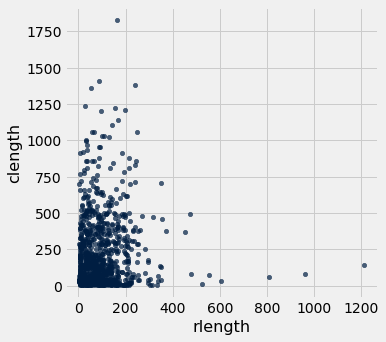

In [73]:
#scatter plot, doesn't seem to show any meaningful correlation

from datascience import *
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
np.set_printoptions(threshold=50)

scatter = tcombine.scatter('rlength', 'clength')

In [146]:
#regression = doesn't seem to explain anything
def SU(nums):
    return (nums - np.mean(nums))/np.std(nums)
correlation = np.mean(SU(client_response_lengths)*SU(rogers_response_lengths))
slope = correlation * (np.std(client_response_lengths)/np.std(rogers_response_lengths))
intercept = np.mean(client_response_lengths) - (slope*np.mean(rogers_response_lengths))
slope

0.12440069341511584

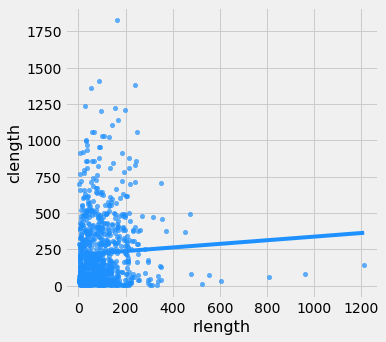

In [109]:
treg.scatter('rlength', 'clength', color='dodgerblue', fit_line=True)

In [130]:
#top 10.6% of longest responses
longest = tcombine.sort('clength', descending=True).take(np.arange(100))
longest_triggers = longest.column('rogers responses')

#bag of words word counter
longest_triggers = ''.join(longest_triggers)
from nltk.tokenize import sent_tokenize
from string import punctuation
def fast_tokenize(text):
    
    # Iterate through text removing punctuation characters
    no_punct = "".join([char for char in text if char not in punctuation])
    
    # Split text over whitespace into list of words
    tokens = no_punct.split()
    
    return tokens
longest_triggers_words = fast_tokenize(longest_triggers)

from collections import Counter
Counter(longest_triggers_words).most_common()

[('you', 115),
 ('that', 68),
 ('to', 58),
 ('I', 56),
 ('the', 52),
 ('of', 51),
 ('it', 29),
 ('in', 28),
 ('and', 25),
 ('a', 24),
 ('really', 21),
 ('feel', 21),
 ('what', 19),
 ('So', 16),
 ('or', 16),
 ('be', 16),
 ('is', 15),
 ('do', 15),
 ('like', 14),
 ('You', 13),
 ('yourself', 13),
 ('know', 13),
 ('have', 13),
 ('for', 12),
 ('dont', 12),
 ('your', 12),
 ('as', 12),
 ('could', 12),
 ('just', 12),
 ('but', 12),
 ('if', 12),
 ('at', 11),
 ('would', 11),
 ('youre', 10),
 ('me', 10),
 ('But', 10),
 ('this', 10),
 ('one', 9),
 ('was', 9),
 ('want', 9),
 ('feeling', 9),
 ('Mhm', 8),
 ('are', 8),
 ('saying', 8),
 ('him', 8),
 ('let', 8),
 ('out', 8),
 ('Yeah', 8),
 ('not', 8),
 ('hmm', 7),
 ('And', 7),
 ('person', 7),
 ('things', 7),
 ('so', 7),
 ('though', 7),
 ('some', 7),
 ('understand', 7),
 ('then', 7),
 ('guess', 7),
 ('were', 6),
 ('them', 6),
 ('kind', 6),
 ('with', 6),
 ('all', 6),
 ('up', 6),
 ('about', 6),
 ('say', 6),
 ('its', 6),
 ('back', 6),
 ('more', 6),
 ('from', 

In [145]:
all_tokens = fast_tokenize(therapist)
Counter(all_tokens).most_common()

[('you', 731),
 ('to', 510),
 ('I', 506),
 ('that', 478),
 ('of', 409),
 ('the', 341),
 ('a', 339),
 ('and', 305),
 ('it', 221),
 ('in', 203),
 ('is', 190),
 ('really', 180),
 ('feel', 173),
 ('be', 152),
 ('what', 150),
 ('as', 129),
 ('your', 117),
 ('just', 115),
 ('like', 112),
 ('have', 111),
 ('And', 105),
 ('for', 104),
 ('or', 103),
 ('but', 98),
 ("you're", 96),
 ('You', 95),
 ("don't", 88),
 ('do', 85),
 ('with', 83),
 ('this', 83),
 ('would', 79),
 ('are', 77),
 ('not', 75),
 ('about', 75),
 ('if', 75),
 ('want', 70),
 ('So', 68),
 ('so', 67),
 ('But', 66),
 ('some', 65),
 ('know', 65),
 ('was', 64),
 ('all', 64),
 ('...', 61),
 ('kind', 60),
 ('on', 60),
 ("I'm", 60),
 ("that's", 57),
 ('things', 55),
 ('guess', 55),
 ('though', 55),
 ('feeling', 54),
 ('me', 53),
 ('when', 52),
 ('yourself', 51),
 ('get', 50),
 ('something', 50),
 ('you.', 50),
 ('out', 50),
 ('hmm.', 50),
 ('It', 49),
 ('at', 49),
 ("it's", 48),
 ('can', 48),
 ('been', 47),
 ('more', 47),
 ('that,', 44),


In [142]:
#dtm
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
dtm = cv.fit_transform(therapist)
desparse = dtm.toarray()
word_list = cv.get_feature_names()
dtm_tb = Table(word_list).with_rows(desparse)
dtm_tb.take(765)

02,03,06,07,10,11,13,14,15,17,18,19,22,24,25,26,27,28,30,31,32,33,36,37,38,39,43,44,46,48,49,52,54,56,57,6myself,75,ability,able,about,above,absolutely,accept,acceptable,acceptance,acceptant,accepted,accepting,accord,accurately,act,acting,action,actions,acts,actual,actually,adjust,admit,adult,advantage,adventure,affection,affects,afraid,after,afterwards,again,against,ago,ah,ahead,ahm,ain,all,allowed,almost,alone,aloneness,along,already,alright,also,alter,alternatives,although,always,am,ambivalent,amount,an,analyze,analyzing,and,anger,angry,animal,annoyed,another,answer,answering,answers,any,anybody,anyone,anything,apart,appointment,appreciate,appreciative,appropriate,approve,are,area,aren,arm,arms,army,around,arranged,arrangement,artificial,as,ashamed,ask,asked,asking,aspect,aspects,ass,assignment,associate,assurance,at,attempt,attention,attitude,attracted,attraction,attractive,aware,away,awful,awfully,awfulness,awhile,back,background,backing,bad,badly,balance,ball,based,basement,basically,basis,bastard,bastards,bat,be,beat,beaten,beautifully,beca,became,because,bed,been,before,began,beginning,behave,behavior,behaviors,behind,being,believe,best,bet,better,between,beyond,big,bit,bitter,bitterness,black,blackest,blacks,blame,blamed,blaming,blow,blowing,body,boiling,boss,both,bother,bought,boy,boys,brat,brave,break,brief,bright,brighter,bring,brings,broader,broken,brother,brought,bubble,bubbling,buck,bullshit,burden,buried,business,busy,but,butter,buy,buying,by,bye,call,came,can,cancer,cannot,capable,care,career,careful,caring,carl,carried,carry,catch,catching,category,caught,cause,caused,causes,cautious,cave,central,certain,certainly,chain,chair,chance,chances,change,changed,changing,characteristic,chat,cheated,child,childhood,childish,children,chit,choice,choices,choose,chosen,circles,circumstances,civilized,class,clear,clearest,clearly,cliff,close,closer,cloud,cold,coldly,collect,combination,come,comes,comfortable,comfortably,coming,comparable,compelled,complete,completely,conceivable,concern,concerned,concerns,condition,conflict,confused,confusing,considerable,considerations,constricted,constructive,contact,continue,contradiction,contradictory,control,cool,core,correctly,cos,could,couldn,counselors,couple,course,coz,crash,crazy,credit,credits,crippled,critical,crucify,cry,crying,cultural,culture,cultured,cut,cuts,dad,dammit,damn,damned,dare,dark,darn,daughter,day,daydream,days,dead,deal,death,deceiving,decide,deciding,decision,decisions,declared,deep,deeper,deeply,defeated,defend,deficient,definitely,degree,delinquent,demand,demanded,demands,dependent,depressed,depth,description,desire,desires,desperate,desperateness,desperation,despise,despising,destroy,destroys,did,didn,die,differ,difference,differences,different,differently,difficult,difficulties,difficulty,dilemma,dim,direction,directions,disappear,disappointment,disapprove,disapproved,discern,discouraged,discouraging,discuss,disease,disgusted,dishes,dislike,disproportionately,dissimilar,distressing,disturbance,disturbing,do,doakes,doctor,does,doesn,doing,dominated,don,done,doomed,doubt,down,dr,drag,drawn,dread,dreading,dream,drink,drive,driving,dropped,drugs,due,during,dying,eager,earlier,earned,earthly,eas,easier,easily,easy,edge,effect,efficient,effort,egotistical,eh,eight,eighth,either,electricity,element,else,emerge,emotion,encouraged,end,endless,enormous,enough,enterprise,entertainment,entrance,escape,escaping,especially,evasive,even,ever,everybody,everyone,everything,evidently,exactly,example,except,excitement,exciting,excuse,excuses,exist,existed,expect,expectations,experience,experienced,experiencing,expert,explain,explaining,explanations,explore,expose,express,expressing,extent,extra,eye,eyes,facade,face,facing,fact,facts,factually,failure,faintly,fairly,fall,falling,false,falsehood,family,fantasy,far,fascinating,fashion,fast,fatal,father,favor,fear,fearful,fears,fee1ing,feel,feeling,feelings,feels,fellas,felt,few,fight,figure,fill,find,finding,fine,finished,fir

In [148]:
longest.column('rogers responses').item(0)

" Mhm, hmm. And in striving for that, one reason you really weren't heard was that you didn't dare express the person you were, the sick person you were at that time."